Now let's look at the plucked string problem. The solution in the book is

$$ y = \frac{4hl}{\pi^2v} \left( \sin\frac{\pi w}{l}\sin\frac{\pi x}{l}\cos{\pi v t}{l} - \frac{1}{9}\sin\frac{3\pi w}{l}\sin\frac{3 \pi x}{l}\cos{3\pi v t}{l} + \cdots \right) $$

Following our work with the plucked string, let's see how this goes

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from JSAnimation import IPython_display
from matplotlib import animation

Now some numpy imports to make our life easier next time

In [3]:
from numpy import sin, cos, pi, linspace, arange
from numpy import zeros_like

Now, we'll want to set up our basic environment for plotting. We'll pick some dimensions (`l`, `h`, etc.), a range for `x`, and set up our figure.

After that, we'll define `animate` to show the first N terms in our series.


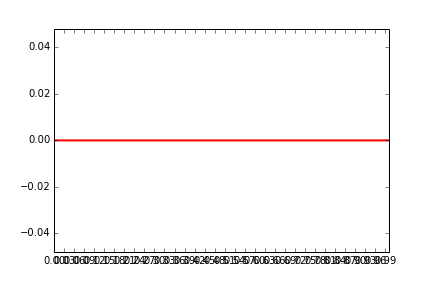
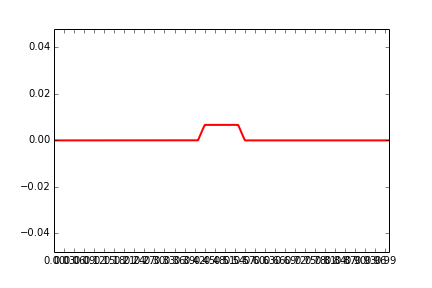
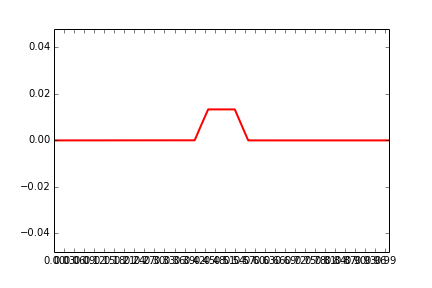
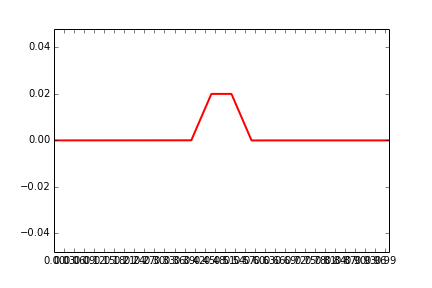
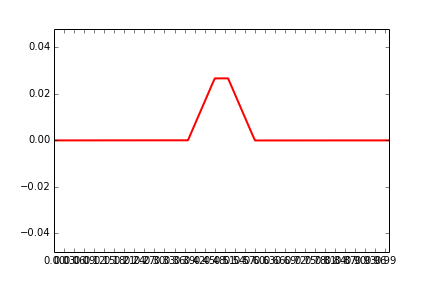
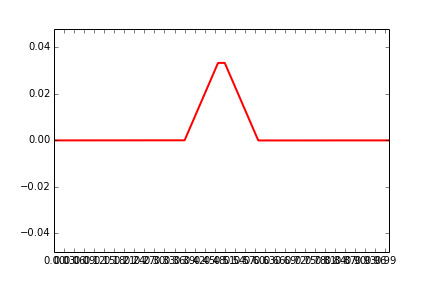
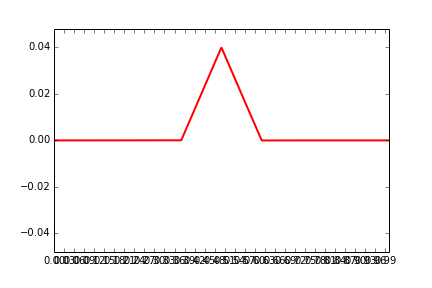
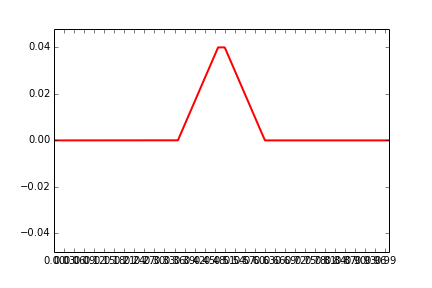
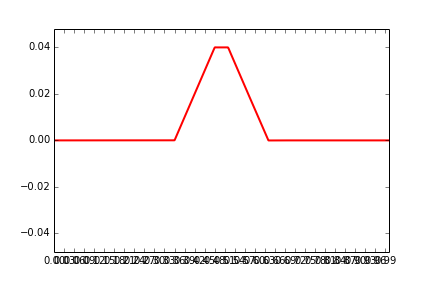
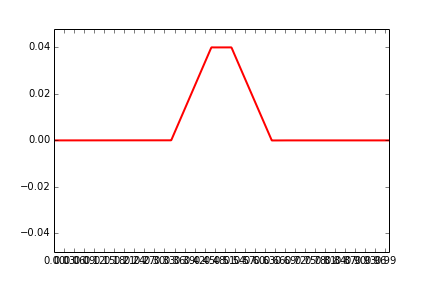
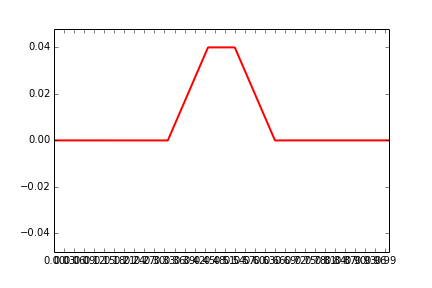
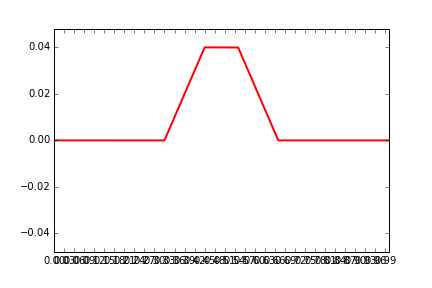
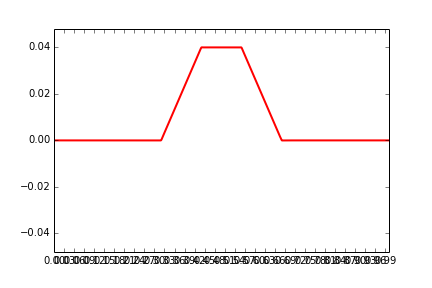
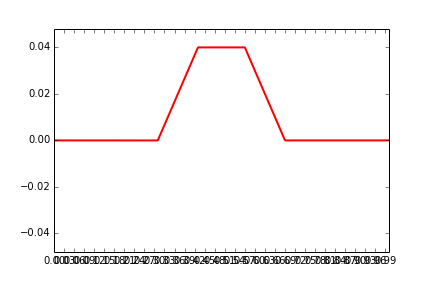
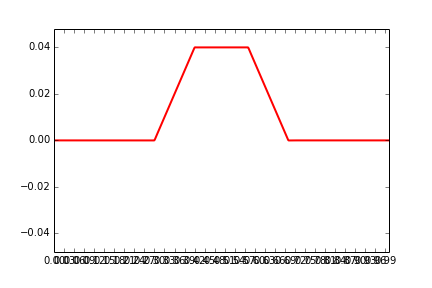
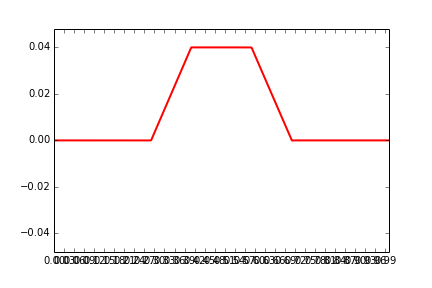
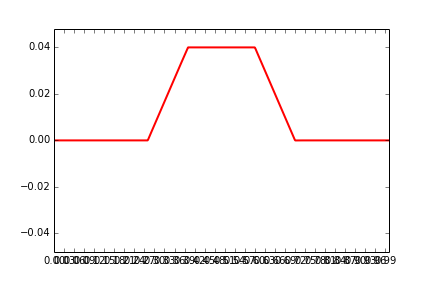
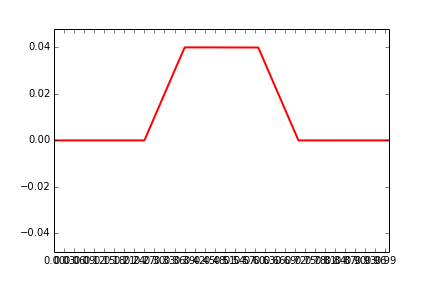
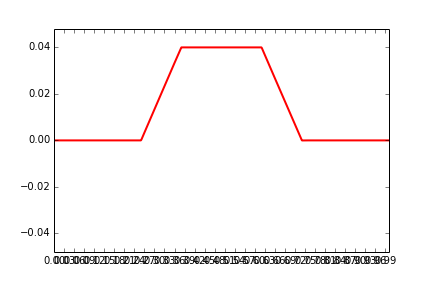
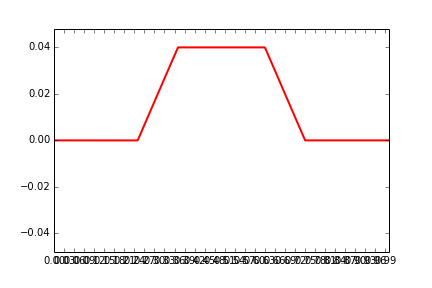
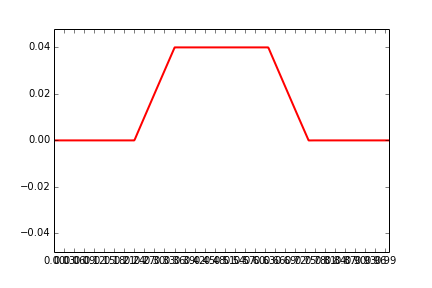
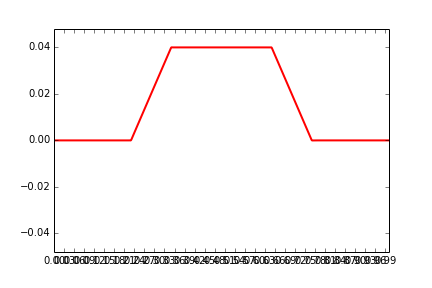
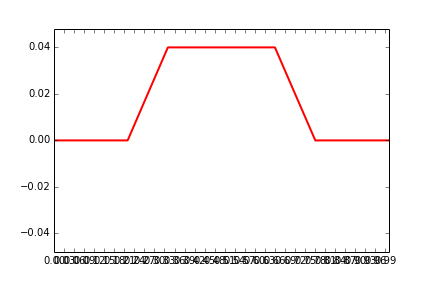
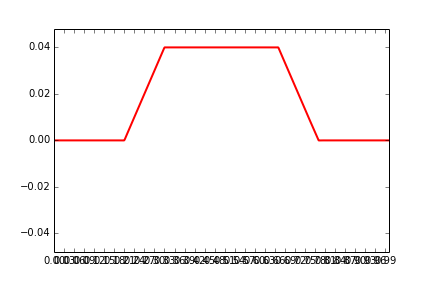
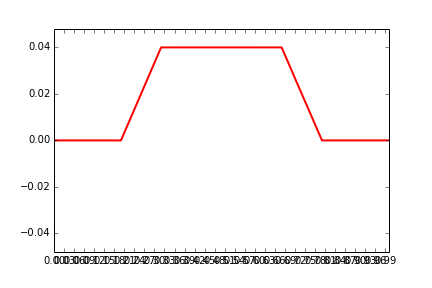
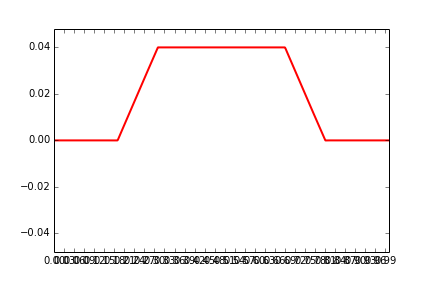
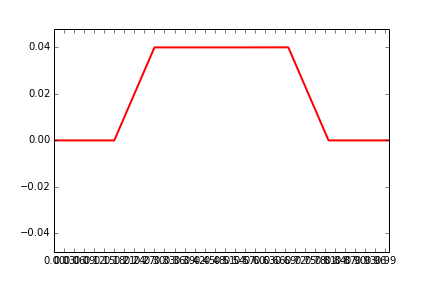
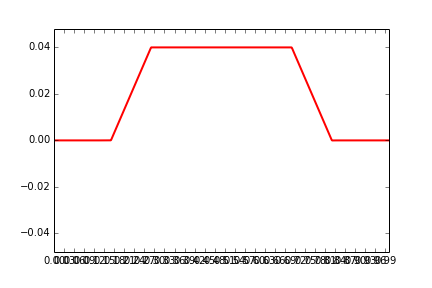
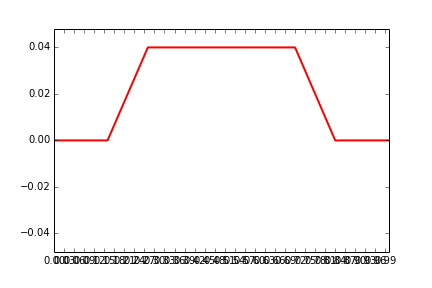
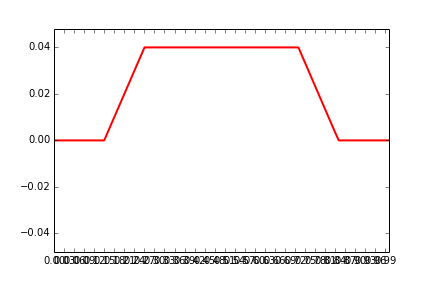
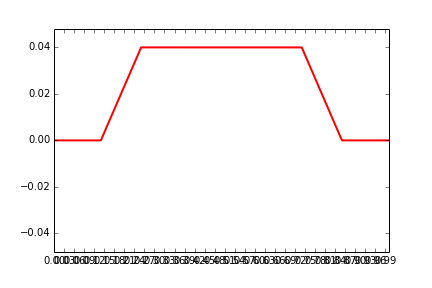
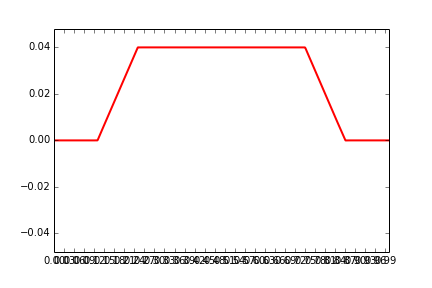
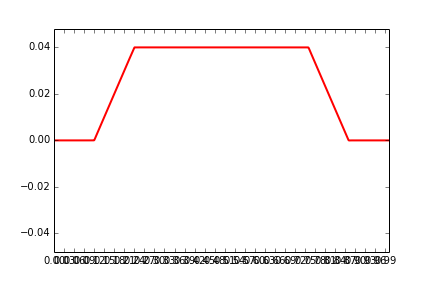
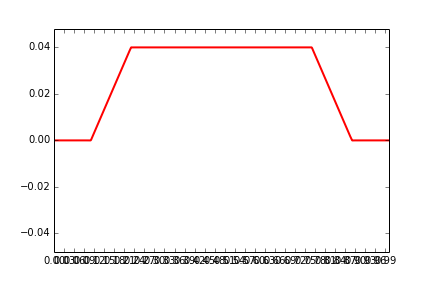
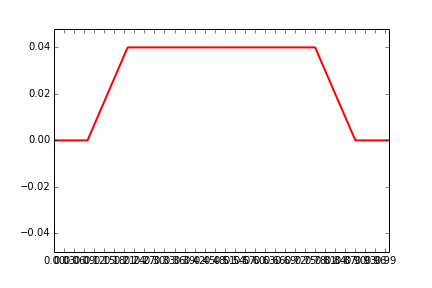
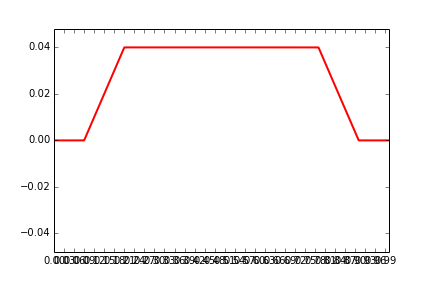
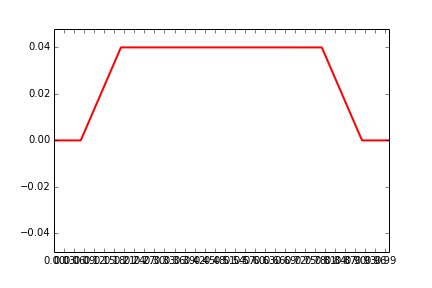
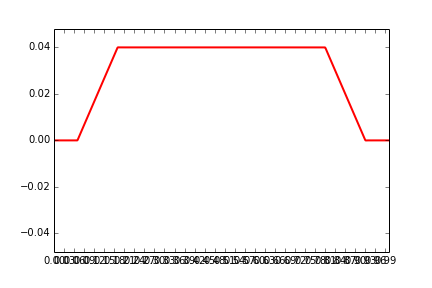
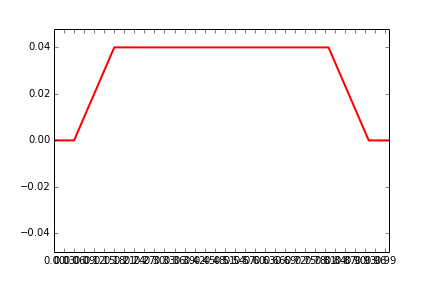
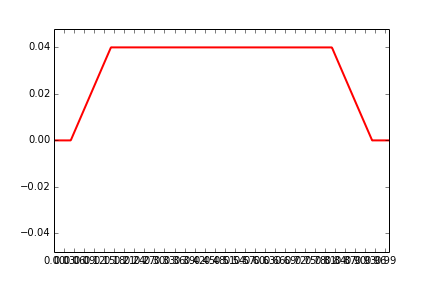
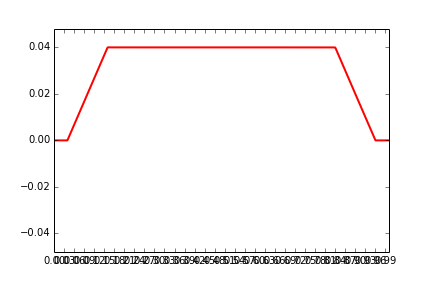
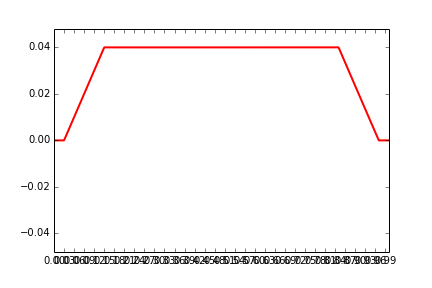
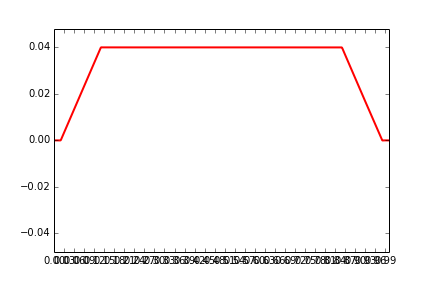
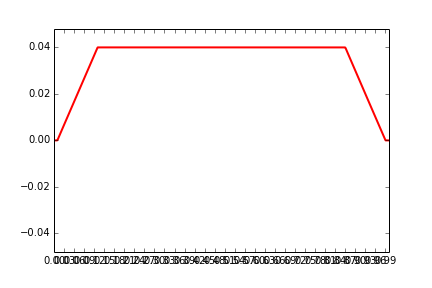
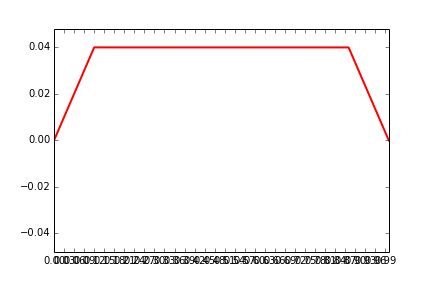
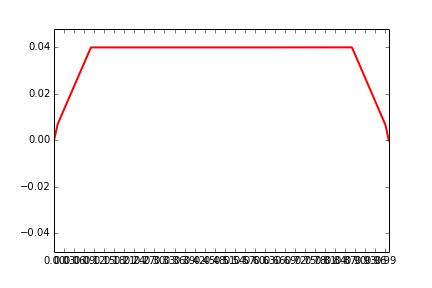
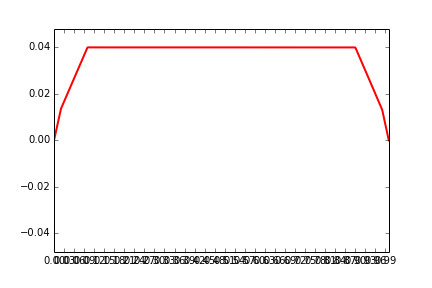
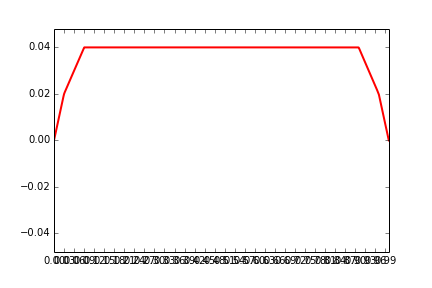
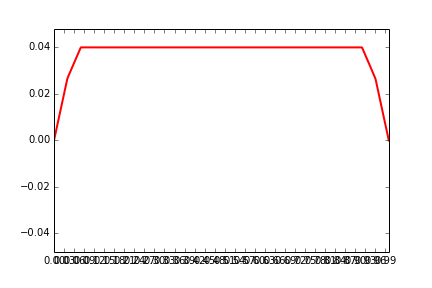
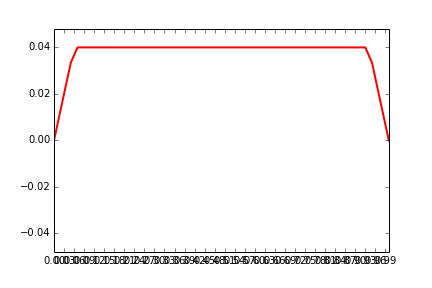
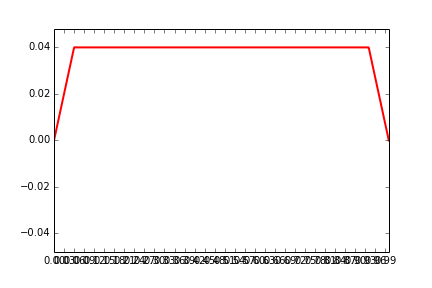
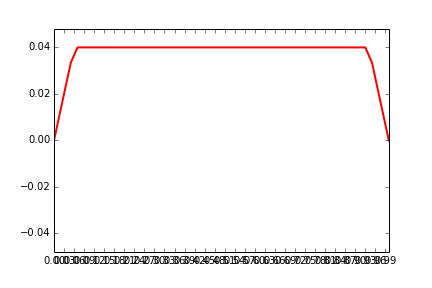
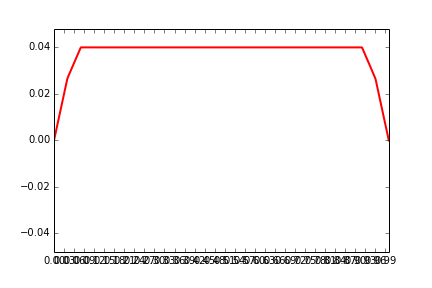
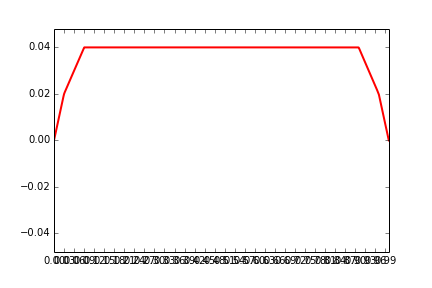
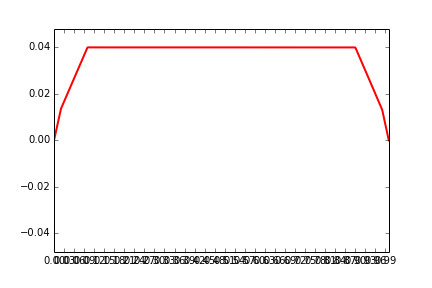
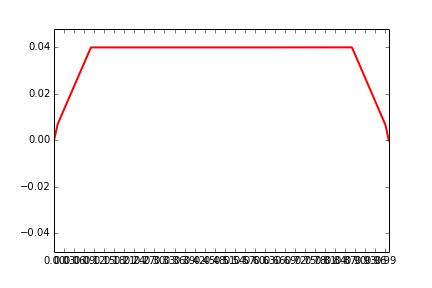
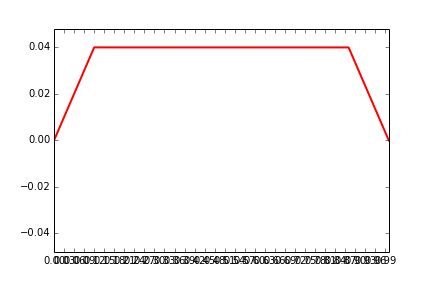
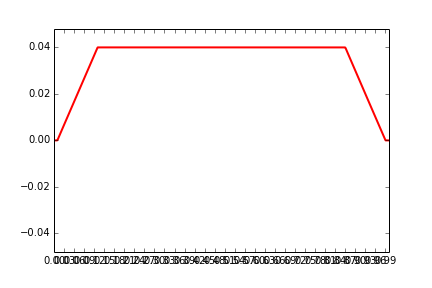
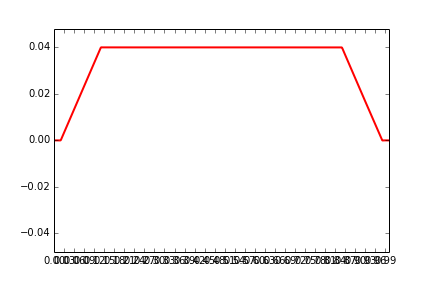
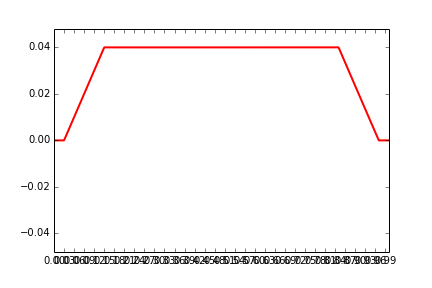
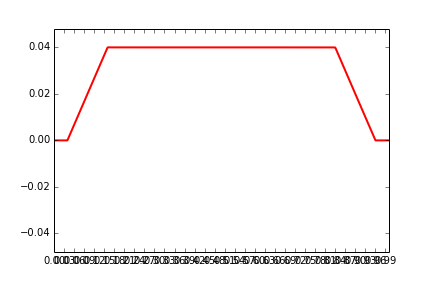
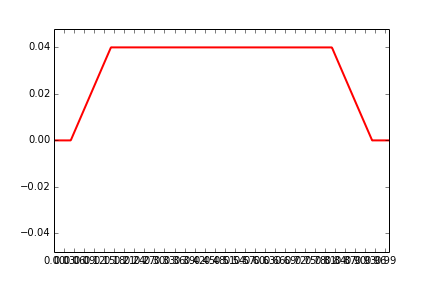
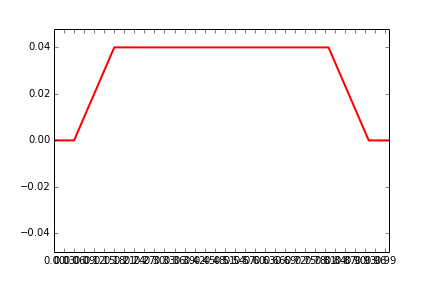
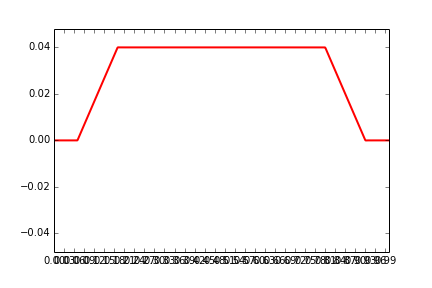
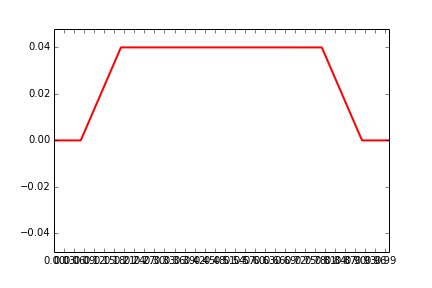
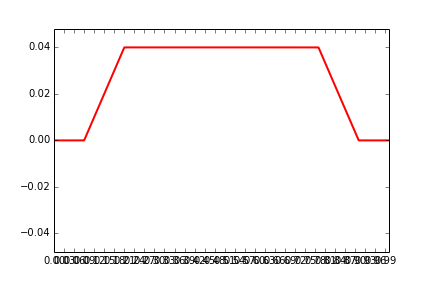
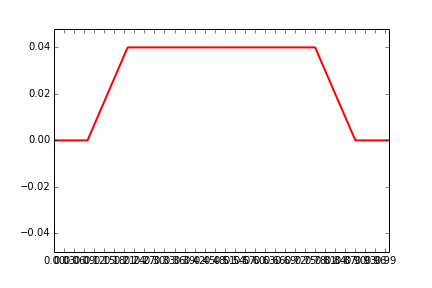
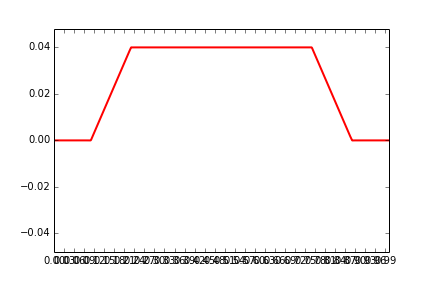
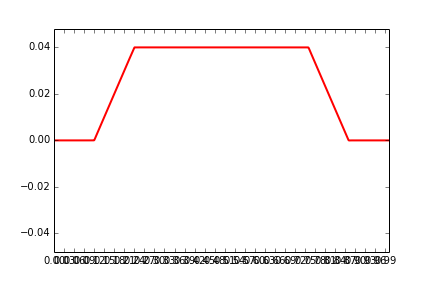
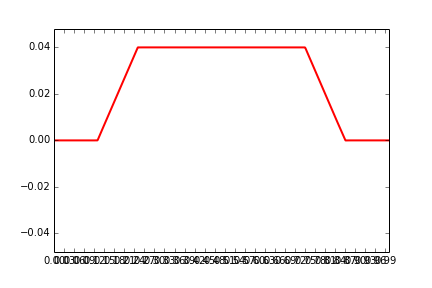
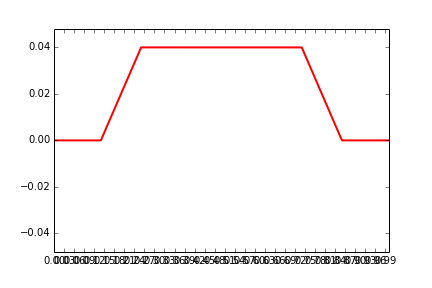
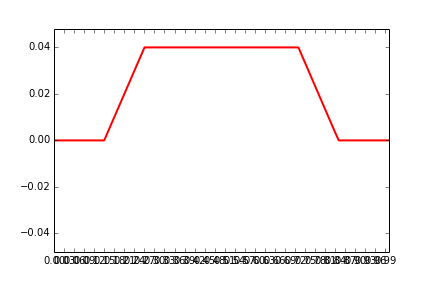
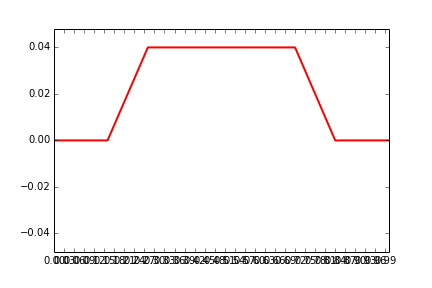
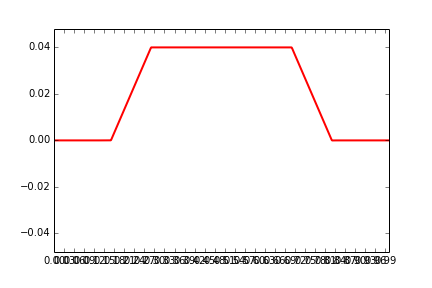
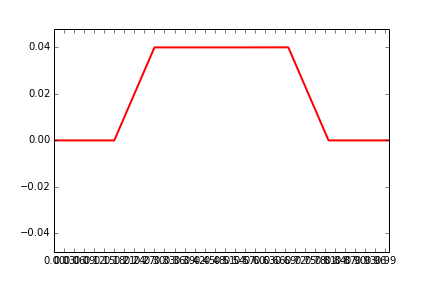
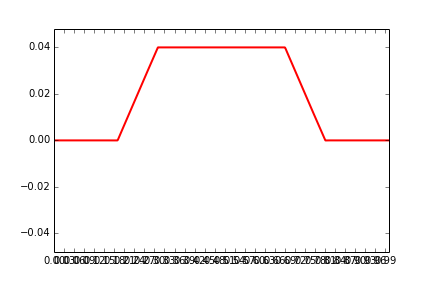
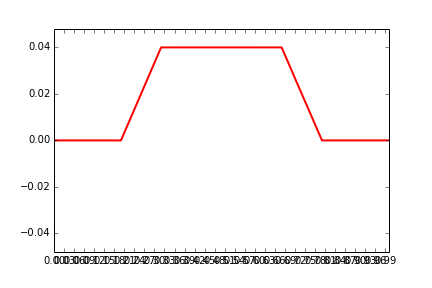
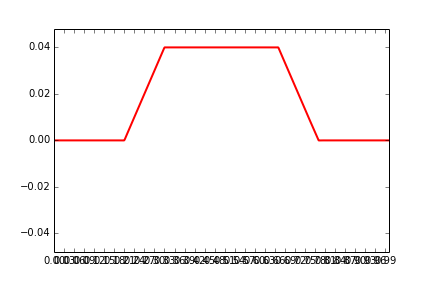
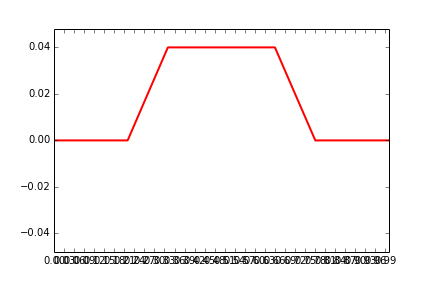
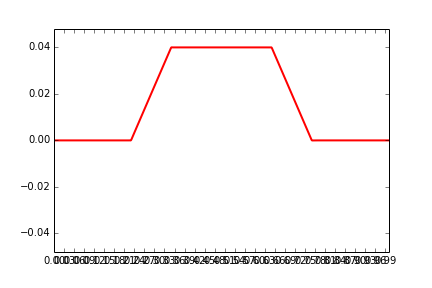
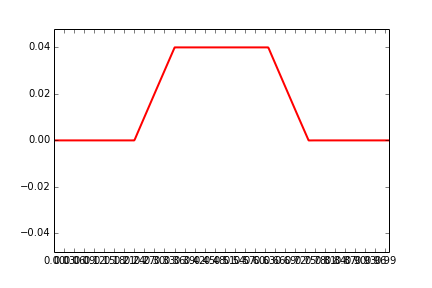
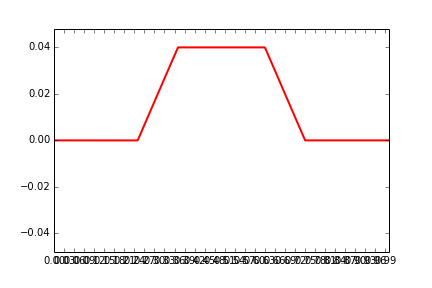
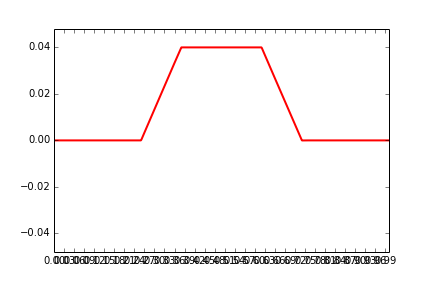
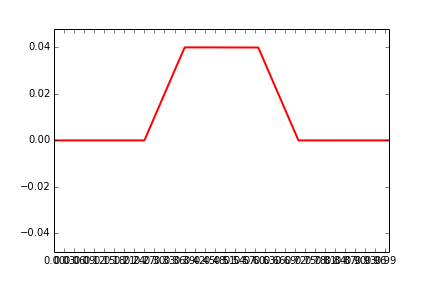
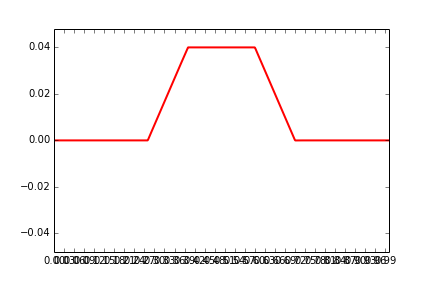
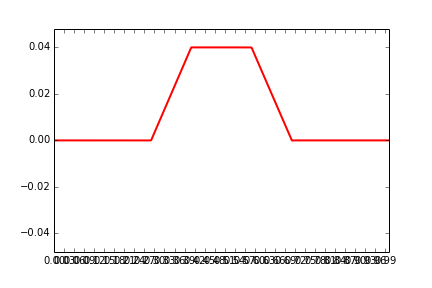
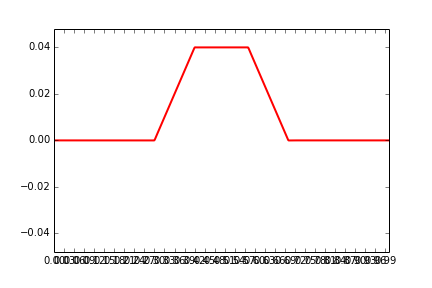
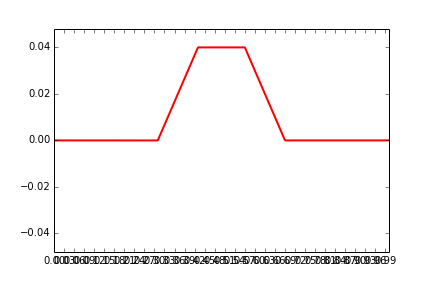
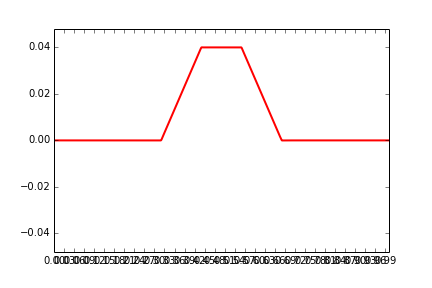
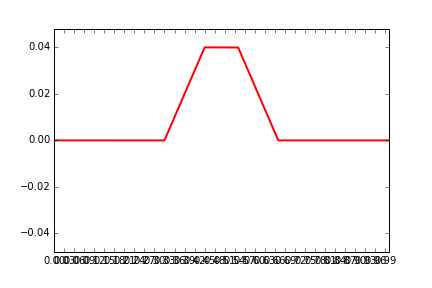
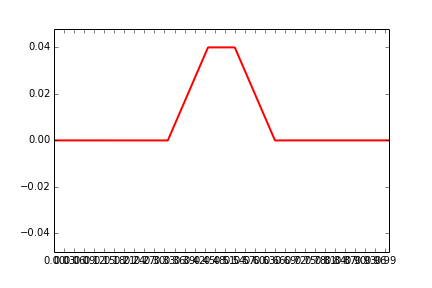
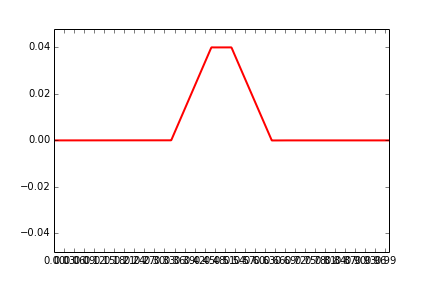
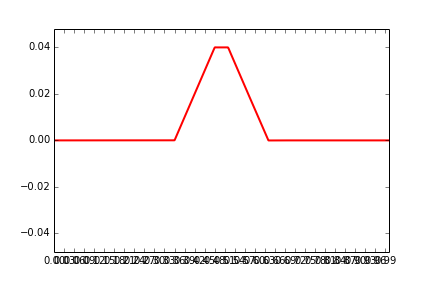
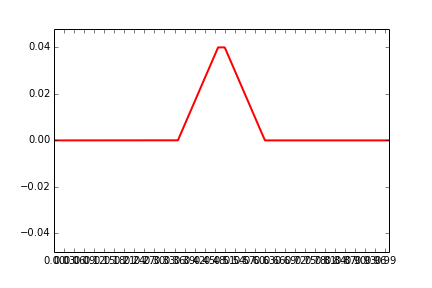
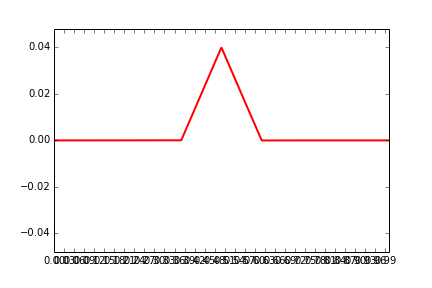
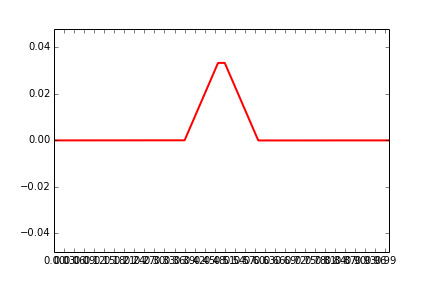
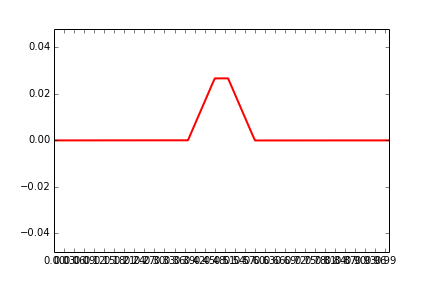
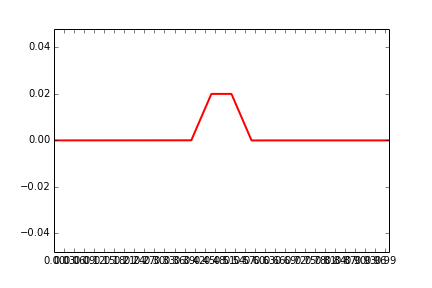
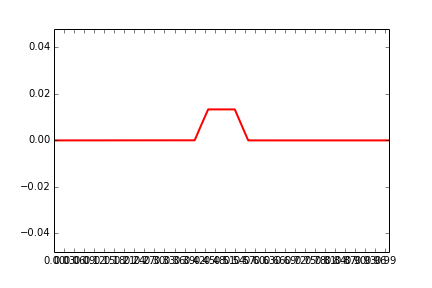
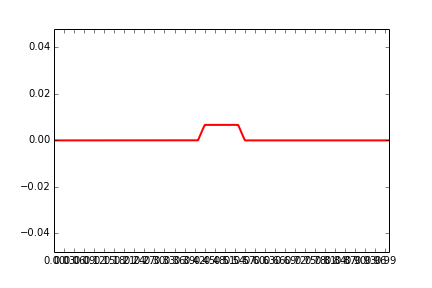
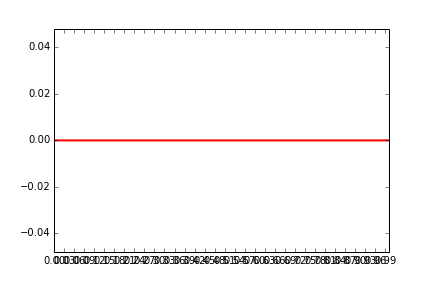
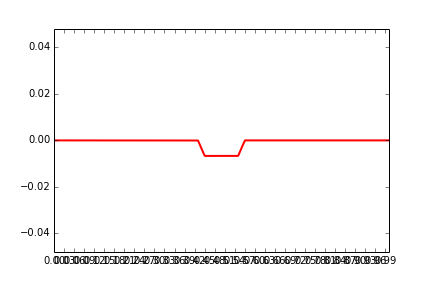
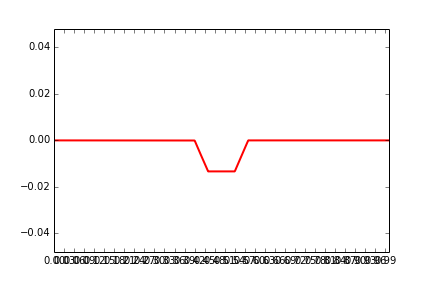
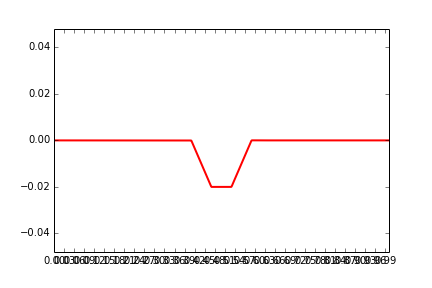
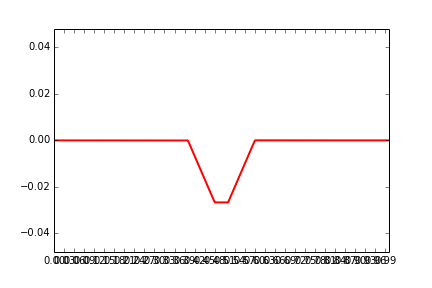
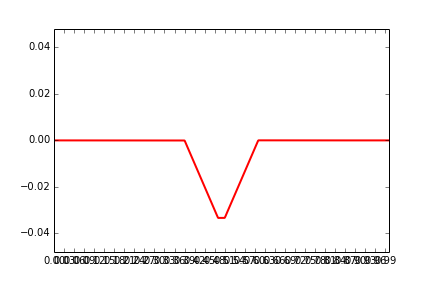
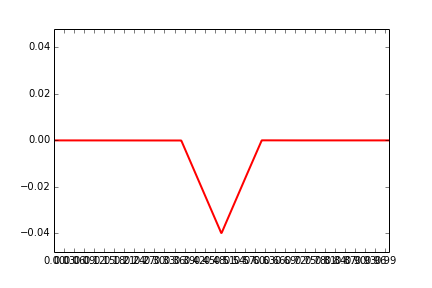
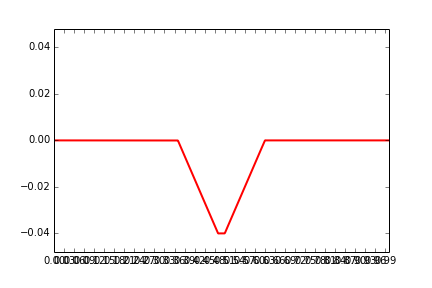
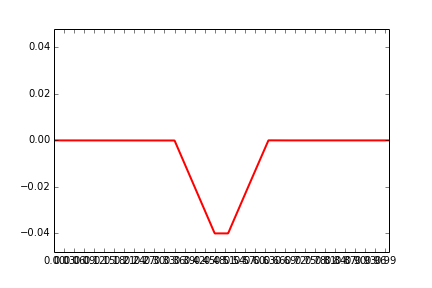
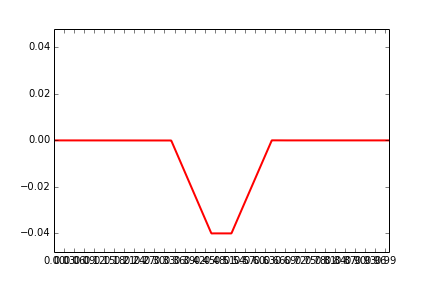
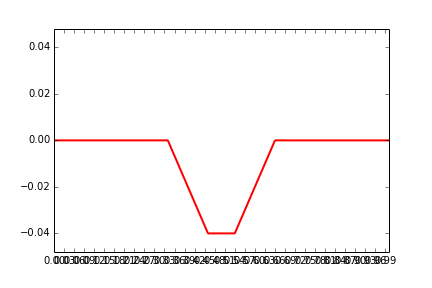
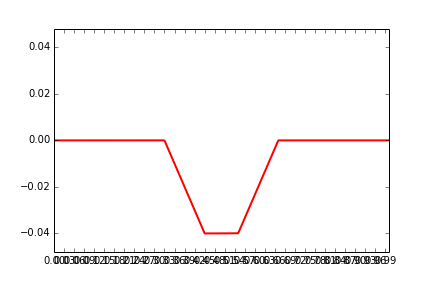
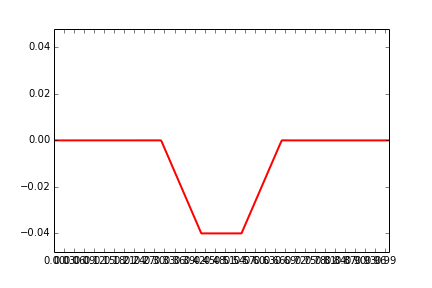
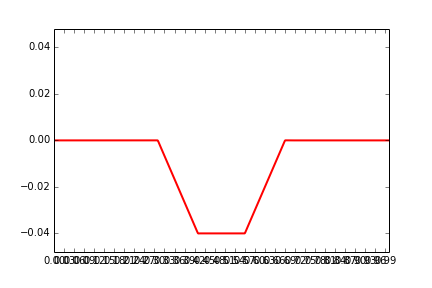
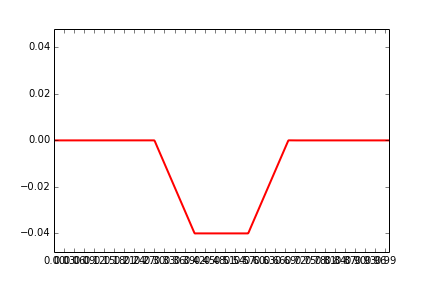
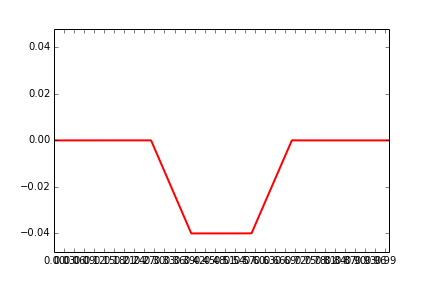
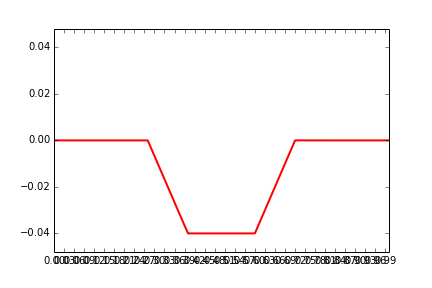
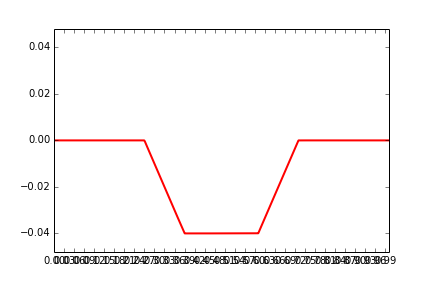
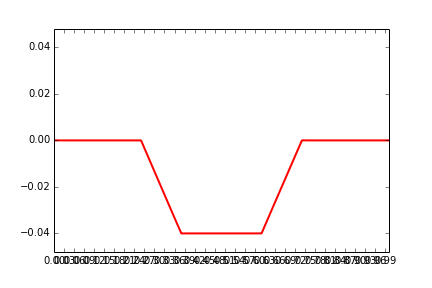
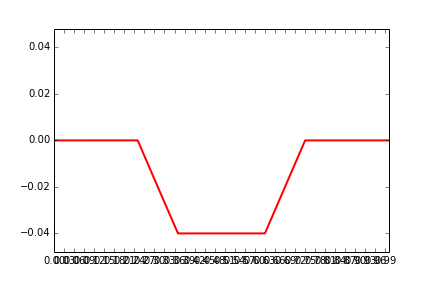
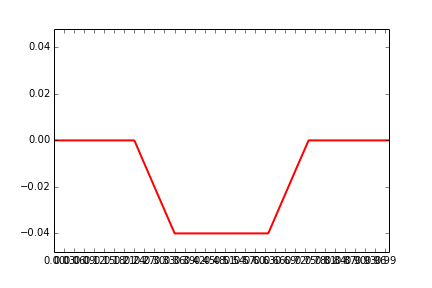
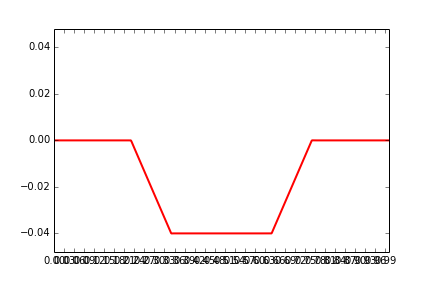
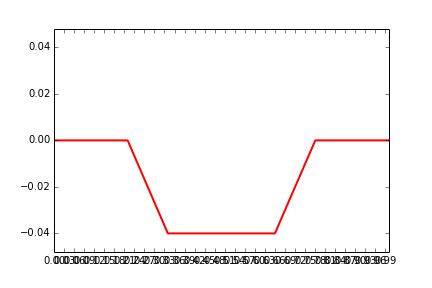
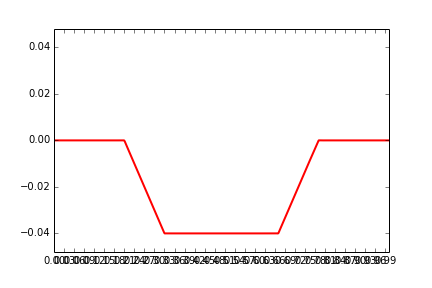
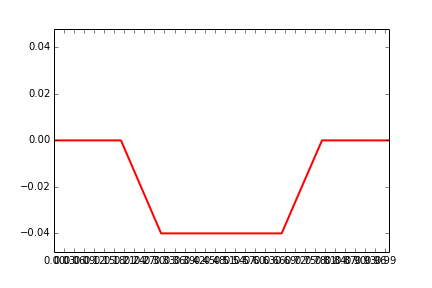
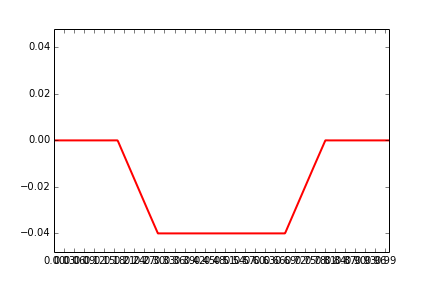
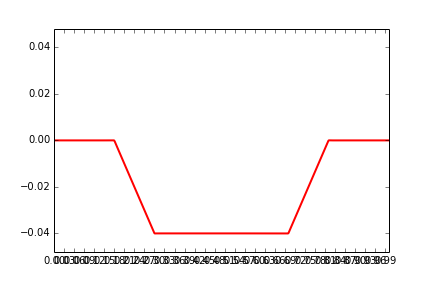
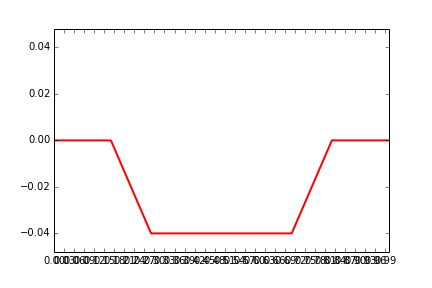
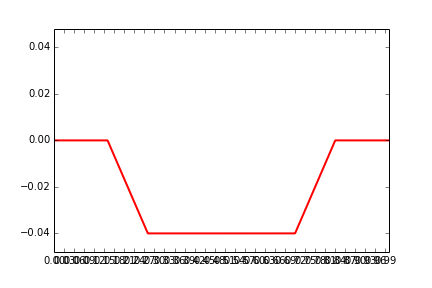
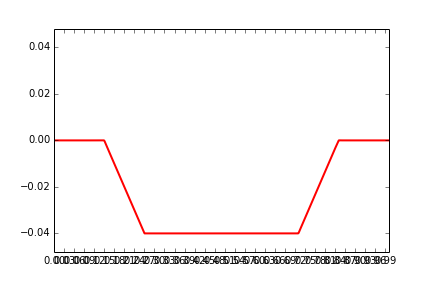
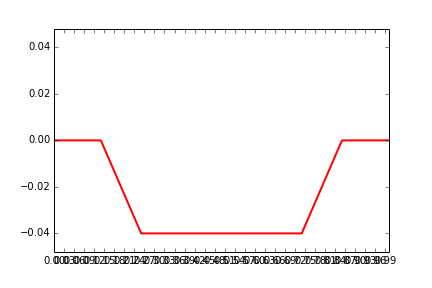
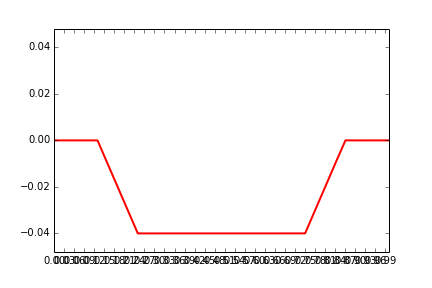
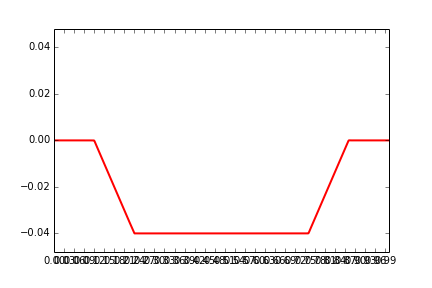
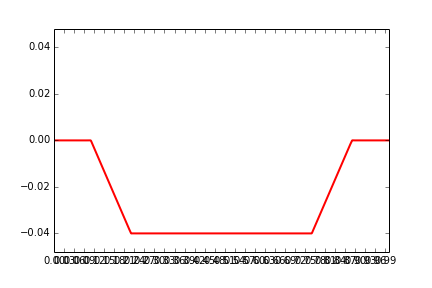
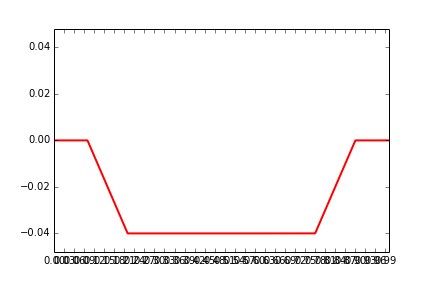
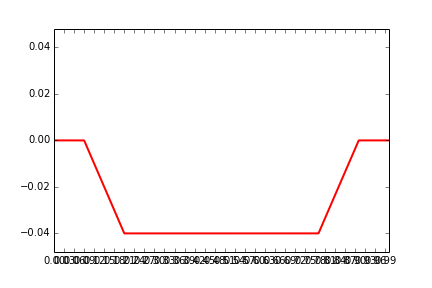
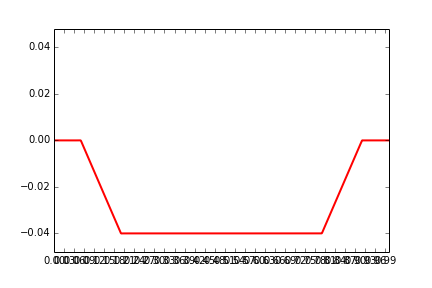
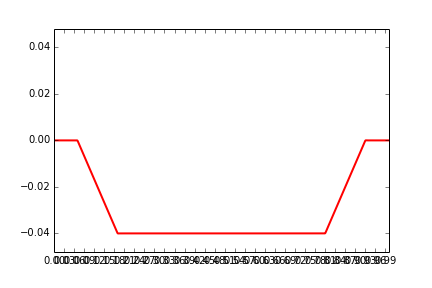
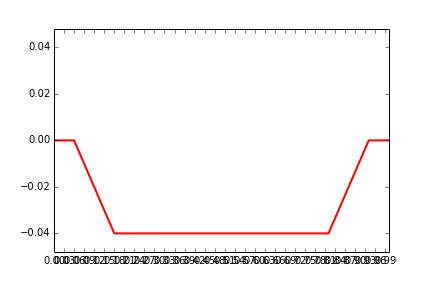
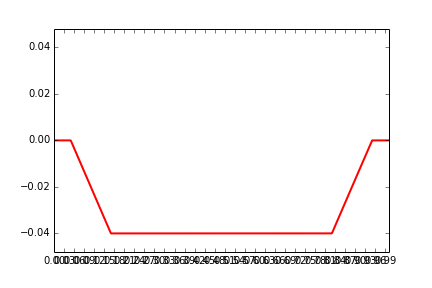
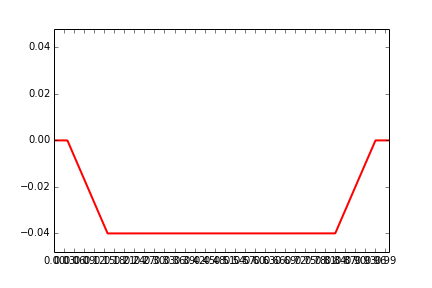
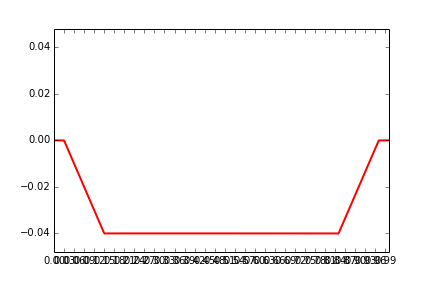
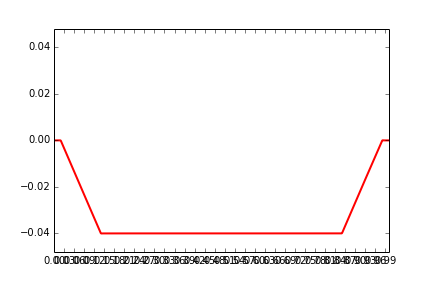
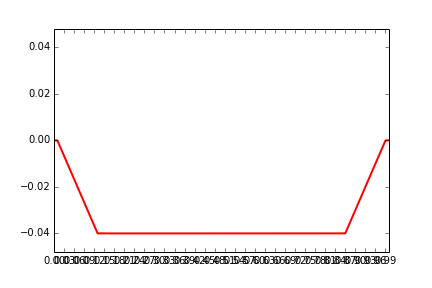
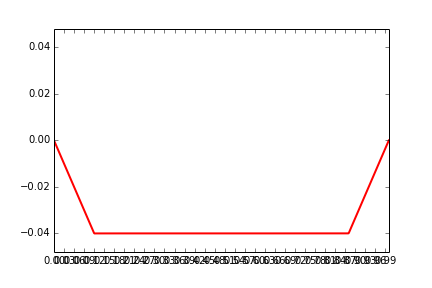
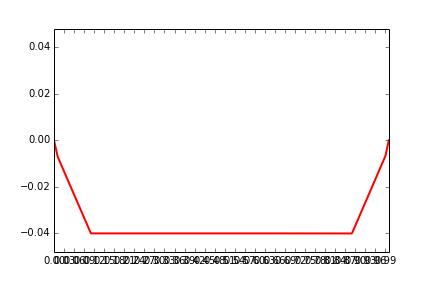
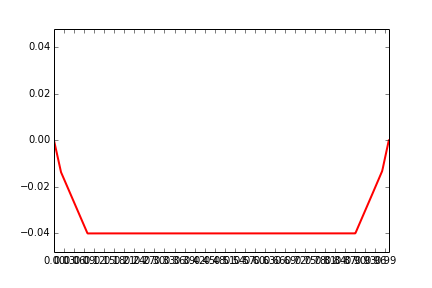
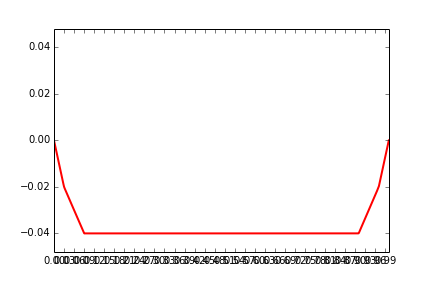
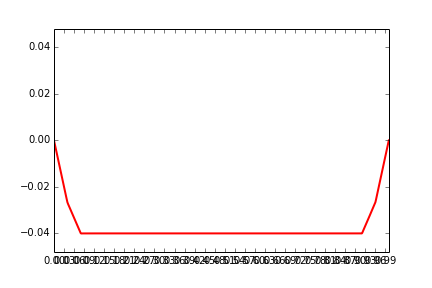
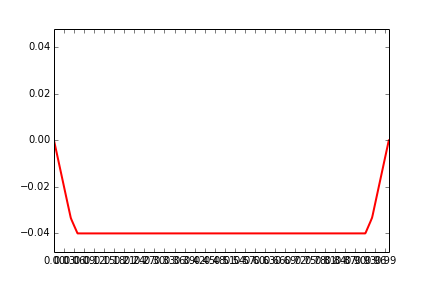
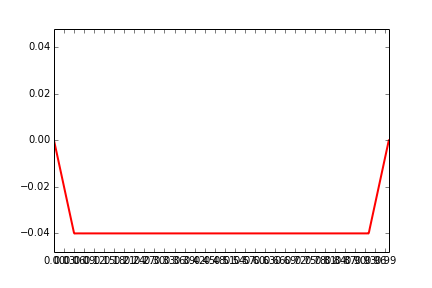
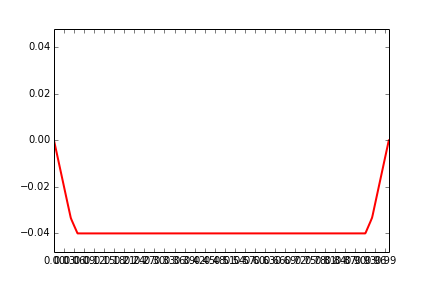
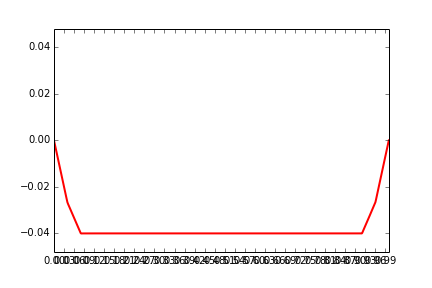
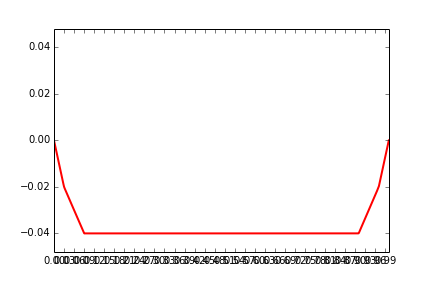
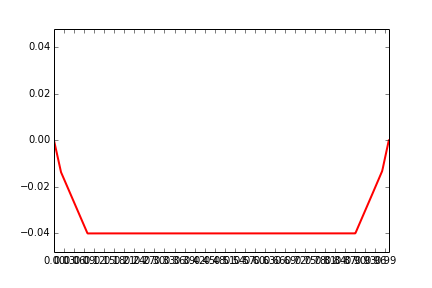
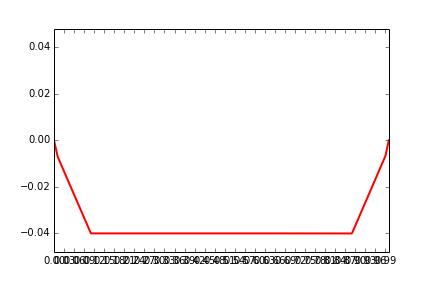
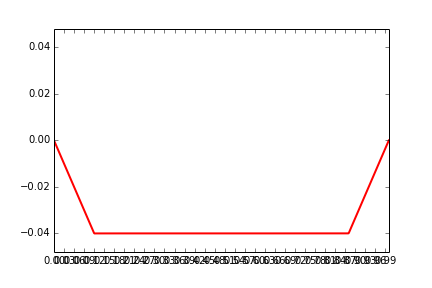
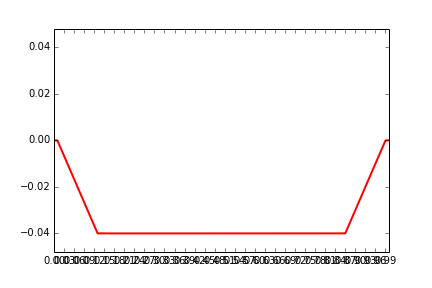
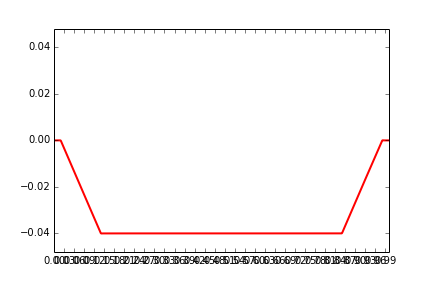
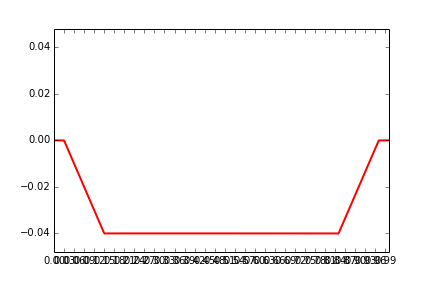
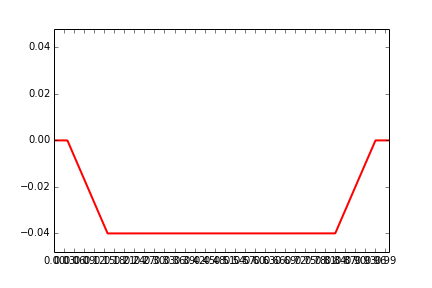
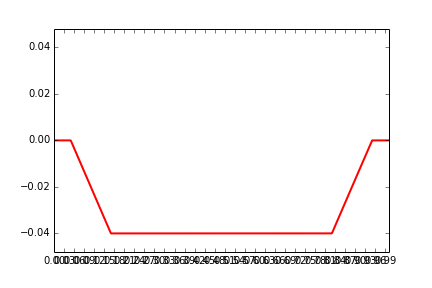
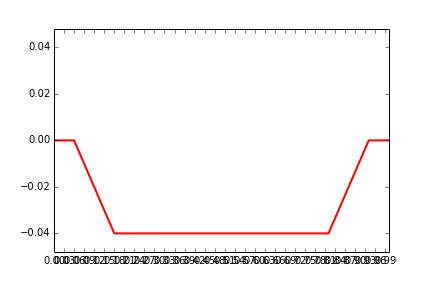
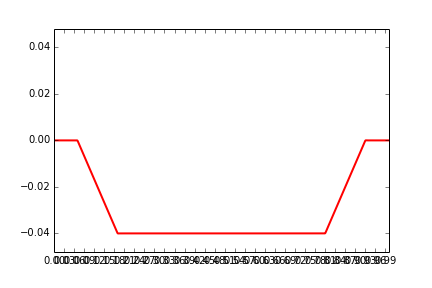
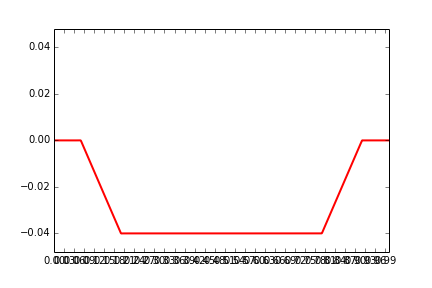
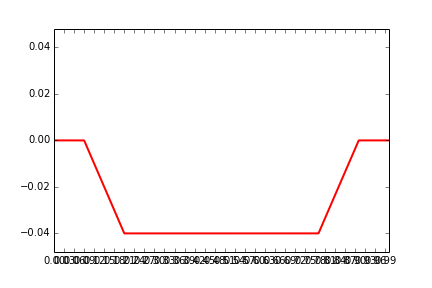
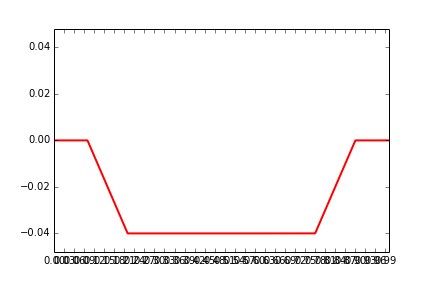
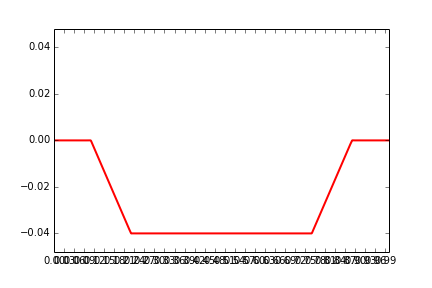
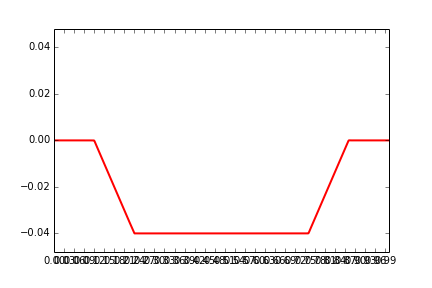
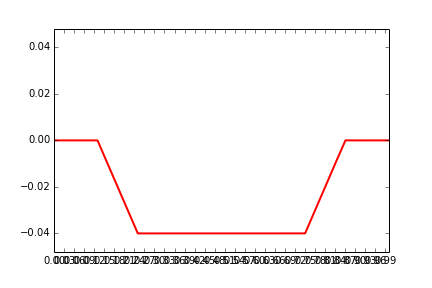
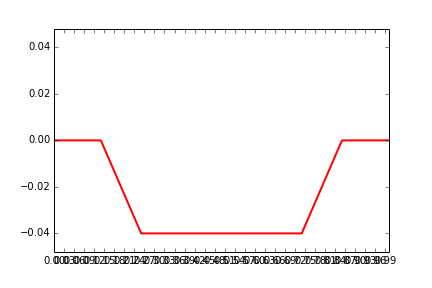
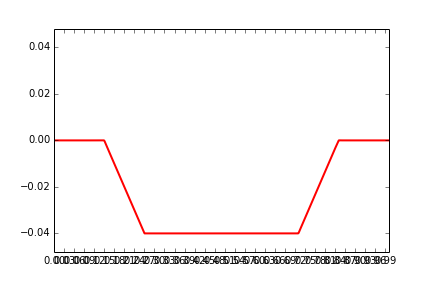
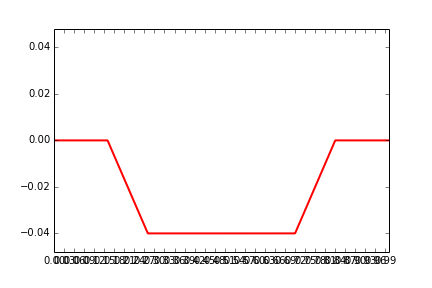
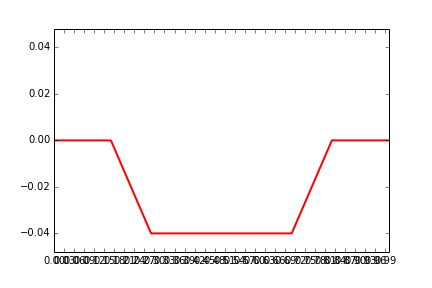
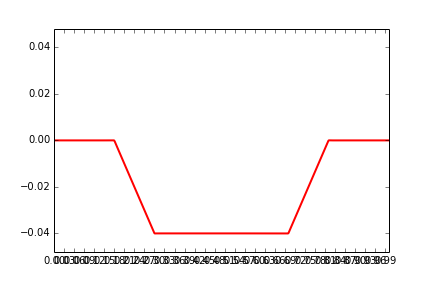
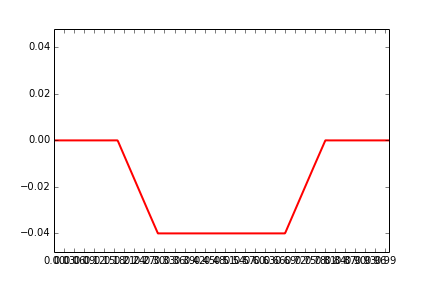
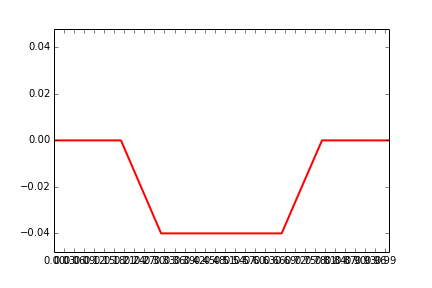
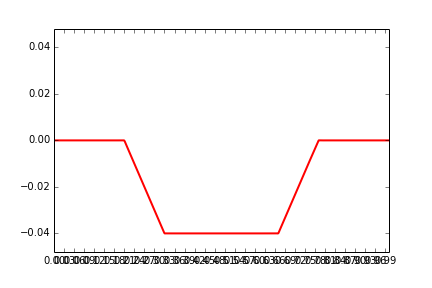
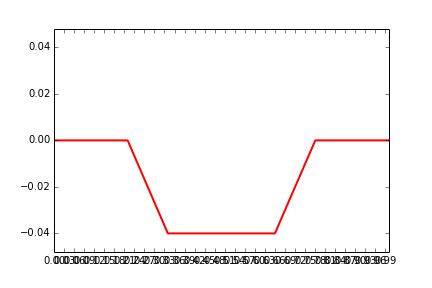
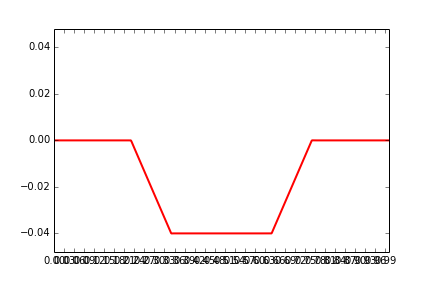
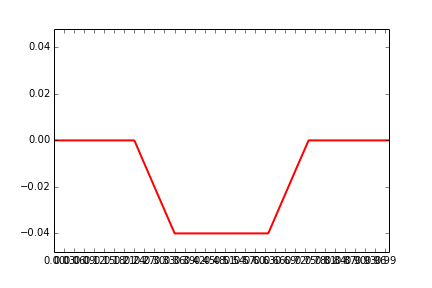
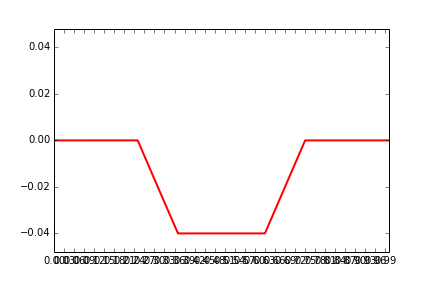
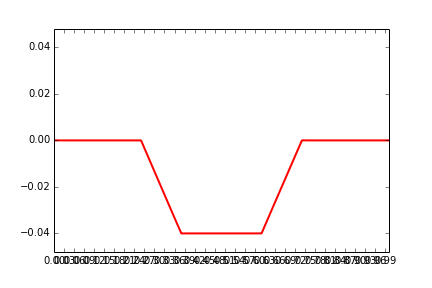
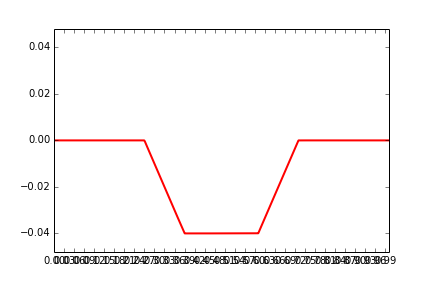
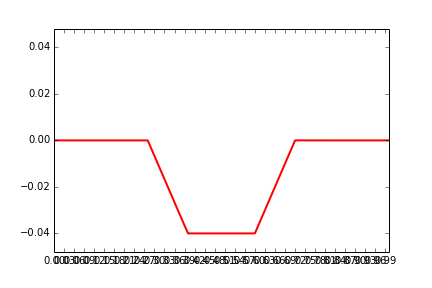
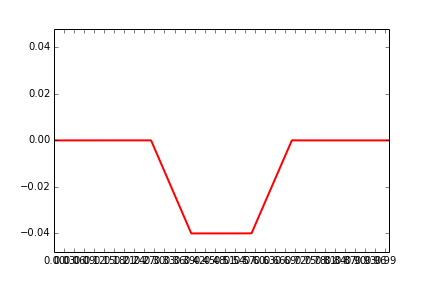
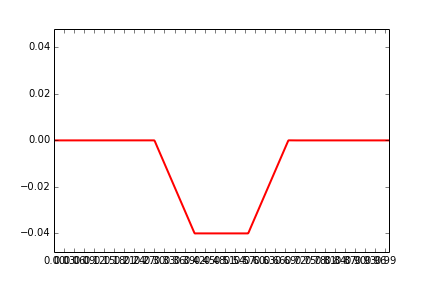
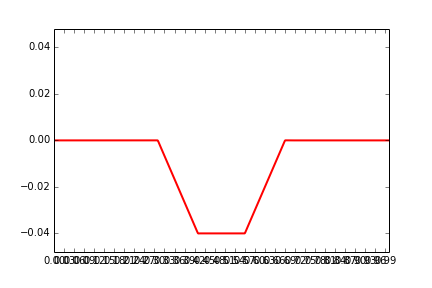
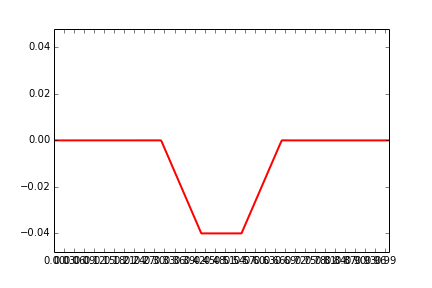
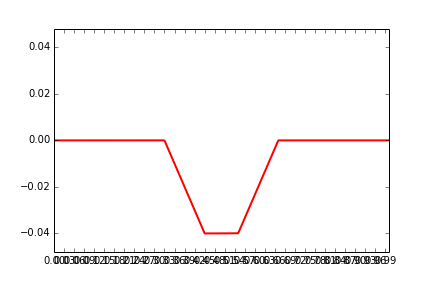
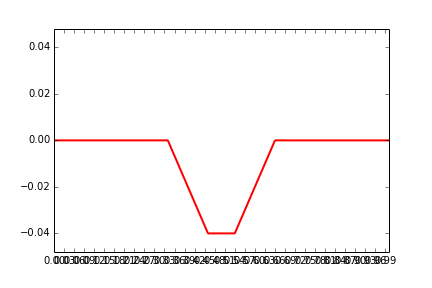
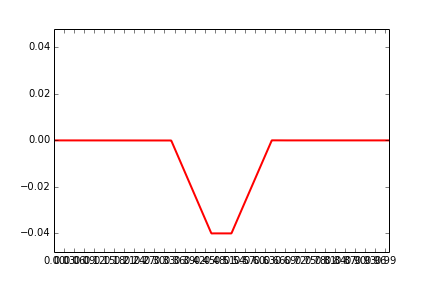
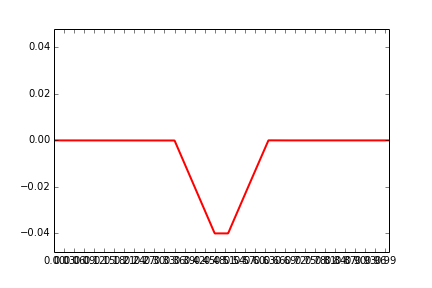
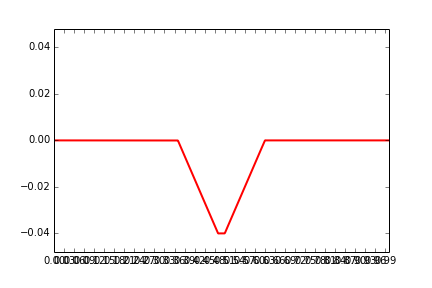
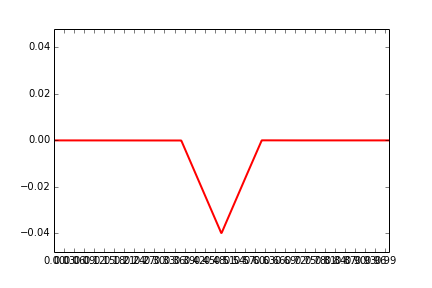
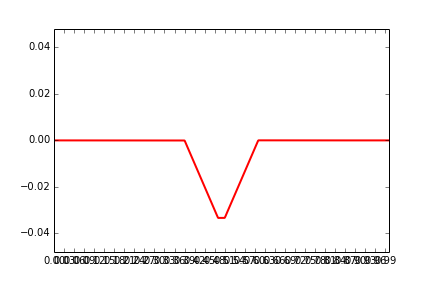
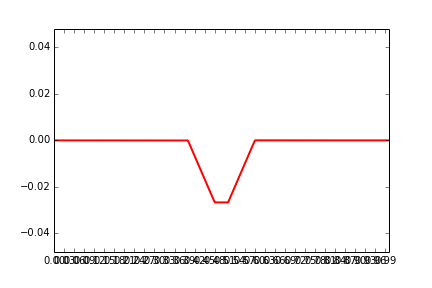
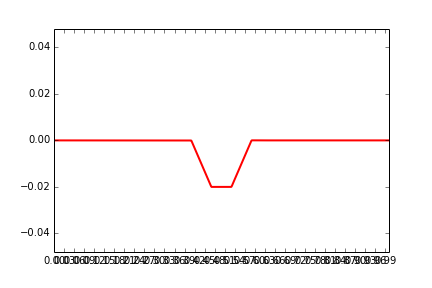
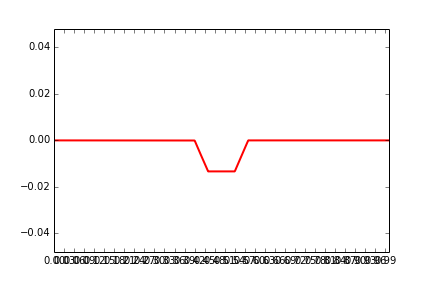
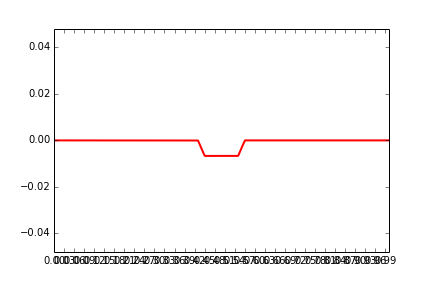

In [14]:
l, h, w = 1.0, 0.04, 0.06
v = 0.01
fig = plt.figure()
ax = plt.axes(xlim=(0, l), ylim=(-1.2*h, 1.2*h))
plt.xticks(arange(0,l,w/2))
line, = ax.plot([], [], lw=2, color='red')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
x = linspace(0, l, 2000)
N=400
def animate(t):
    y = zeros_like(x)
    for n in range(1,N+1,2): # range starts at zero
        pre = (-1)**((n-1)/2)
        y = y +  pre * (1/n**2) * (sin(n*pi*w/l)*sin(n*pi*x/l)*sin(n*pi*v*t/l))


    #y = ( (4*h*l)/(pi*pi*v) ) * y
    y = ( (4*h*l)/(pi*pi*w) ) * y

    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


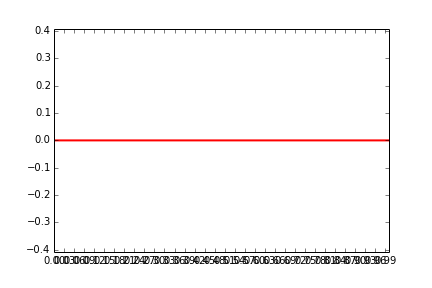
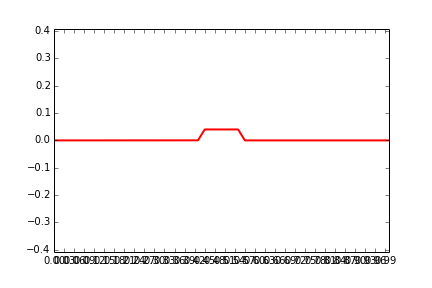
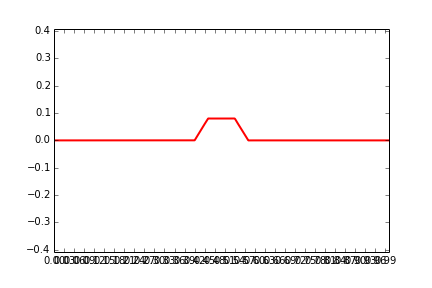
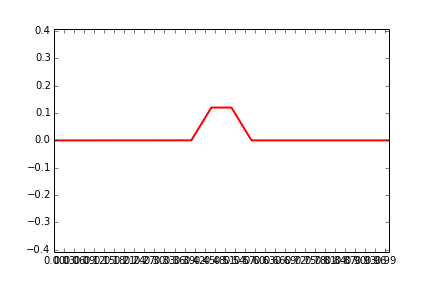
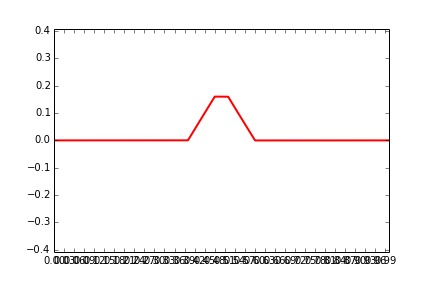
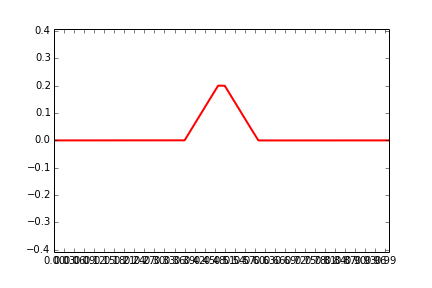
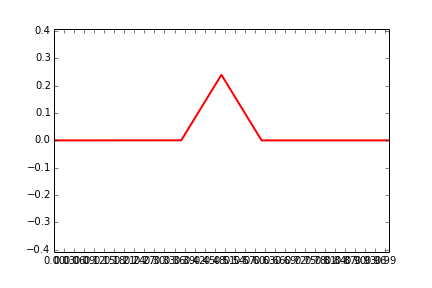
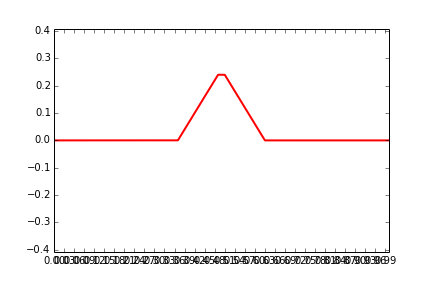
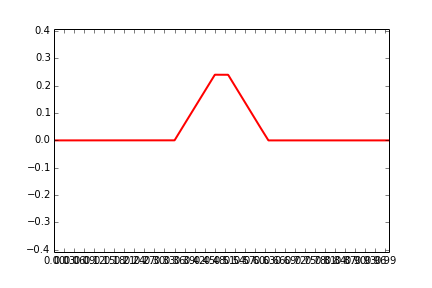
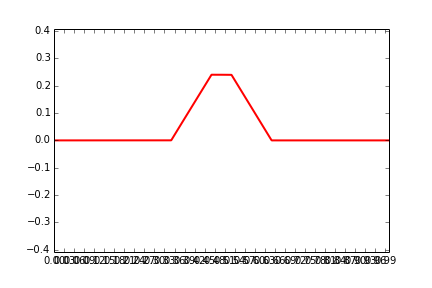
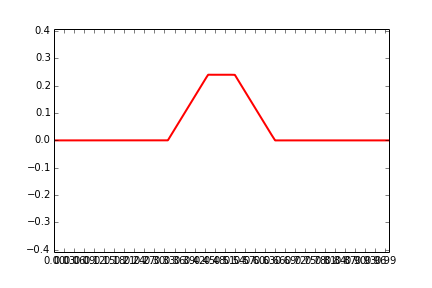
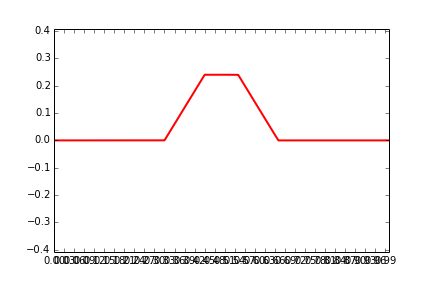
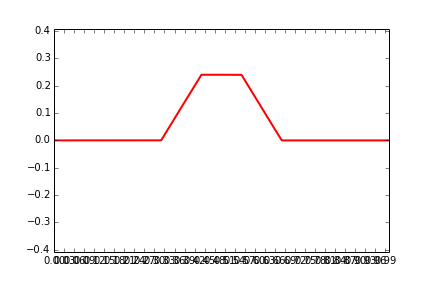
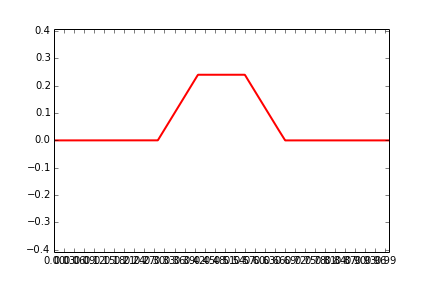
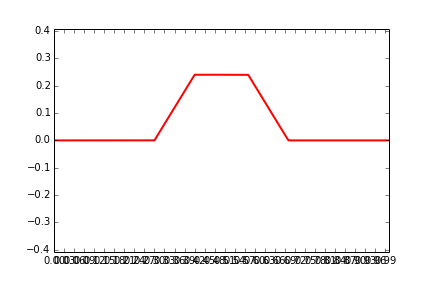
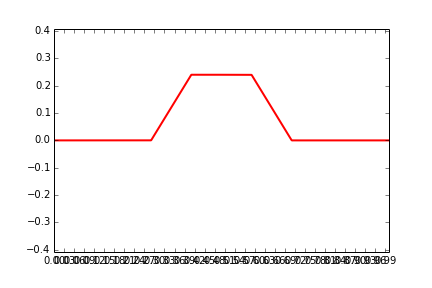
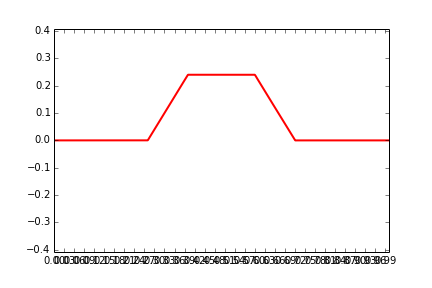
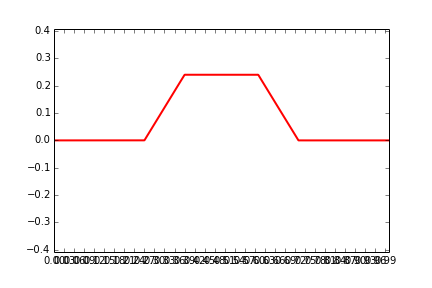
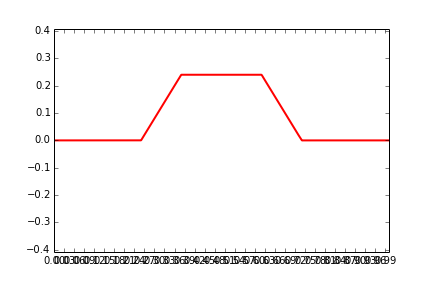
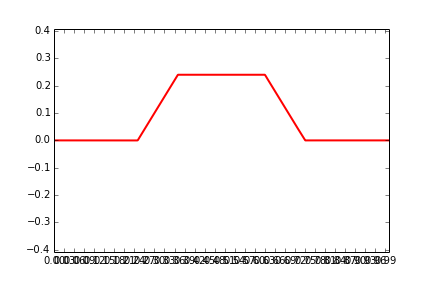
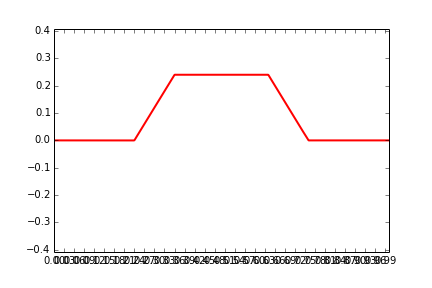
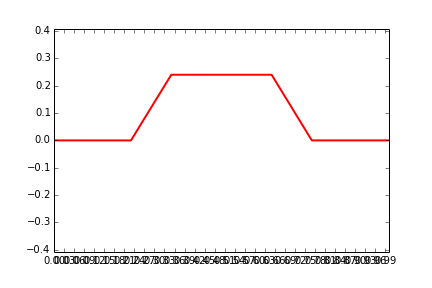
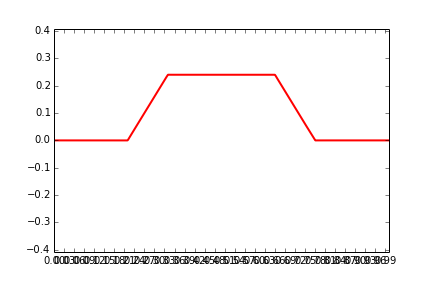
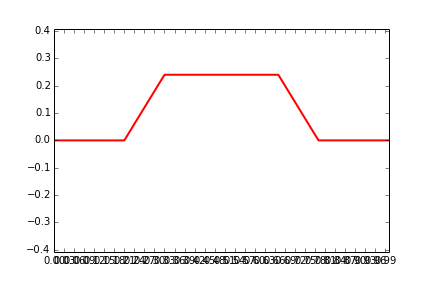
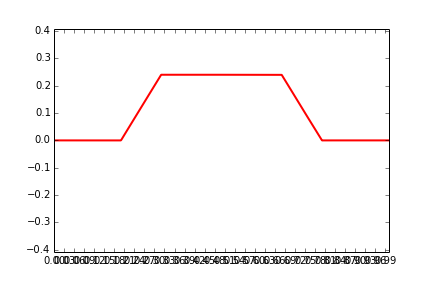
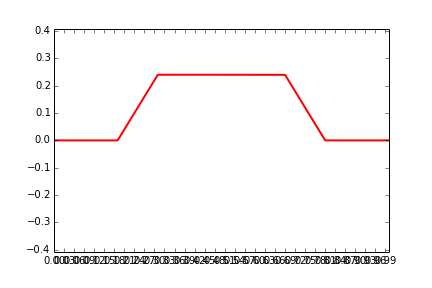
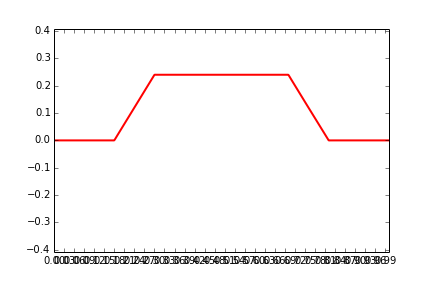
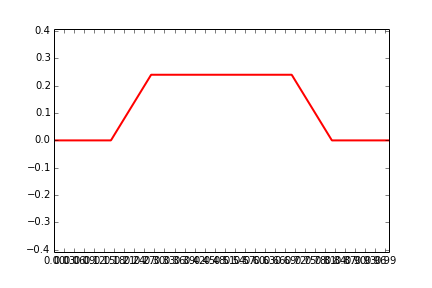
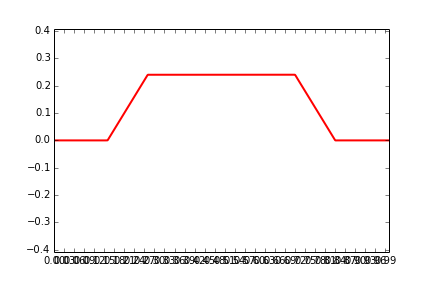
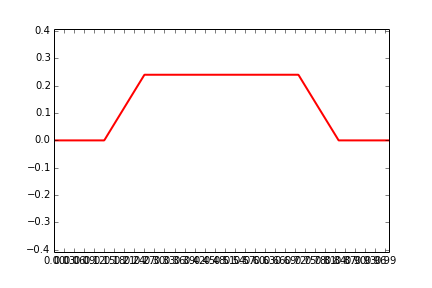
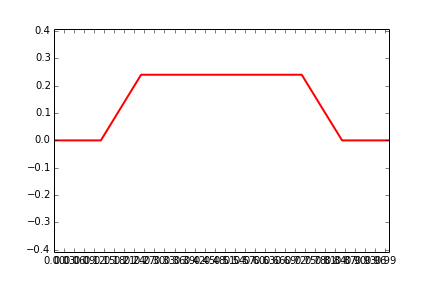
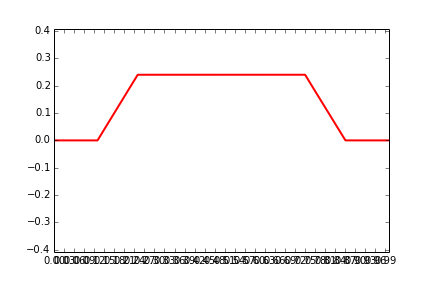
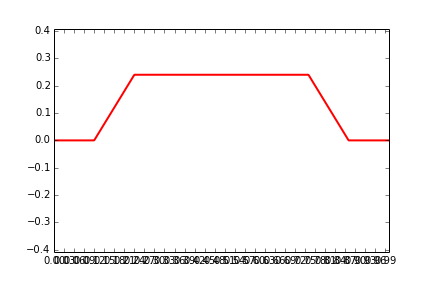
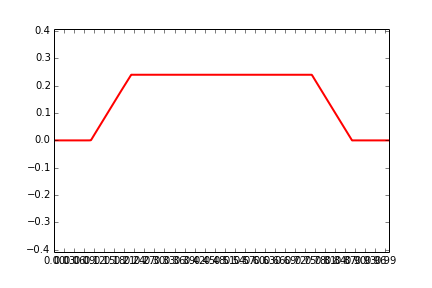
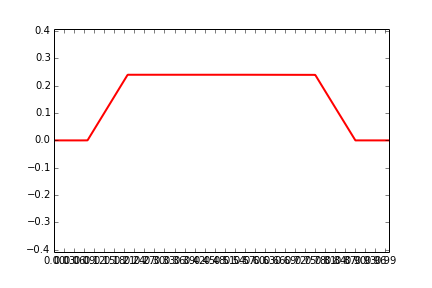
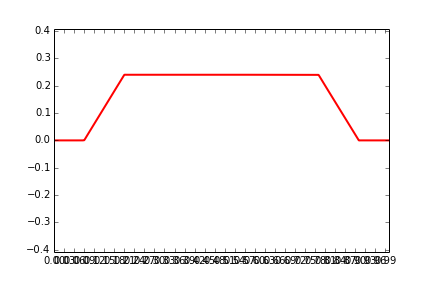
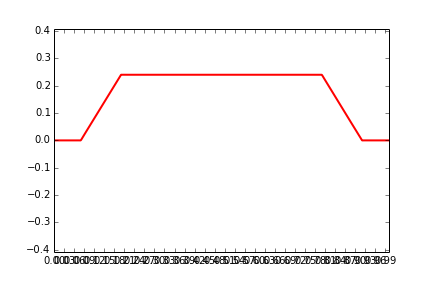
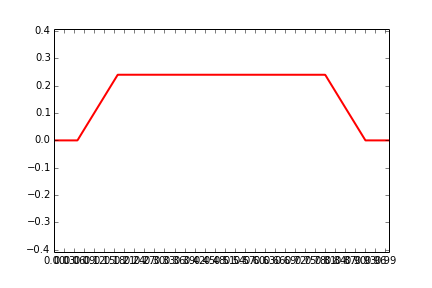
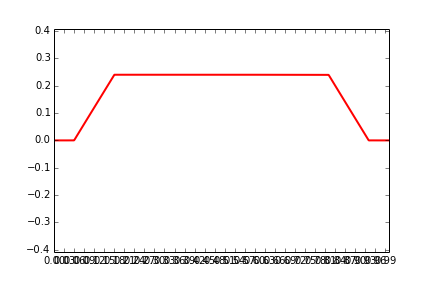
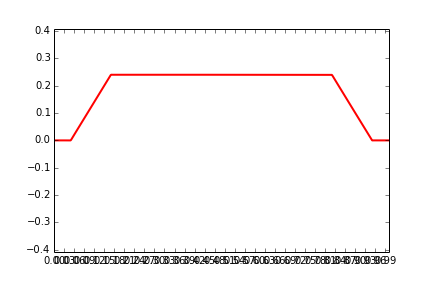
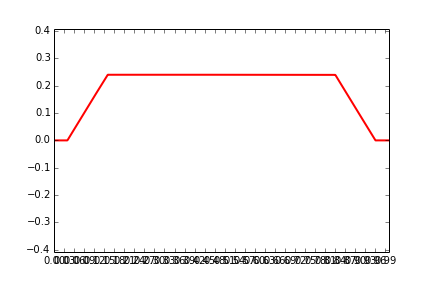
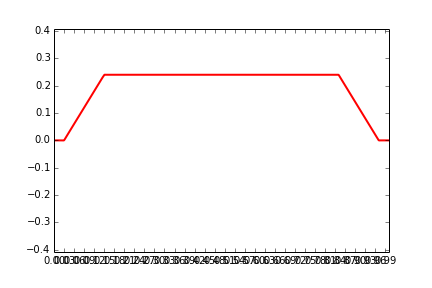
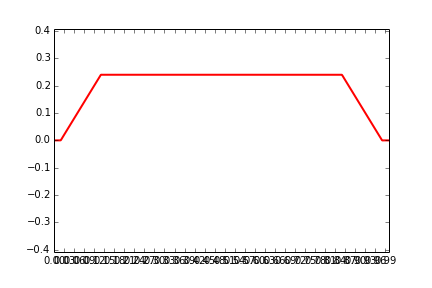
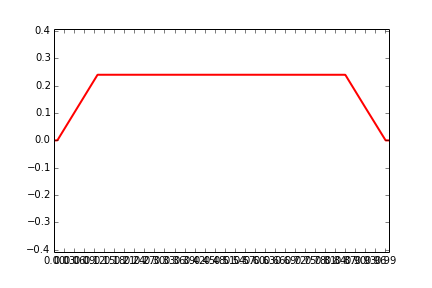
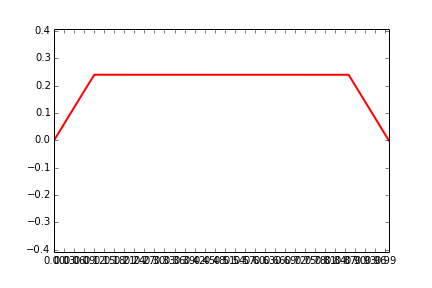
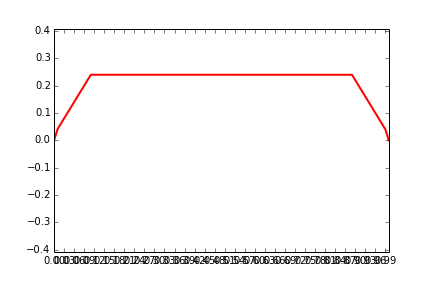
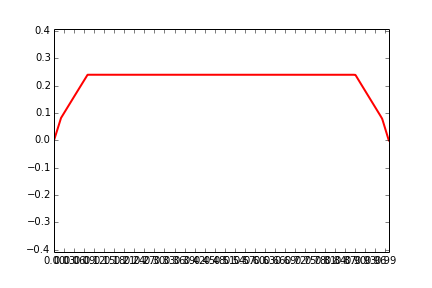
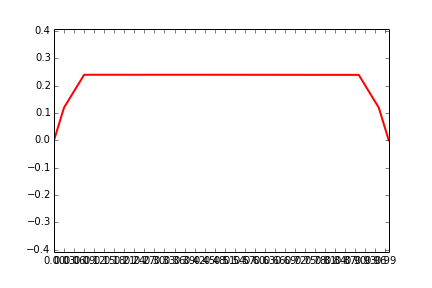
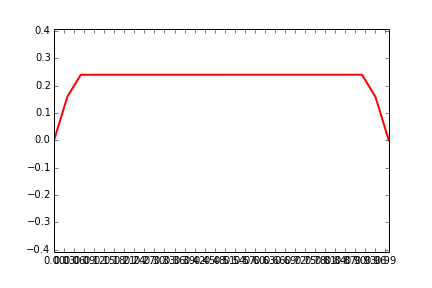
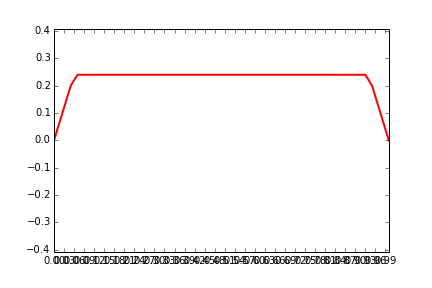
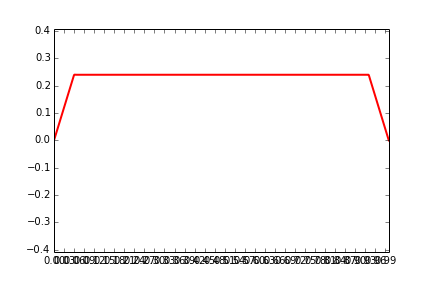
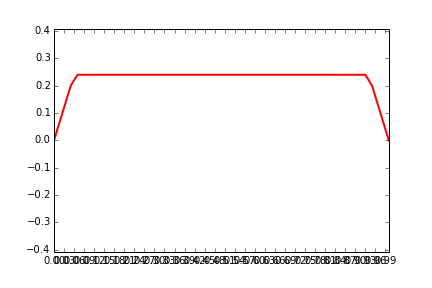
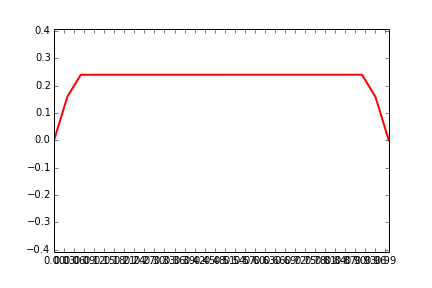
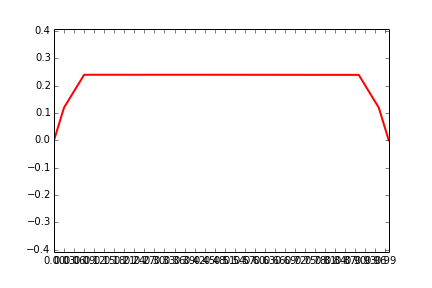
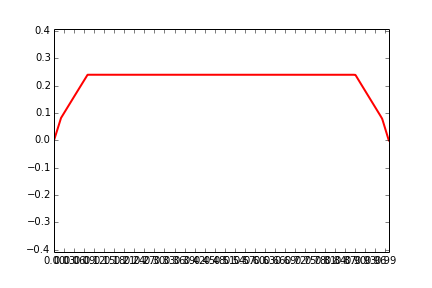
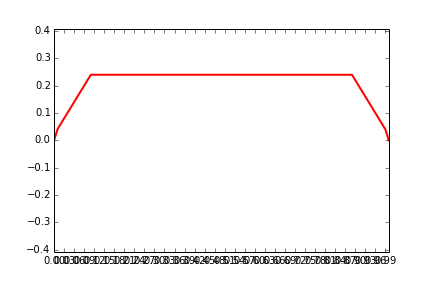
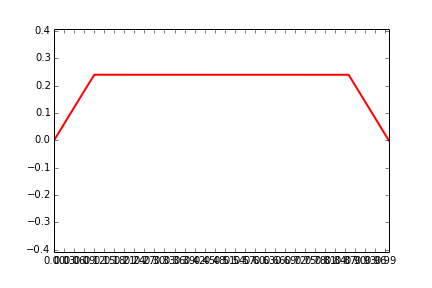
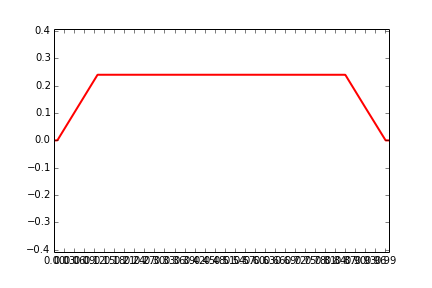
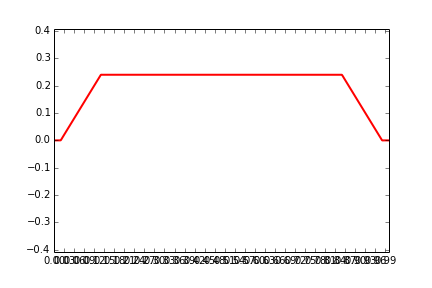
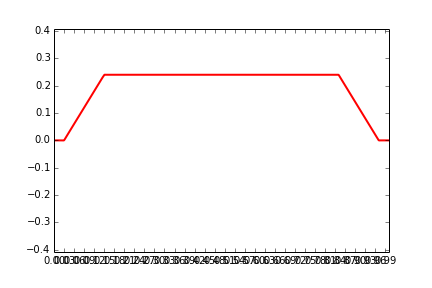
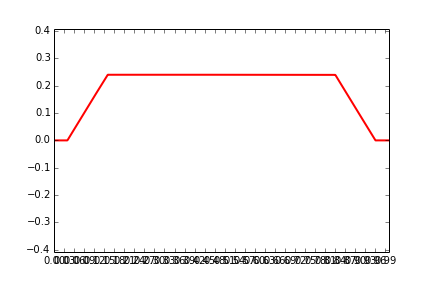
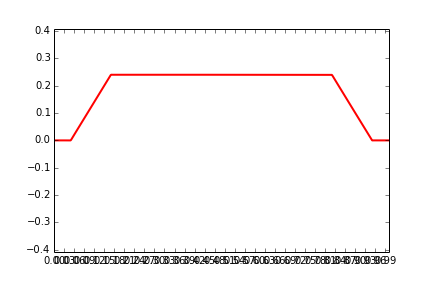
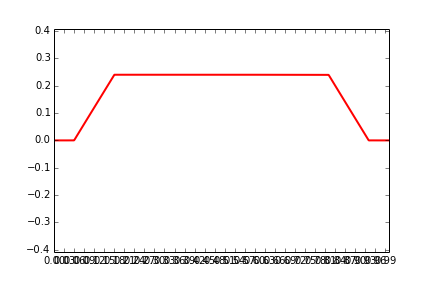
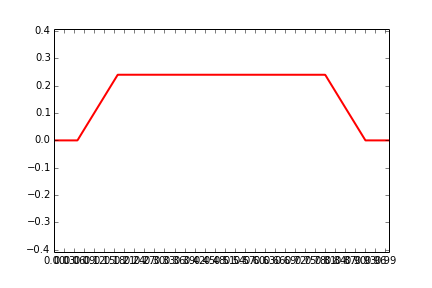
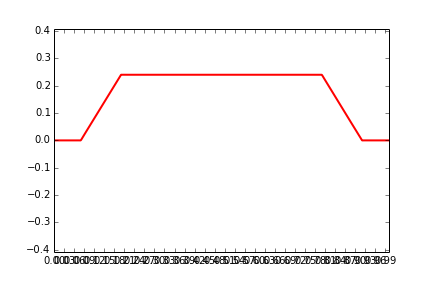
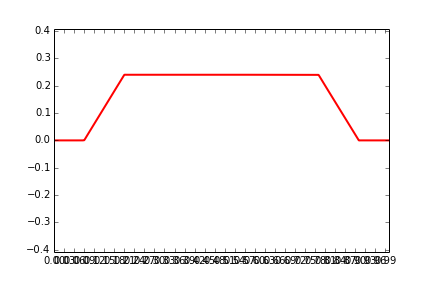
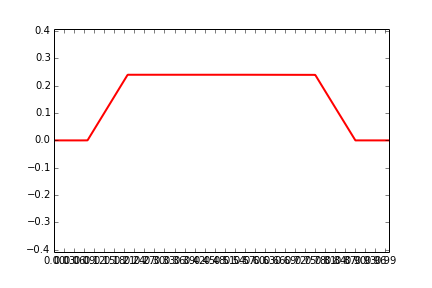
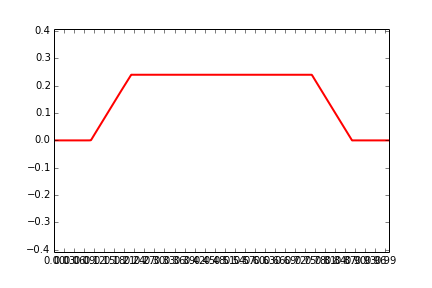
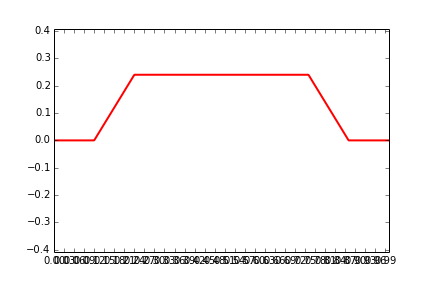
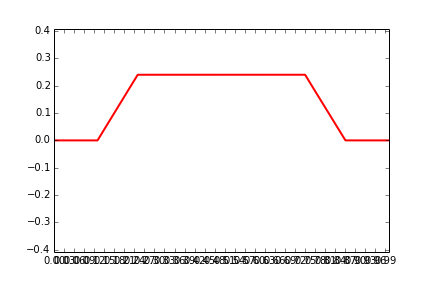
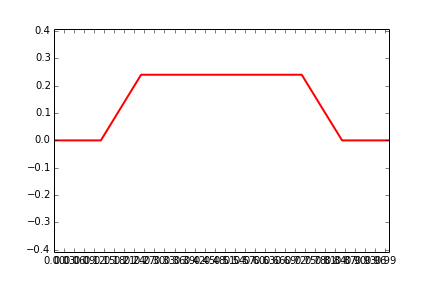
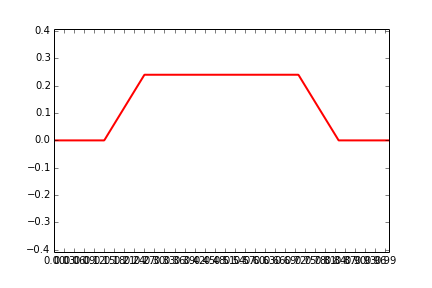
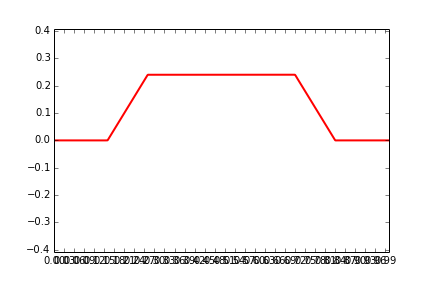
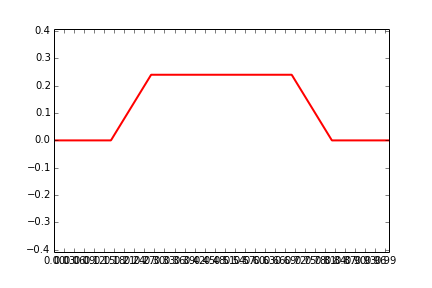
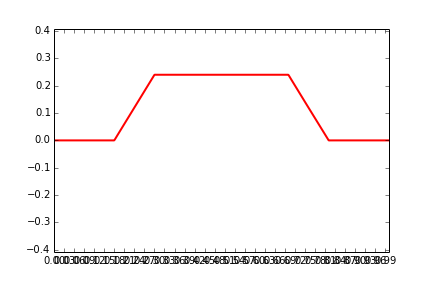
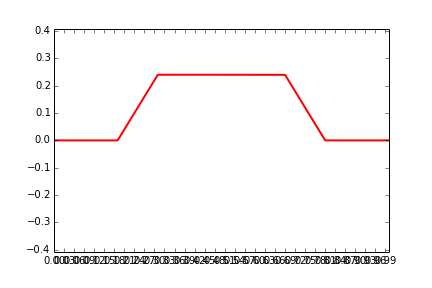
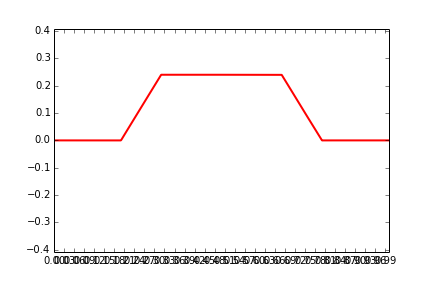
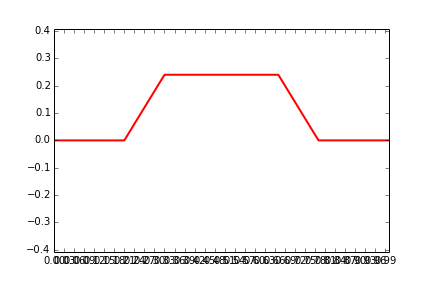
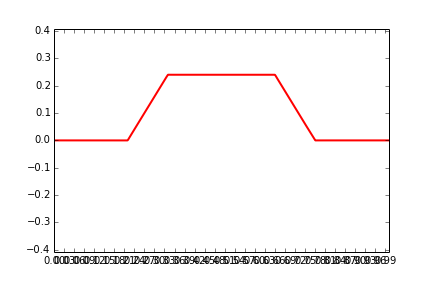
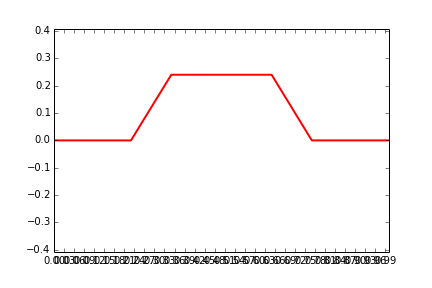
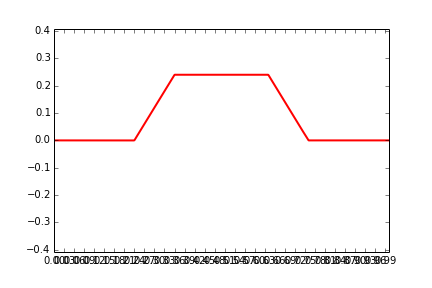
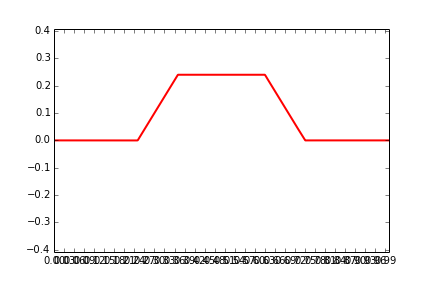
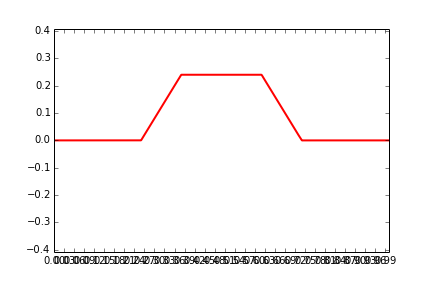
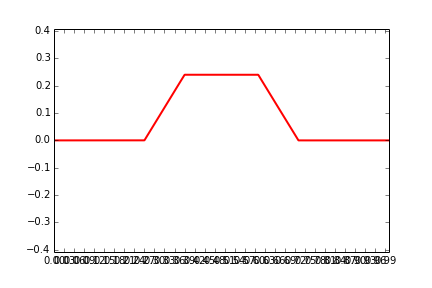
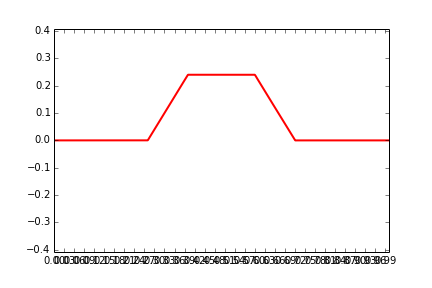
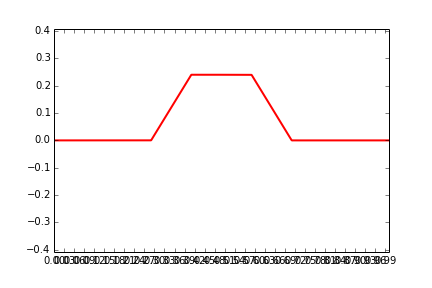
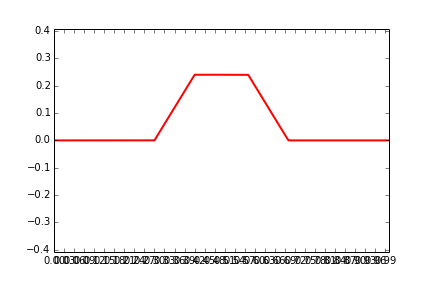
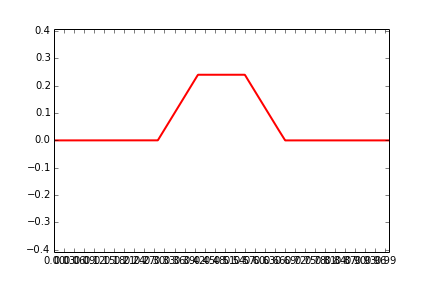
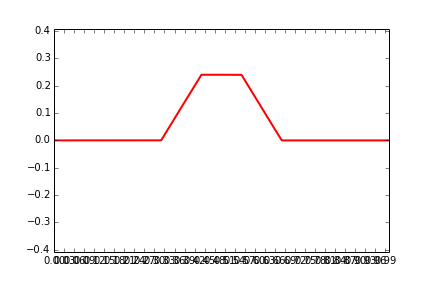
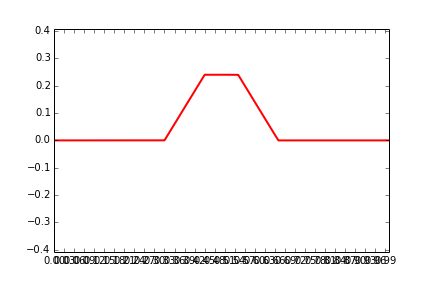
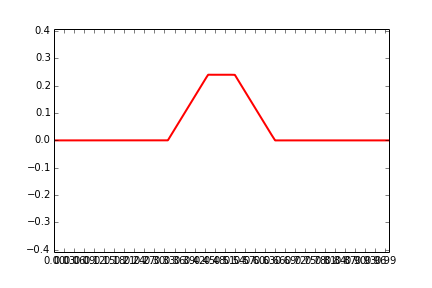
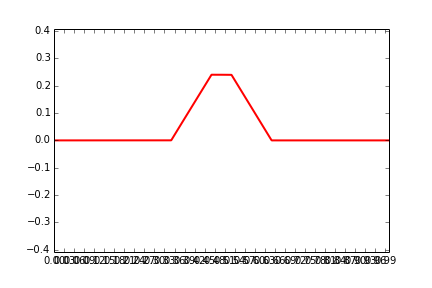
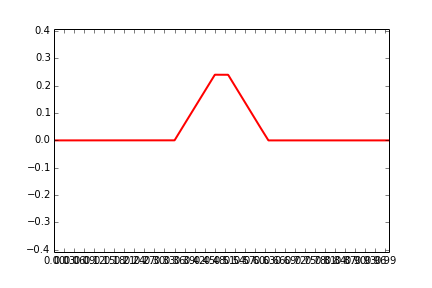
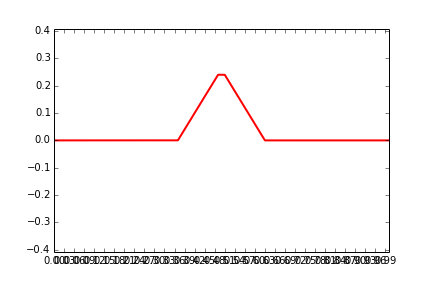
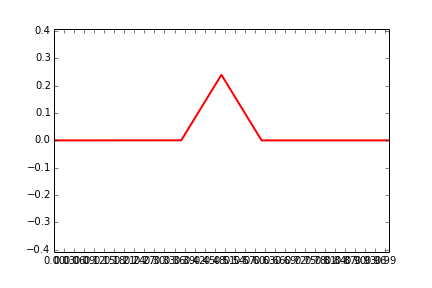
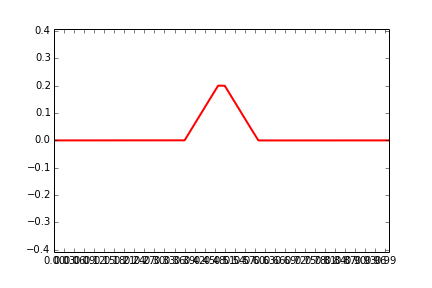
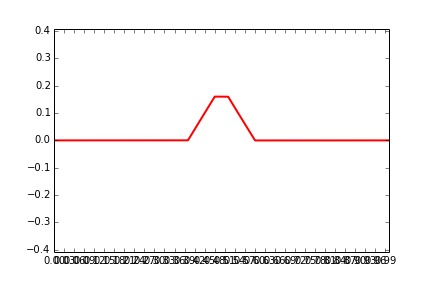
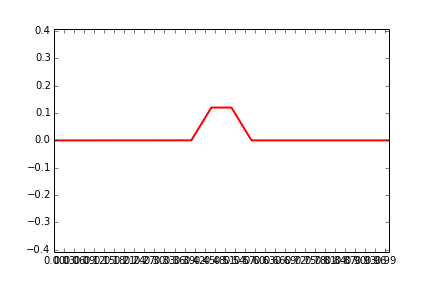
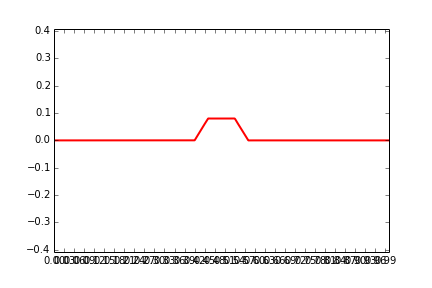
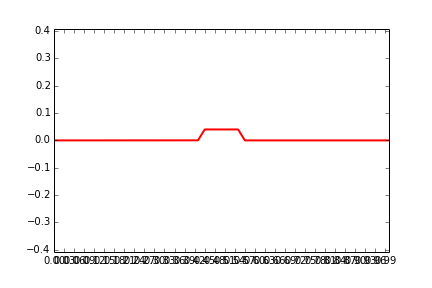
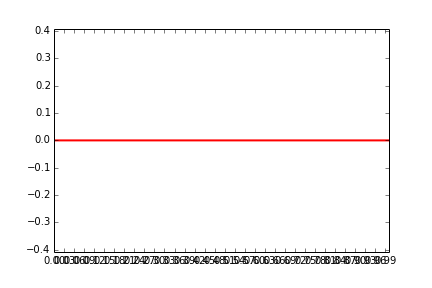
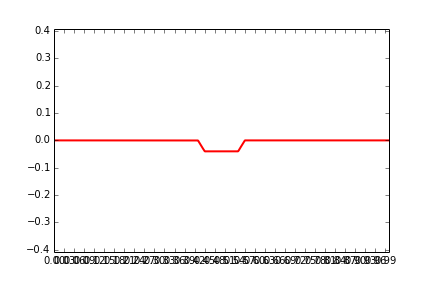
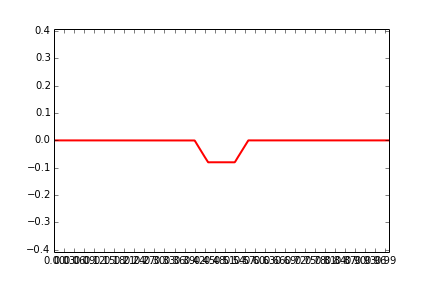
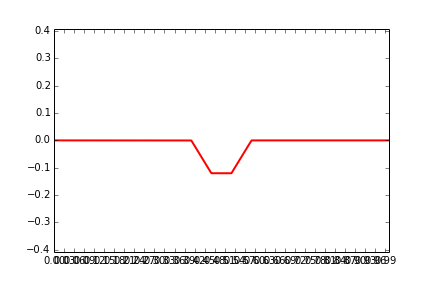
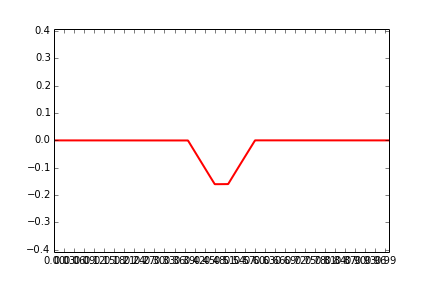
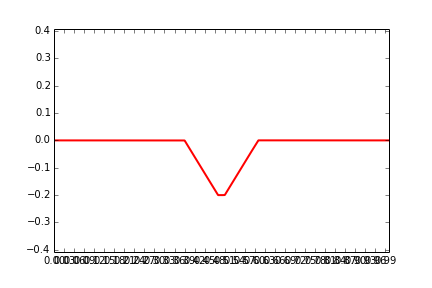
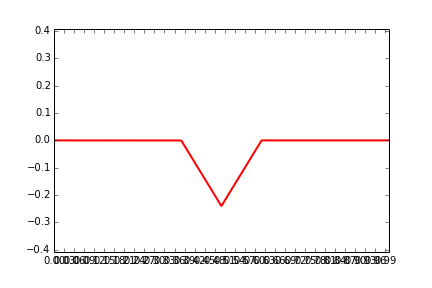
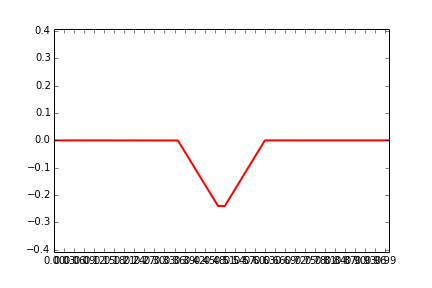
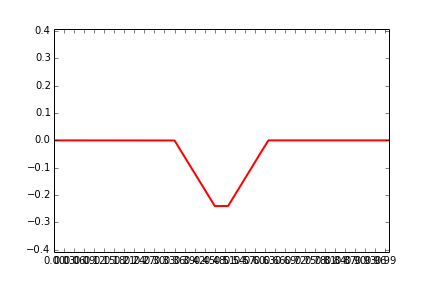
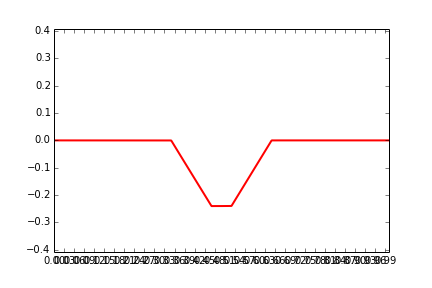
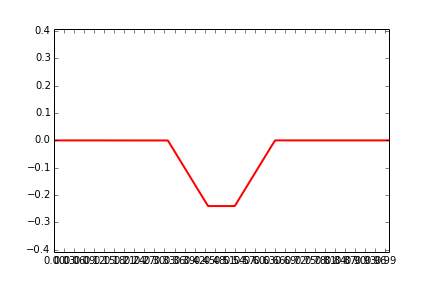
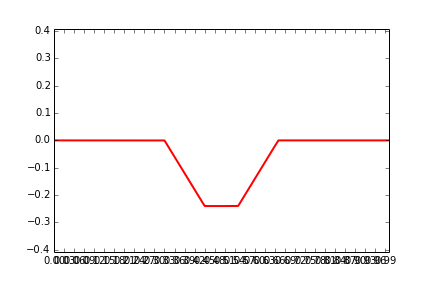
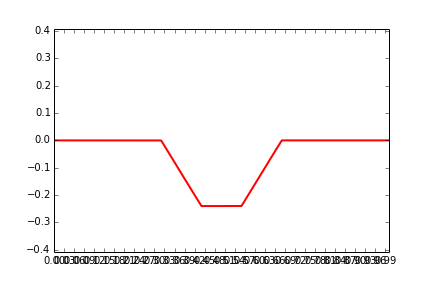
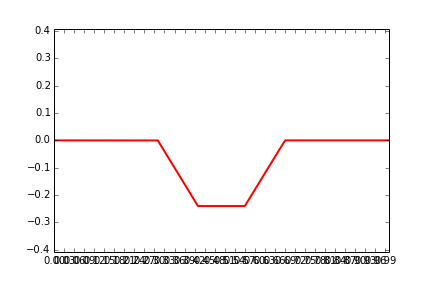
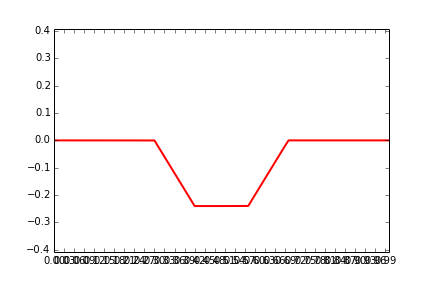
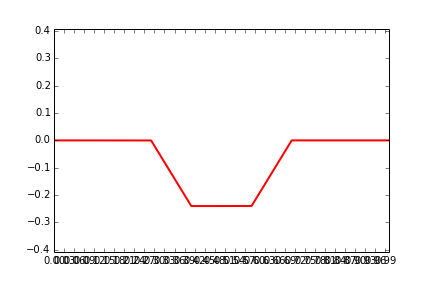
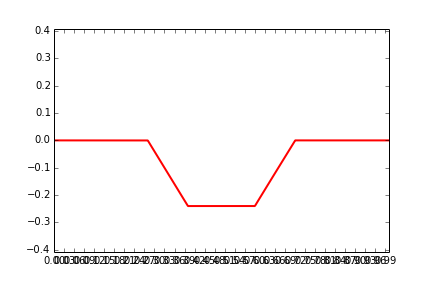
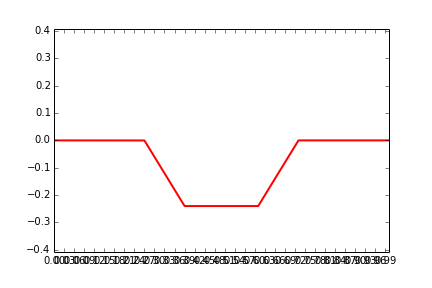
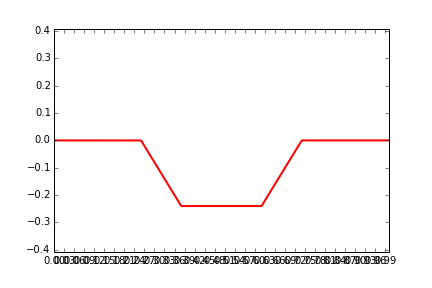
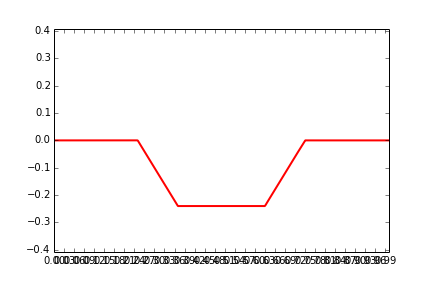
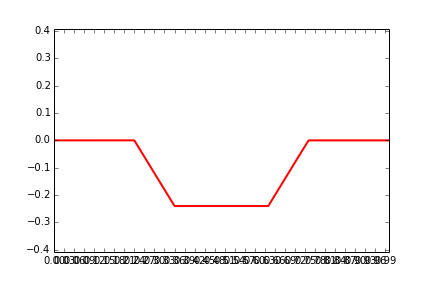
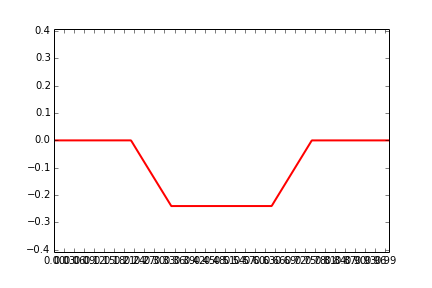
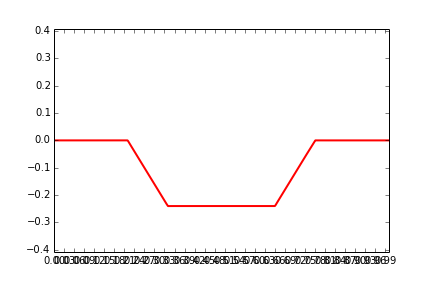
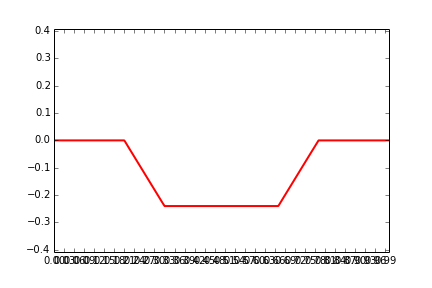
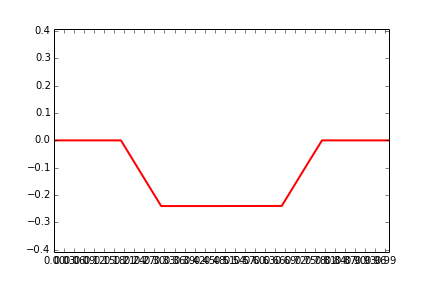
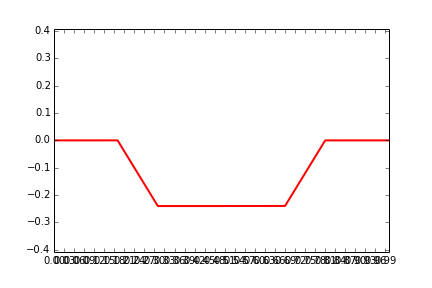
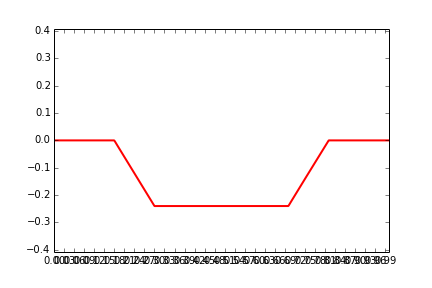
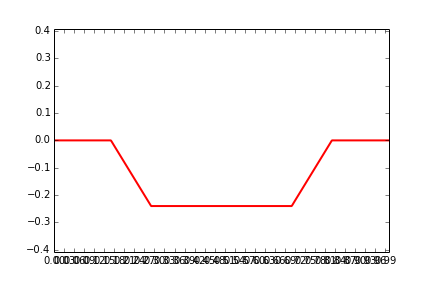
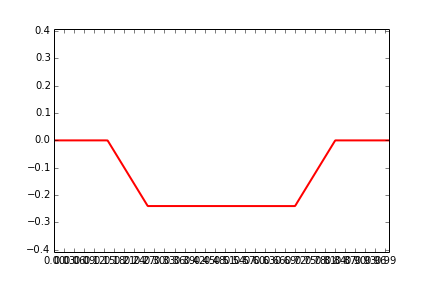
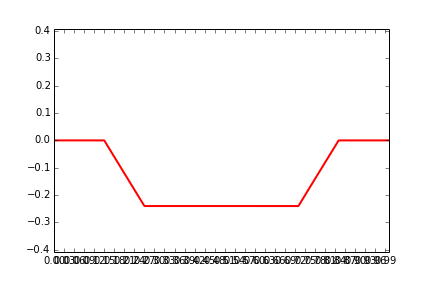
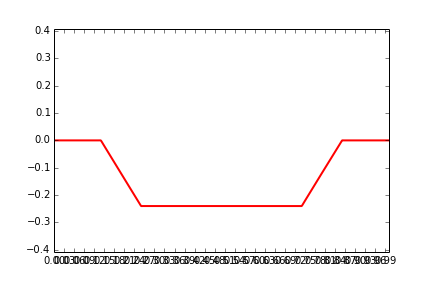
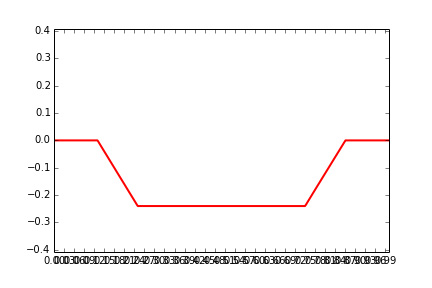
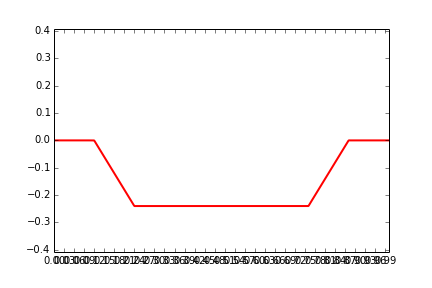
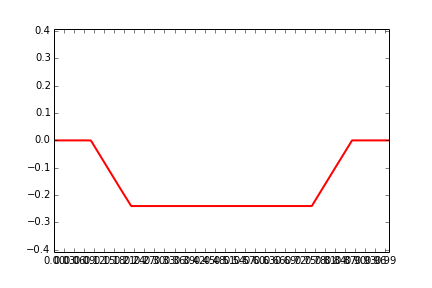
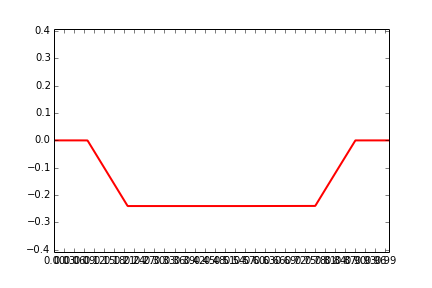
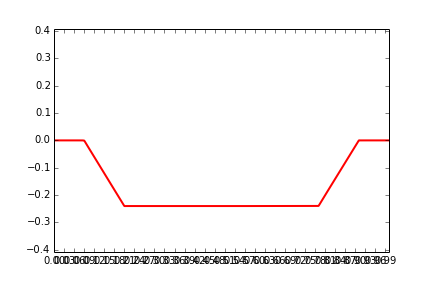
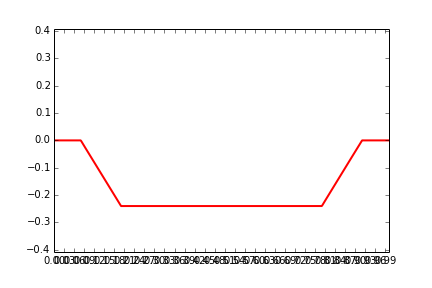
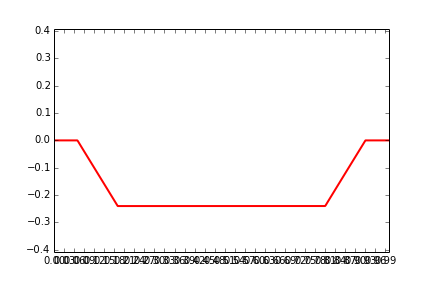
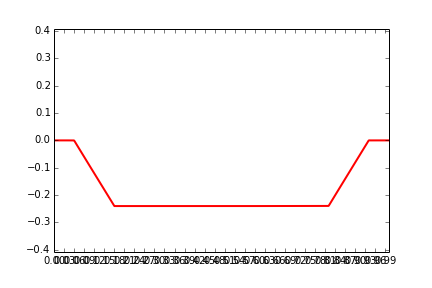
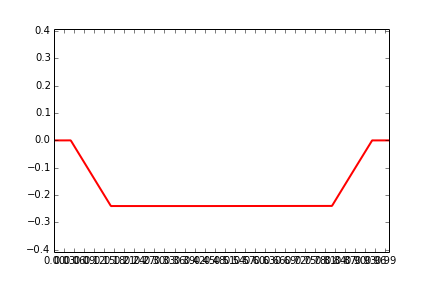
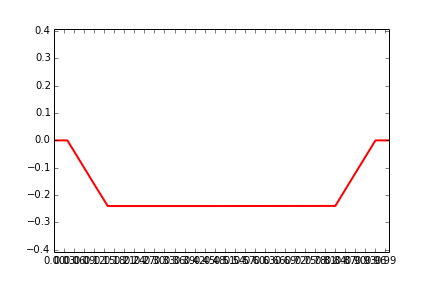
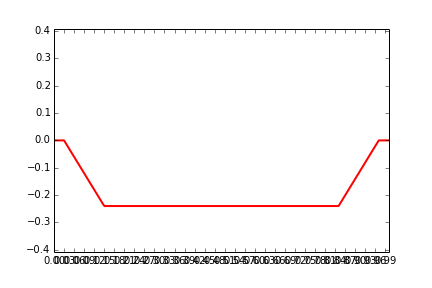
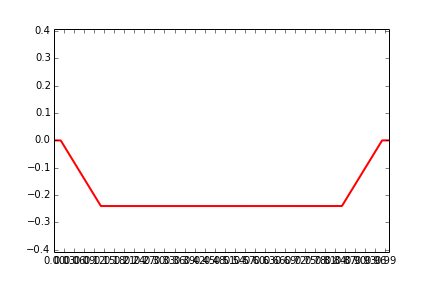
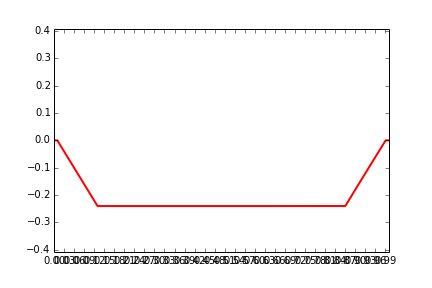
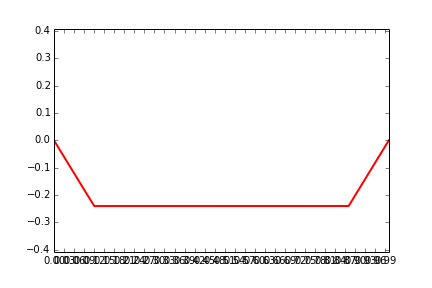
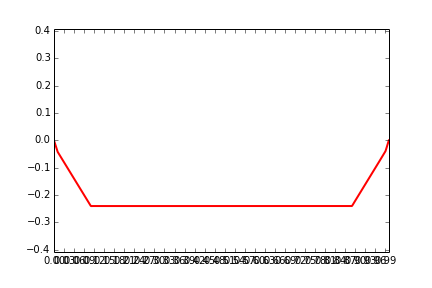
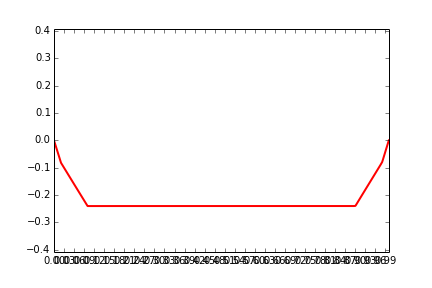
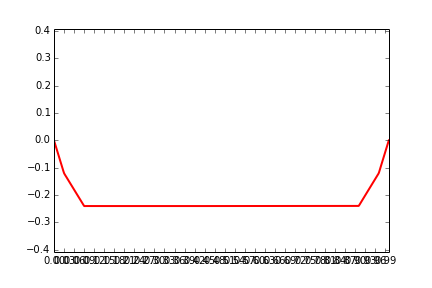
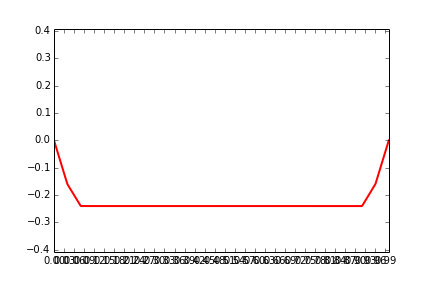
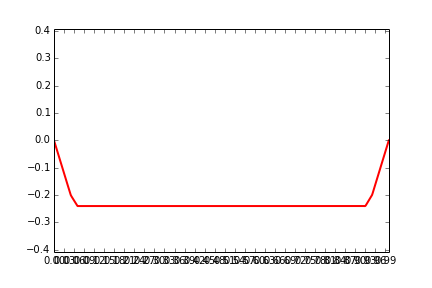
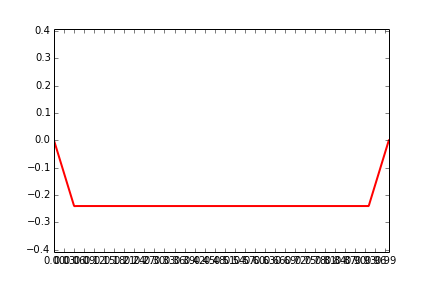
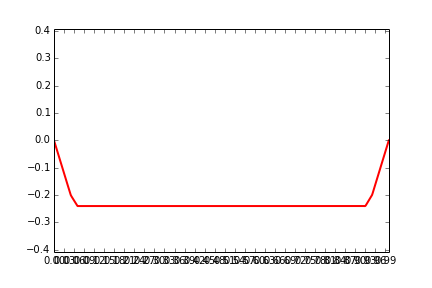
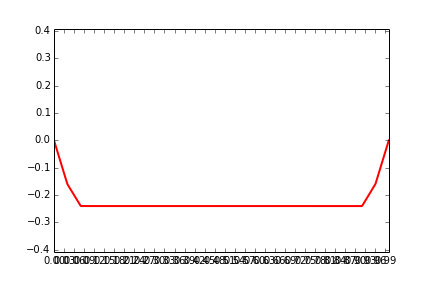
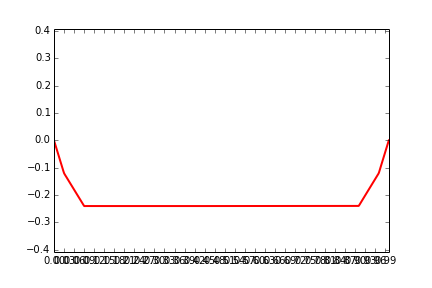
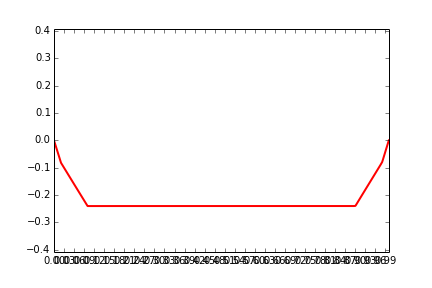
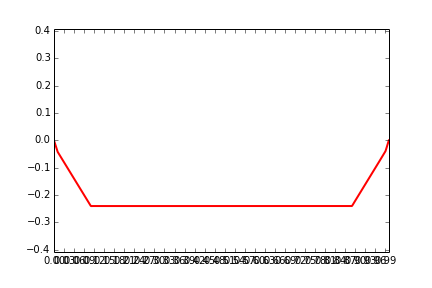
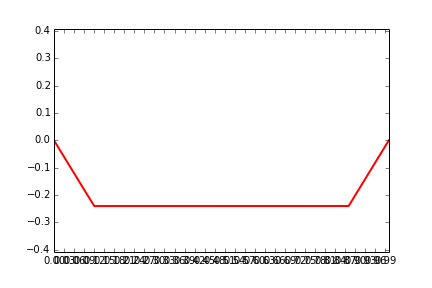
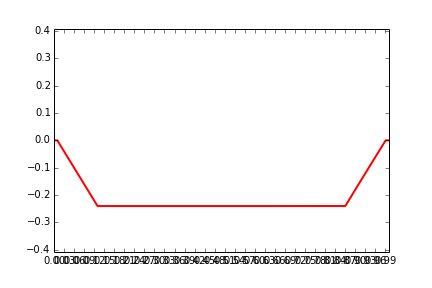
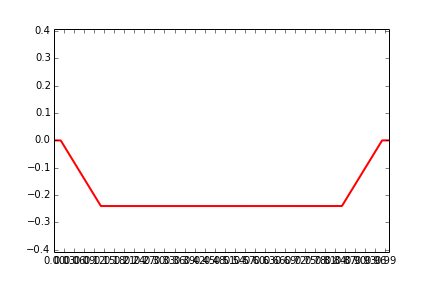
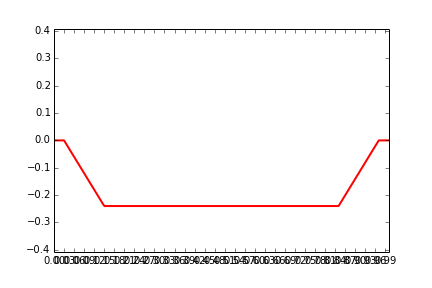
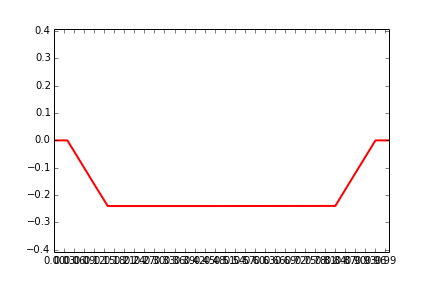
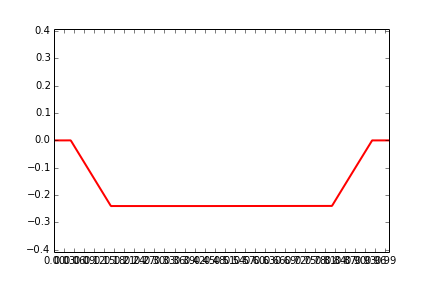
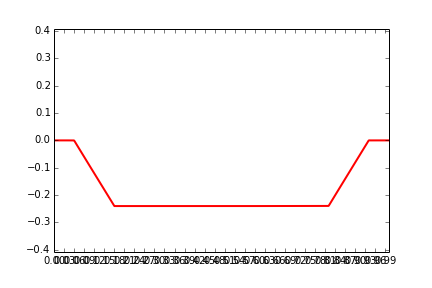
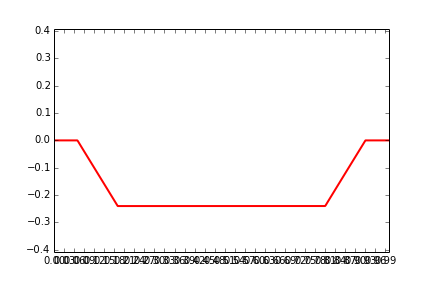
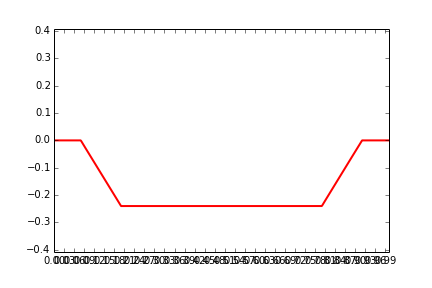
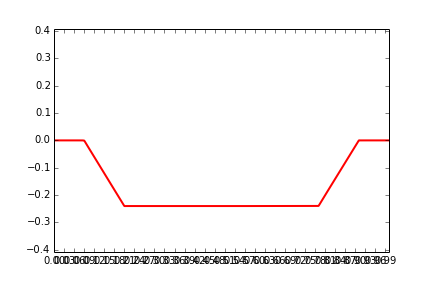
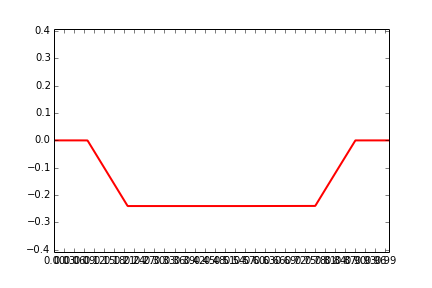
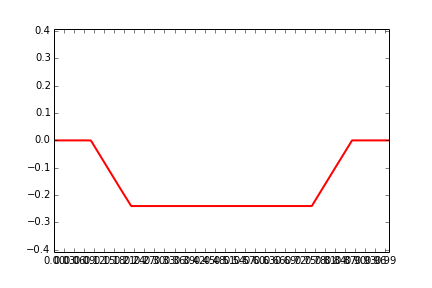
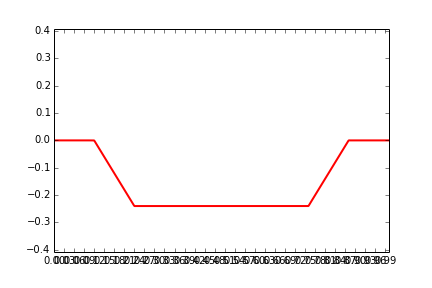
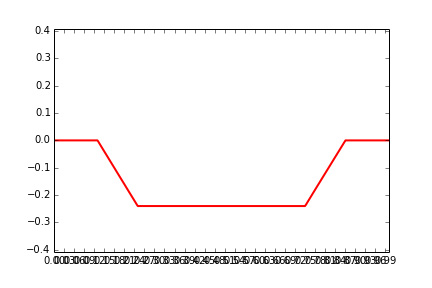
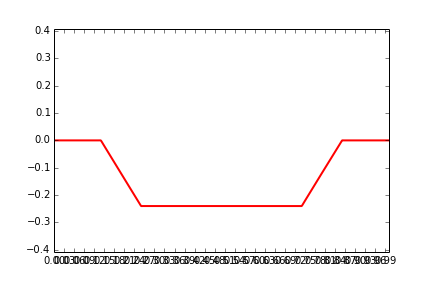
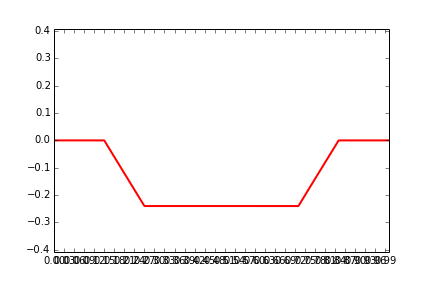
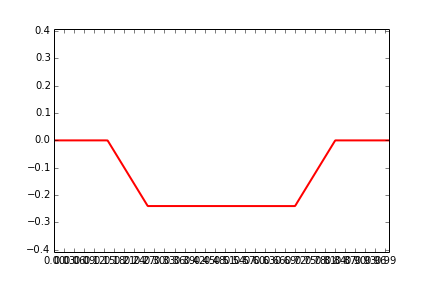
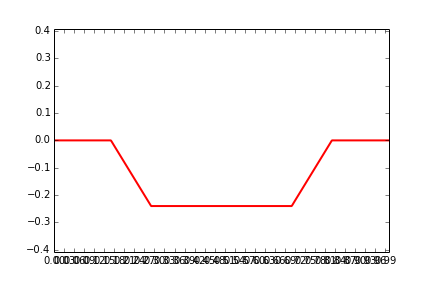
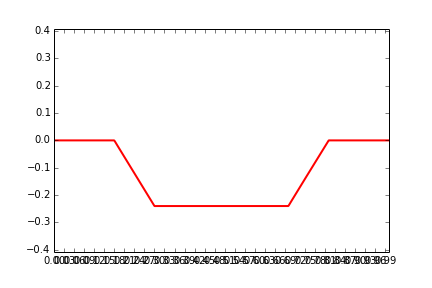
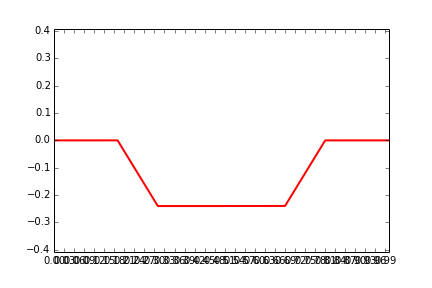
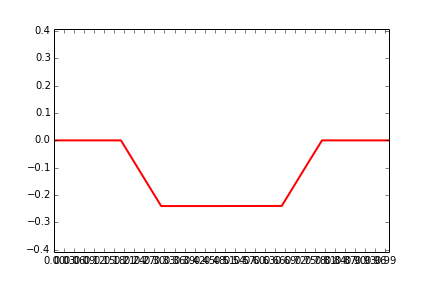
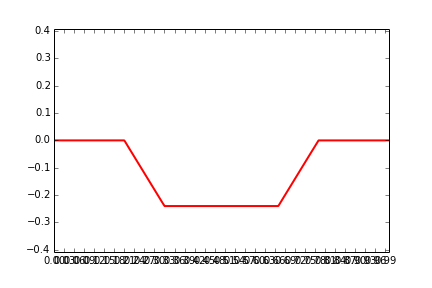
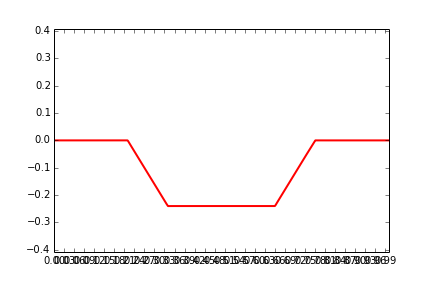
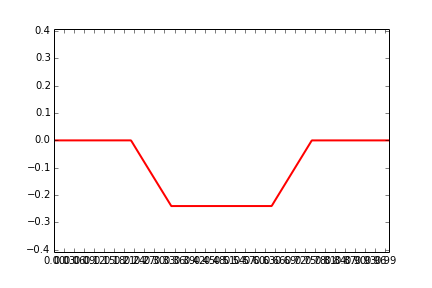
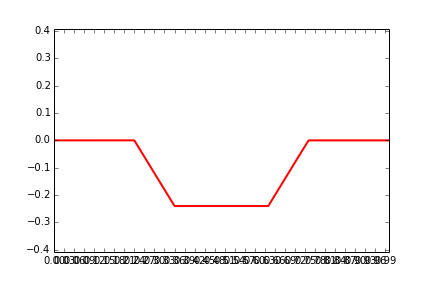
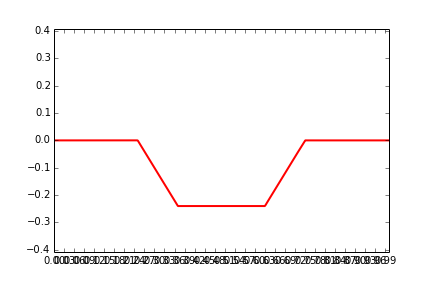
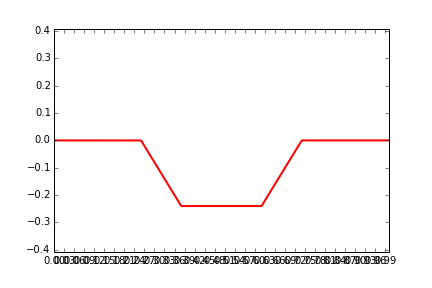
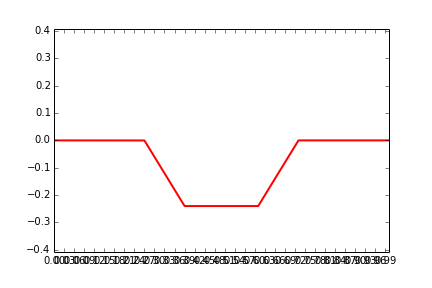
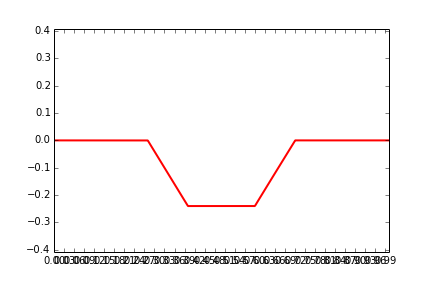
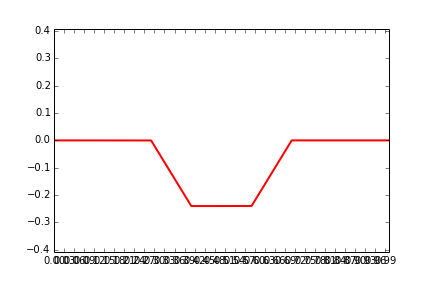
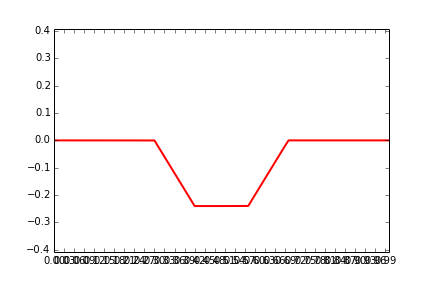
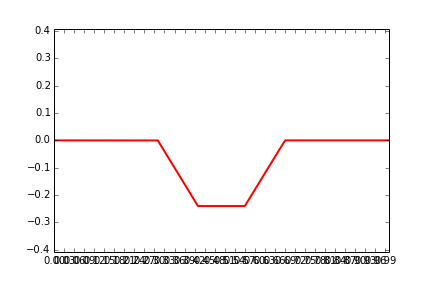
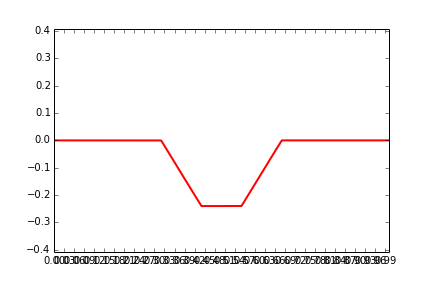
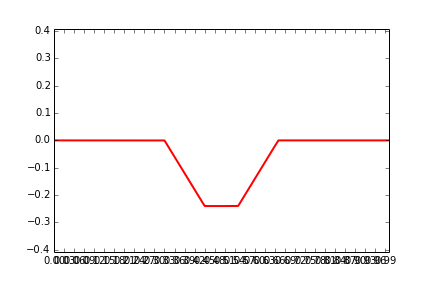
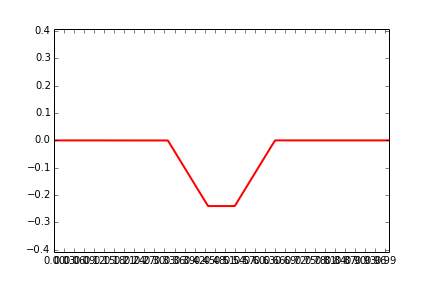
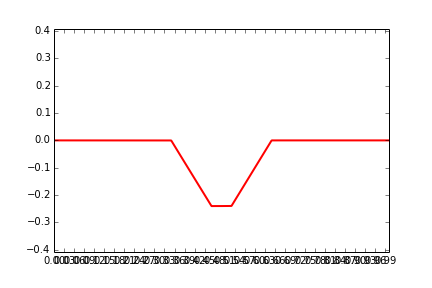
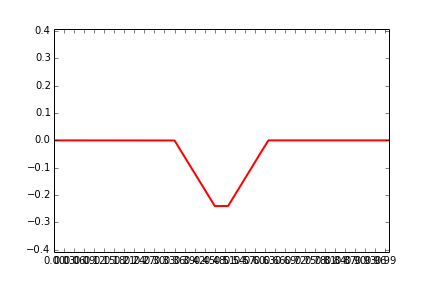
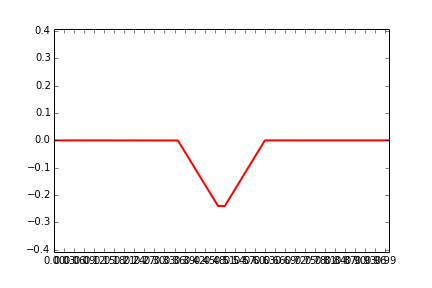
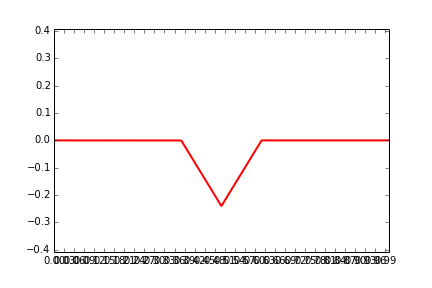
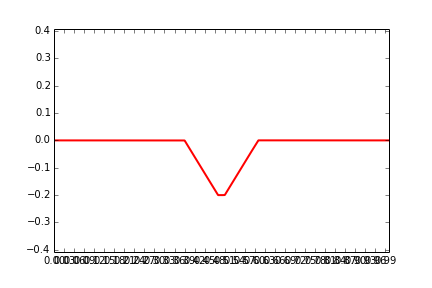
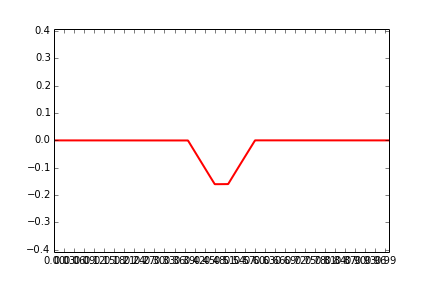
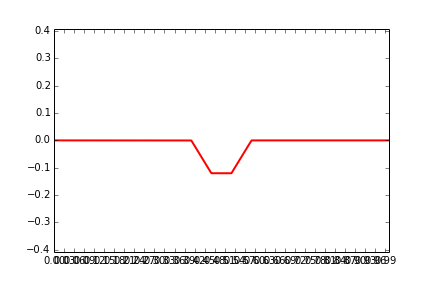
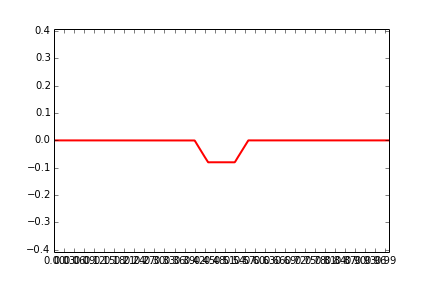
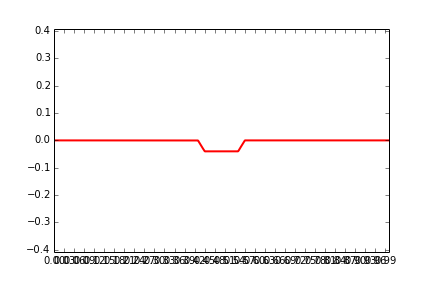

In [16]:
N=400
fig = plt.figure()
ax = plt.axes(xlim=(0, l), ylim=(-21.2*h, 21.2*h))
plt.xticks(arange(0,l,w/2))
line, = ax.plot([], [], lw=2, color='red')
def animate(t):
    y = zeros_like(x)
    for n in range(1,N+1,2): # range starts at zero
        pre = (-1)**((n-1)/2)
        y = y +  pre * (1/n**2) * (sin(n*pi*w/l)*sin(n*pi*x/l)*sin(n*pi*v*t/l))


    y = ( (4*h*l)/(pi*pi*v) ) * y
    #y = ( (4*h*l)/(pi*pi*w) ) * y

    line.set_data(x, y)
    return line,
animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


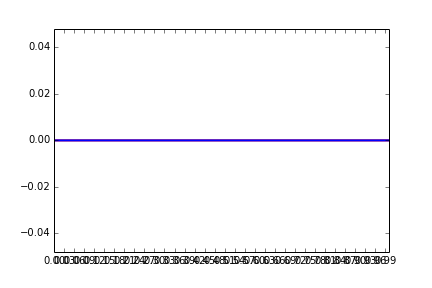
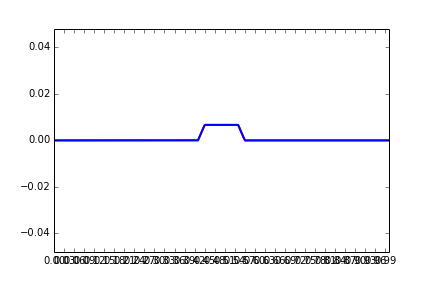
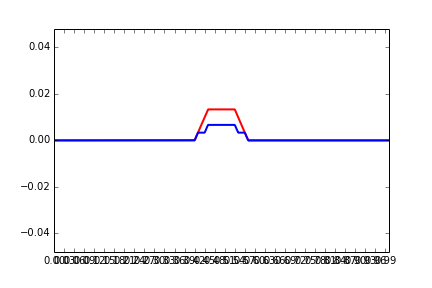
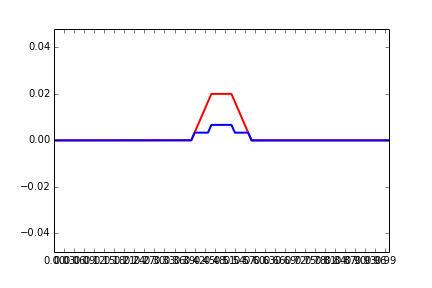
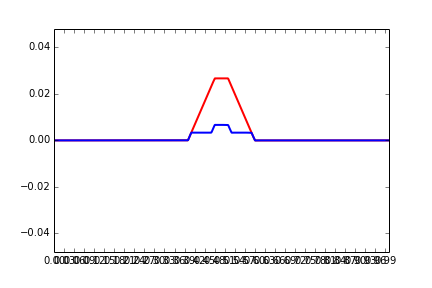
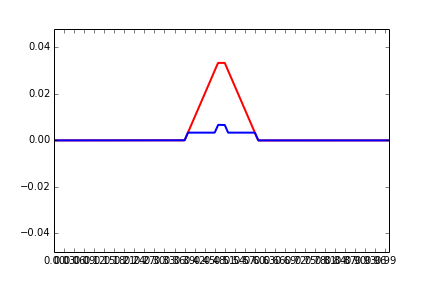
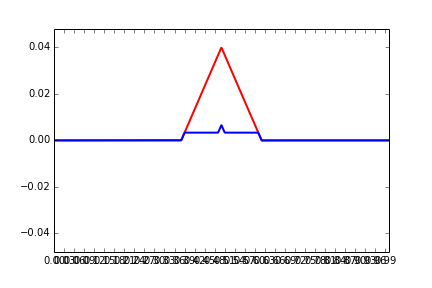
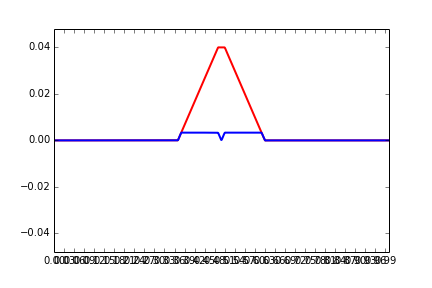
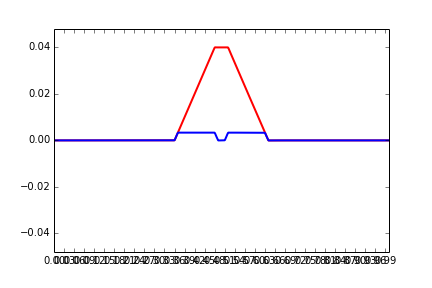
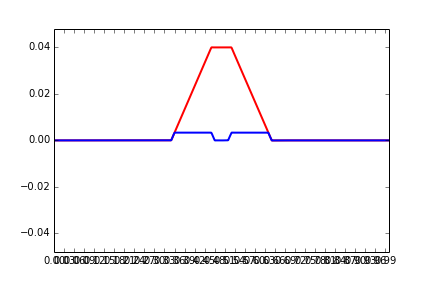
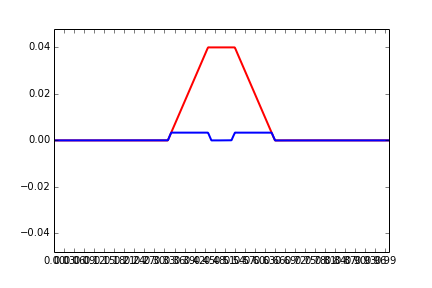
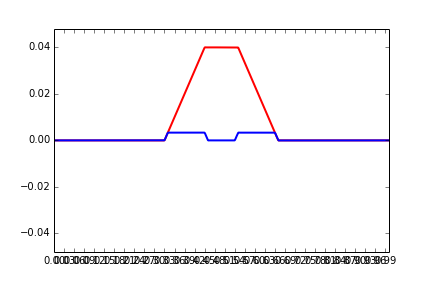
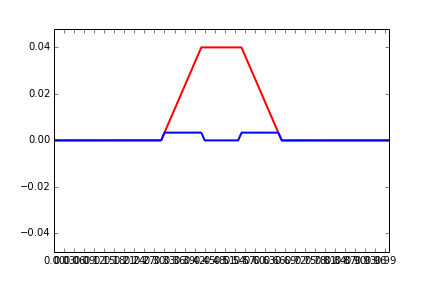
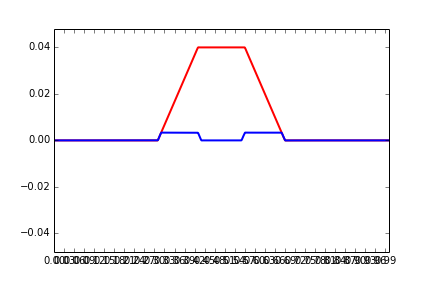
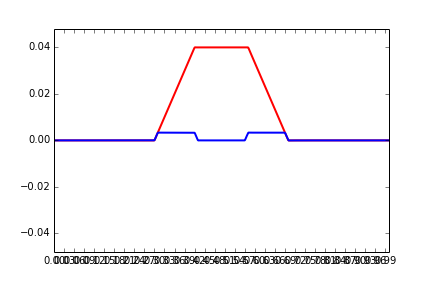
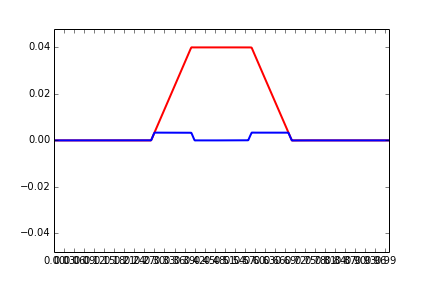
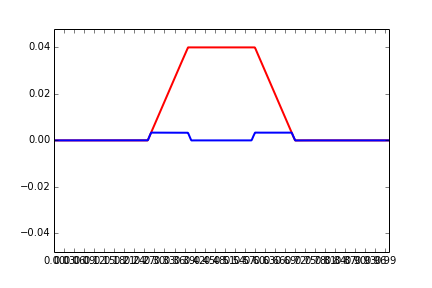
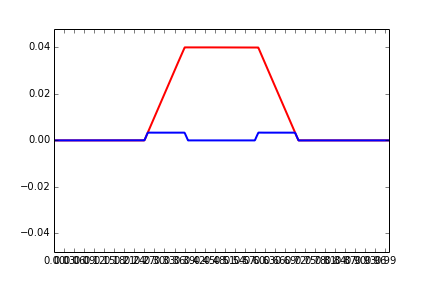
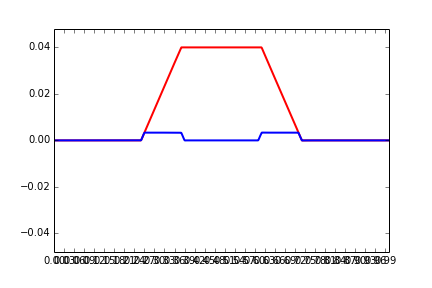
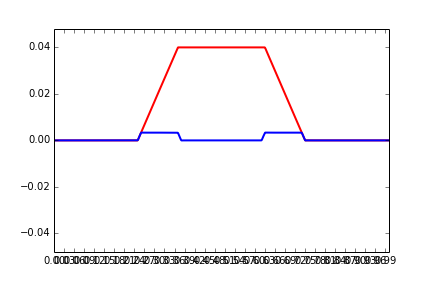
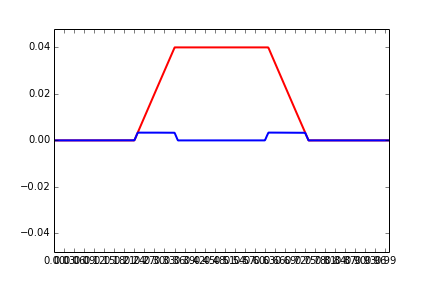
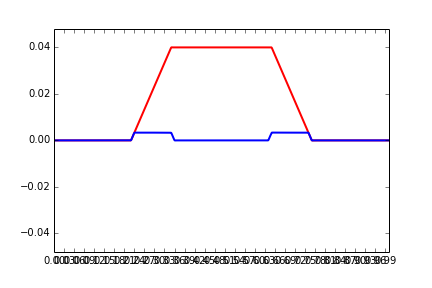
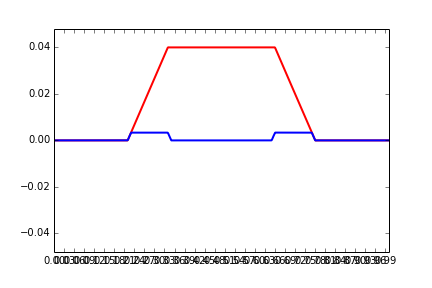
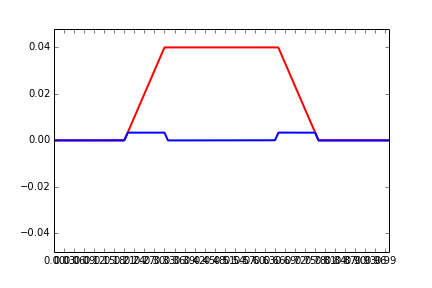
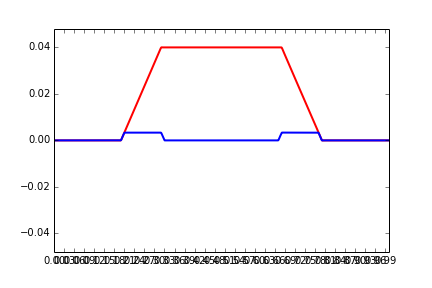
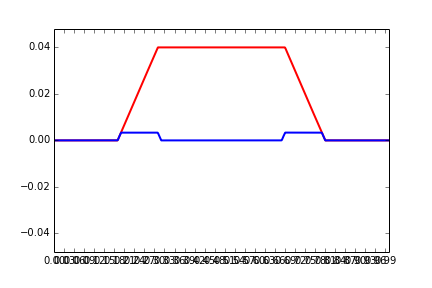
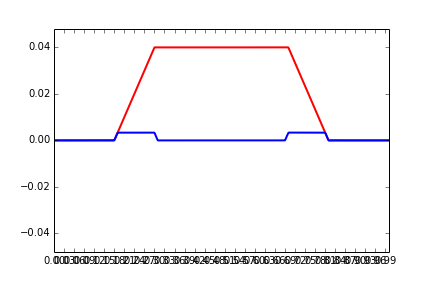
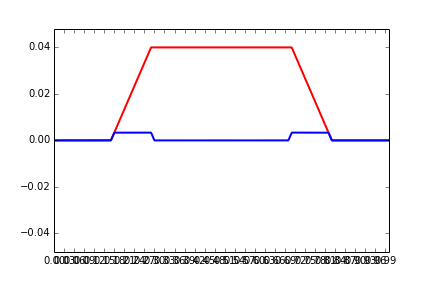
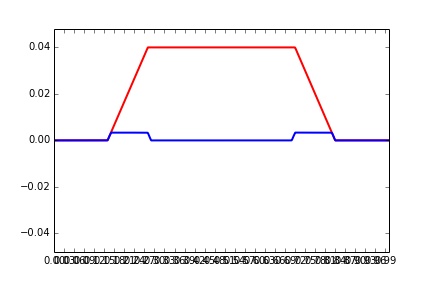
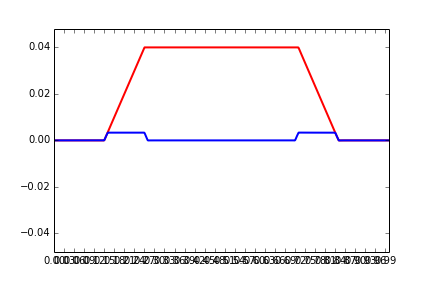
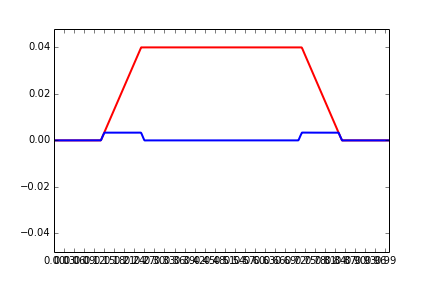
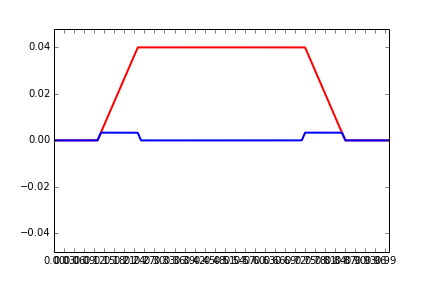
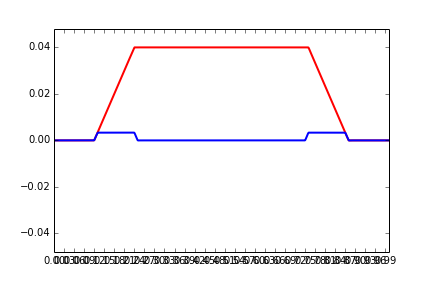
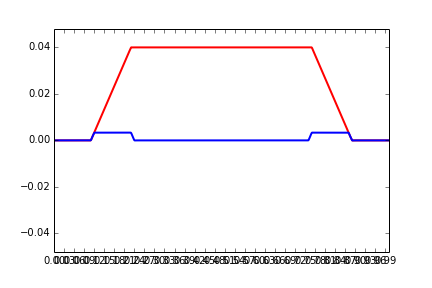
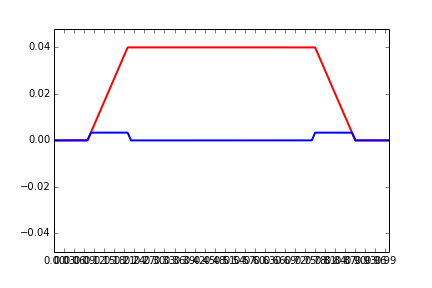
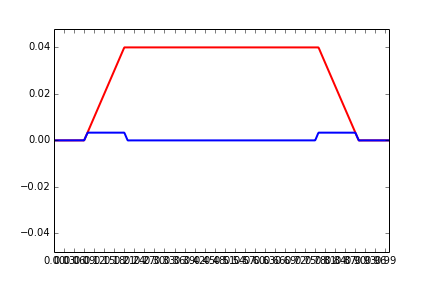
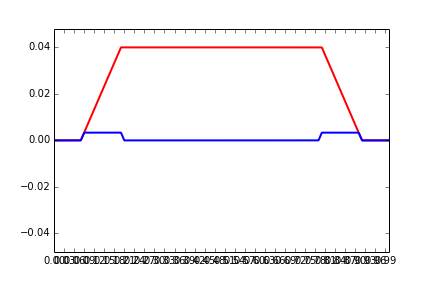
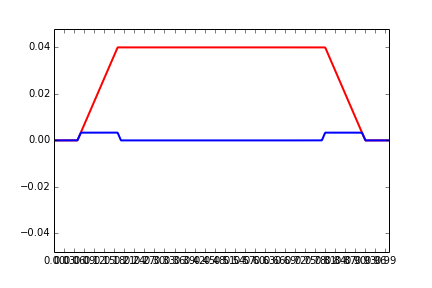
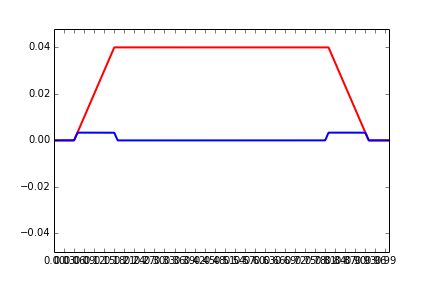
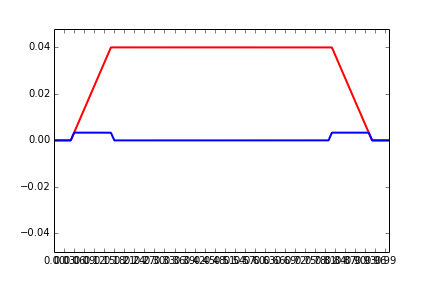
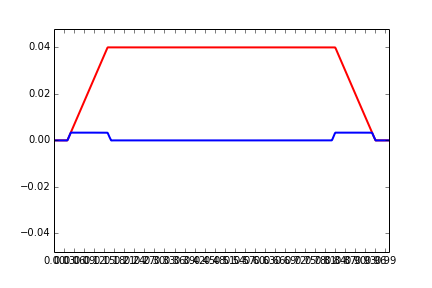
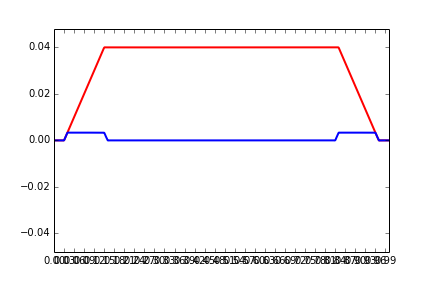
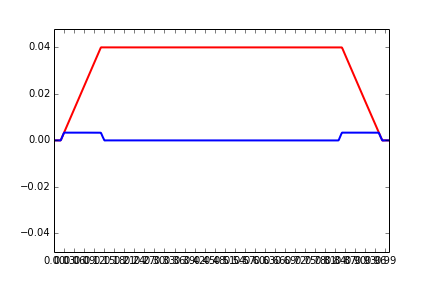
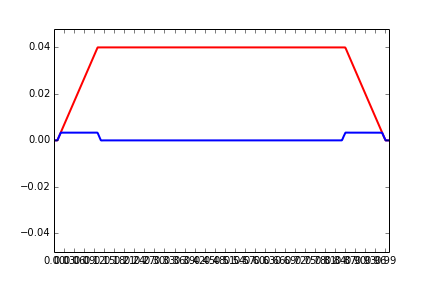
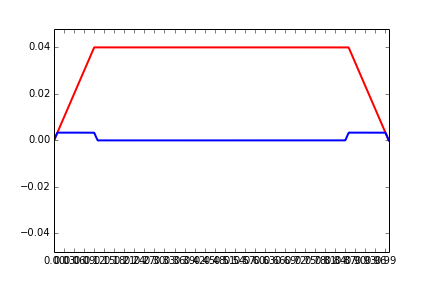
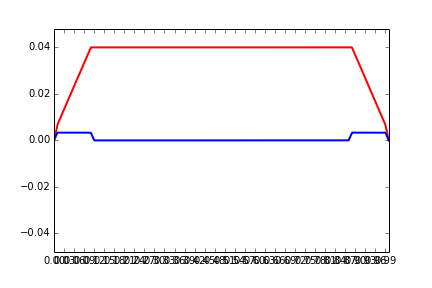
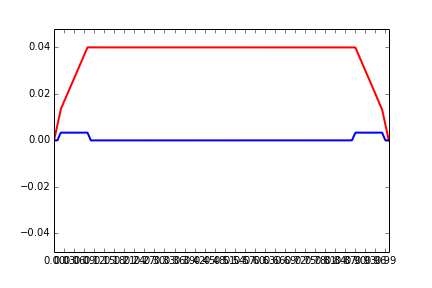
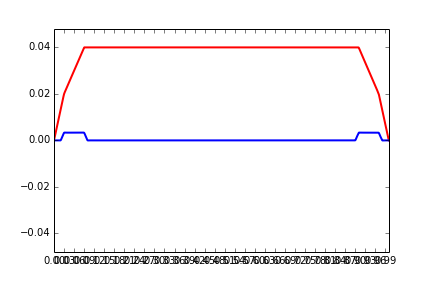
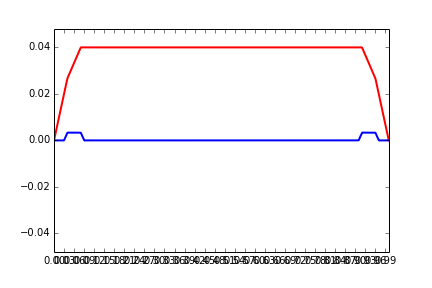
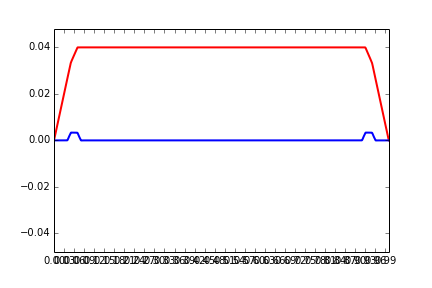
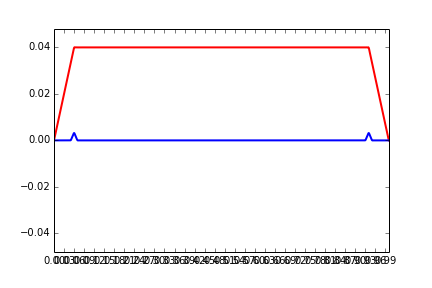
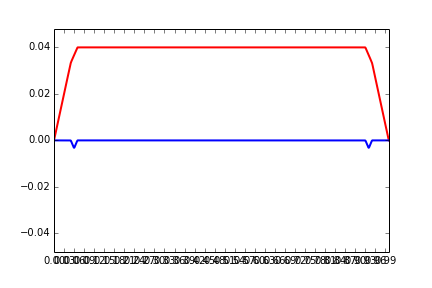
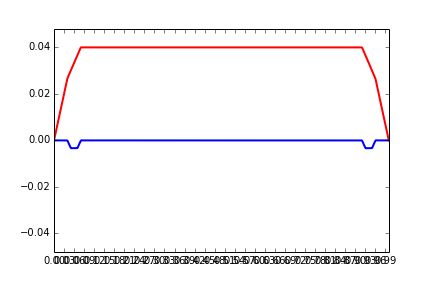
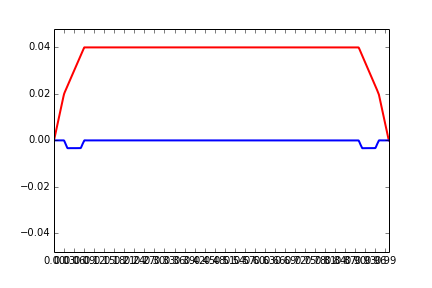
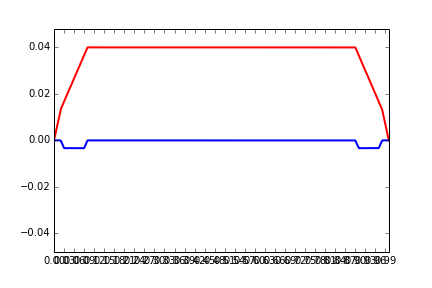
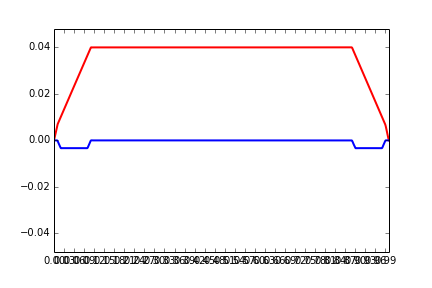
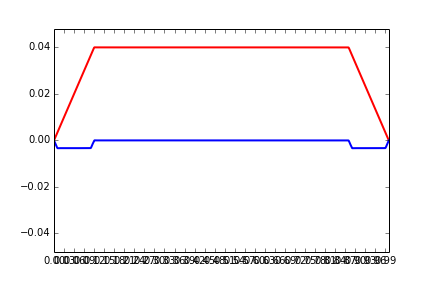
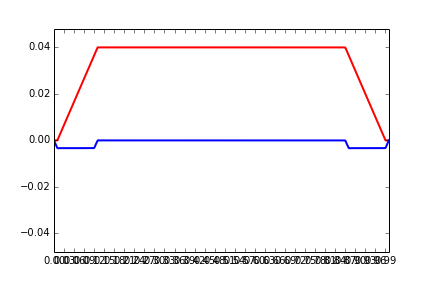
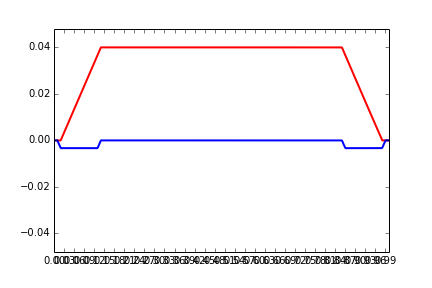
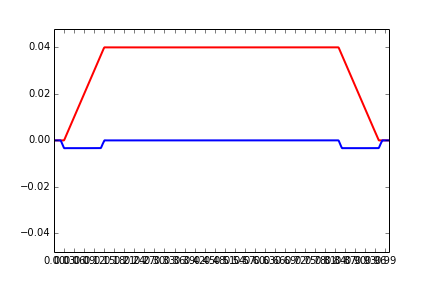
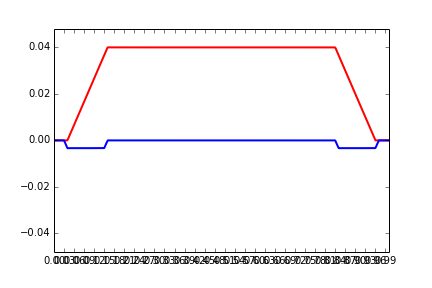
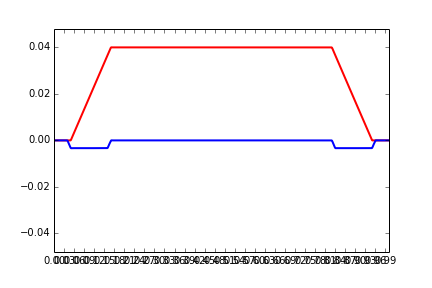
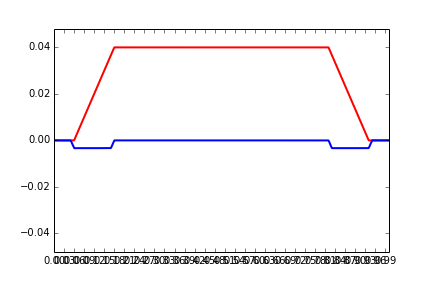
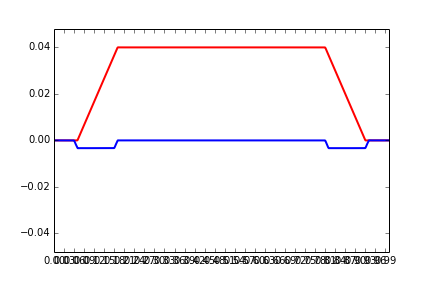
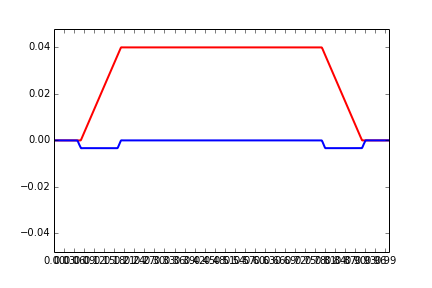
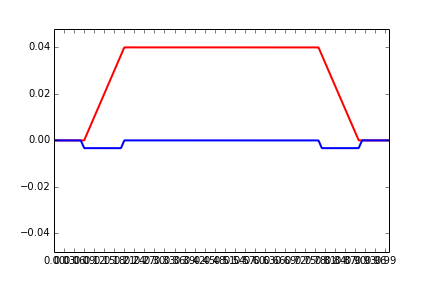
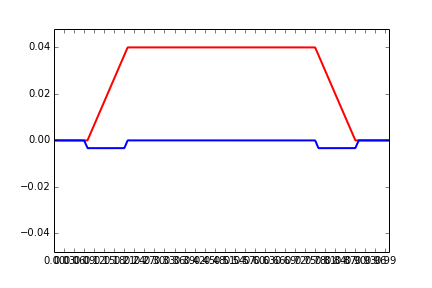
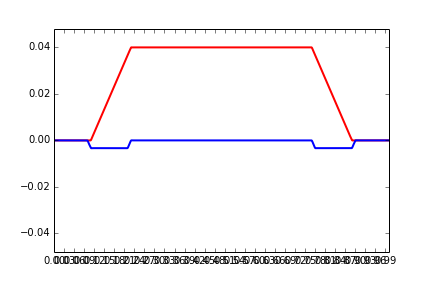
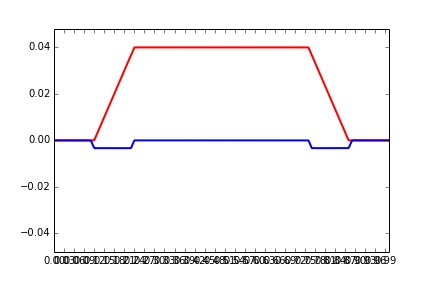
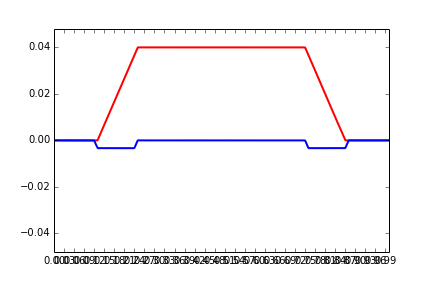
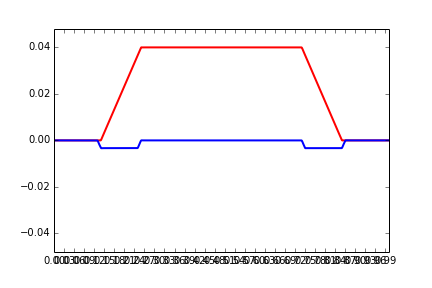
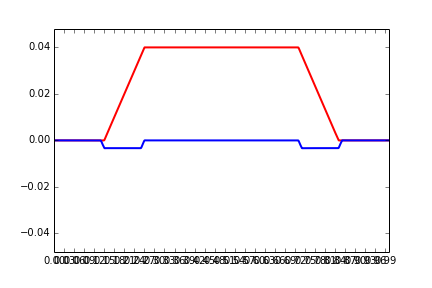
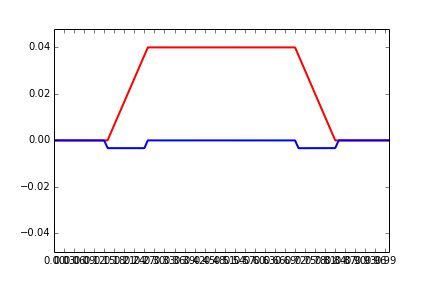
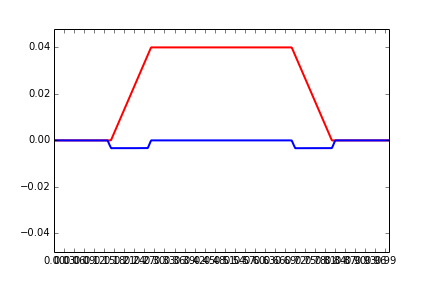
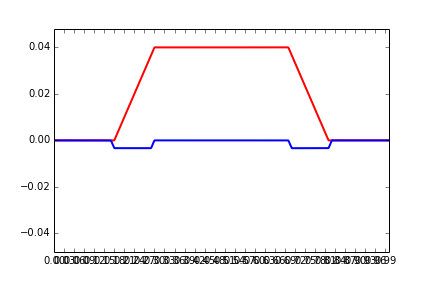
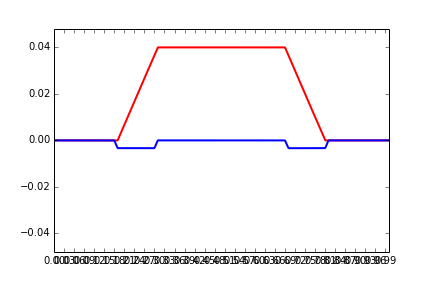
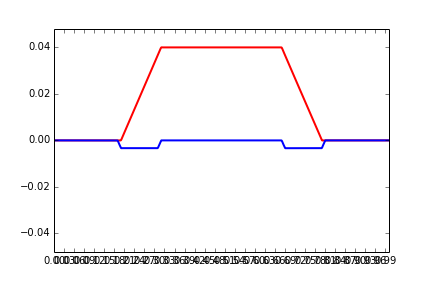
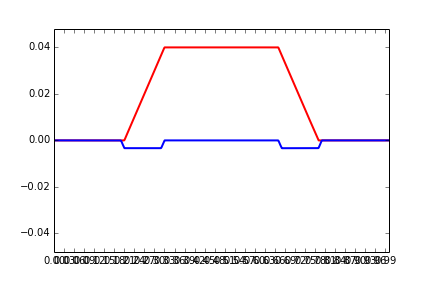
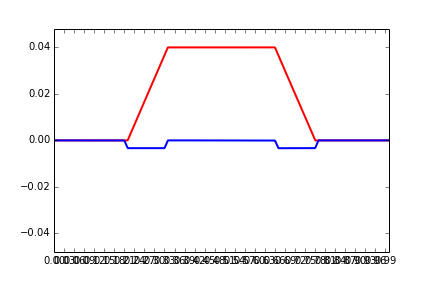
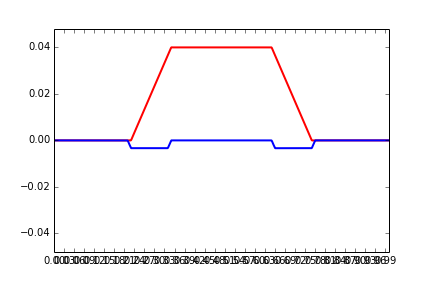
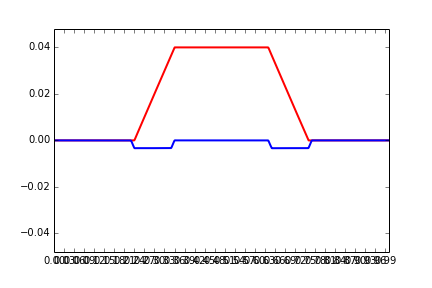
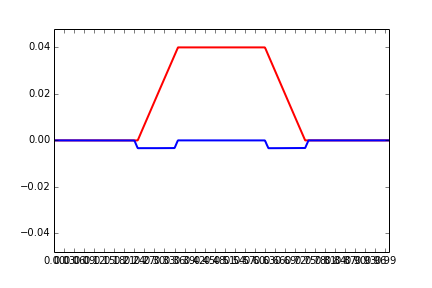
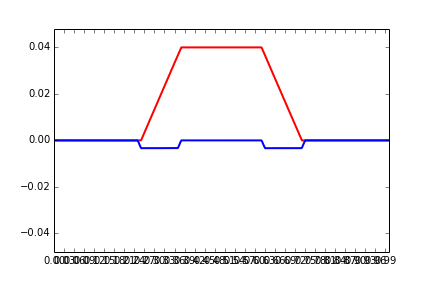
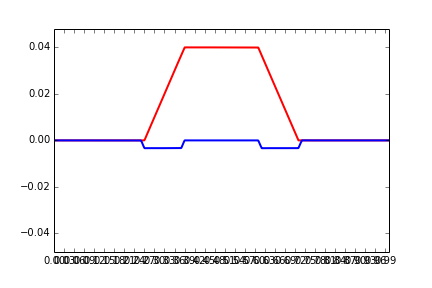
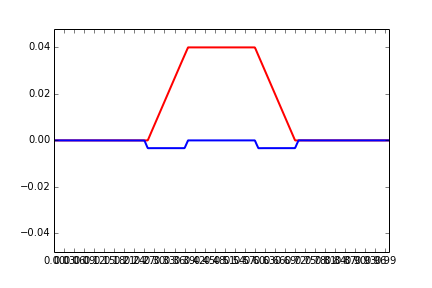
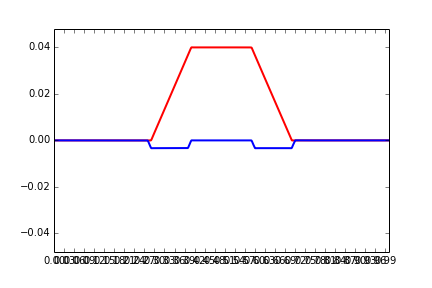
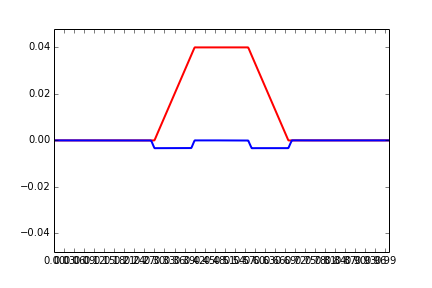
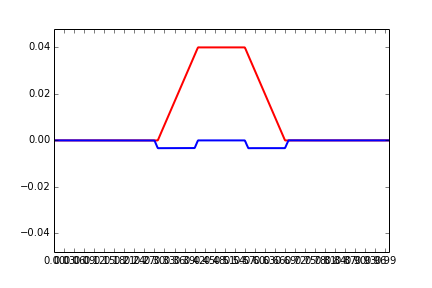
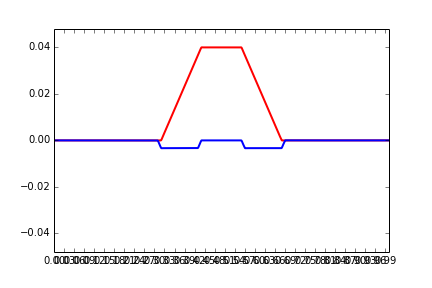
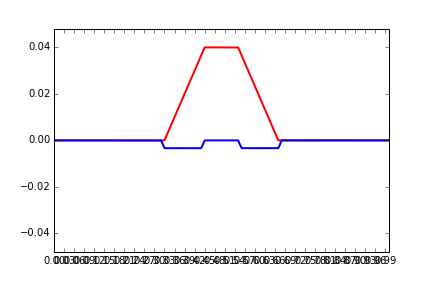
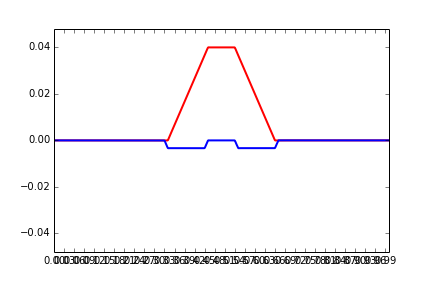
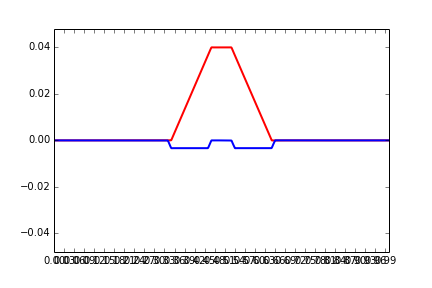
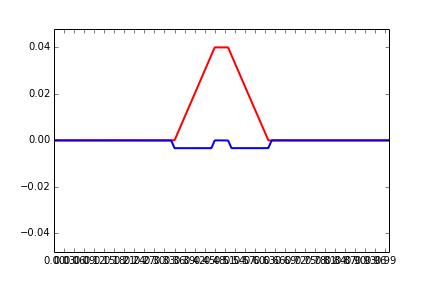
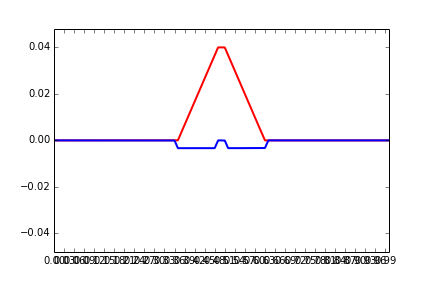
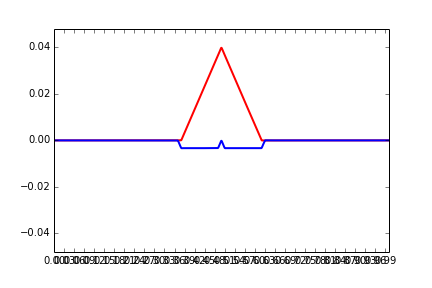
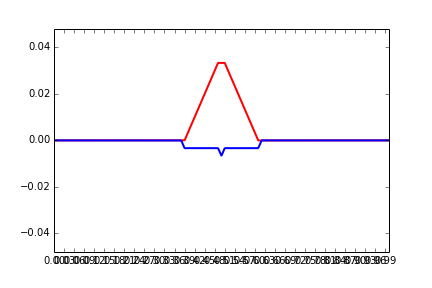
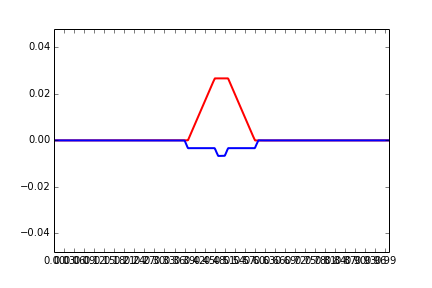
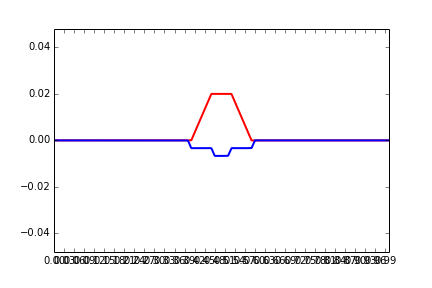
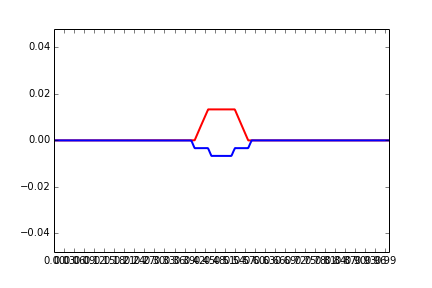
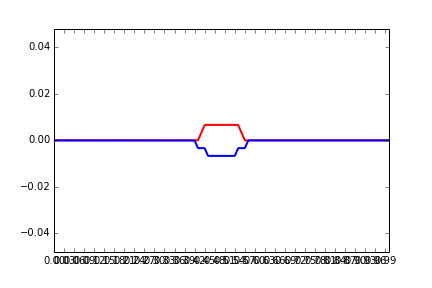
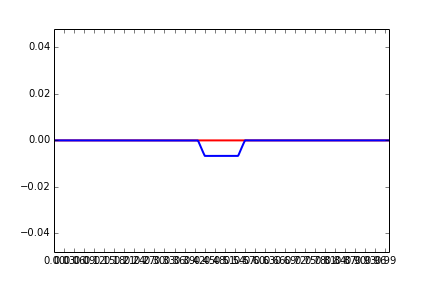
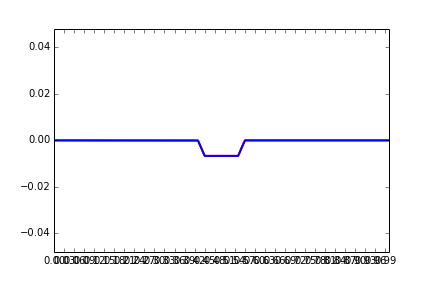
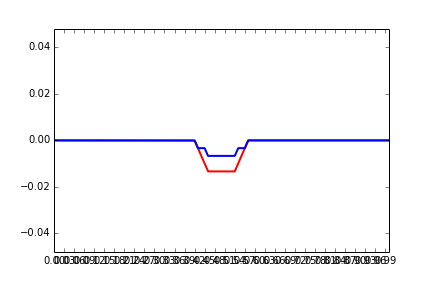
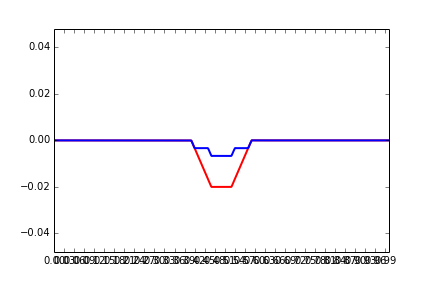
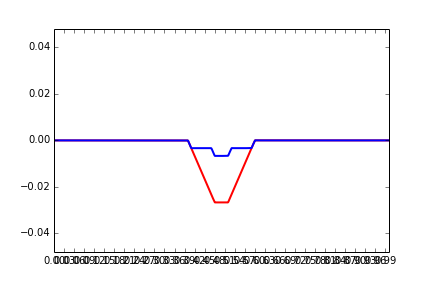
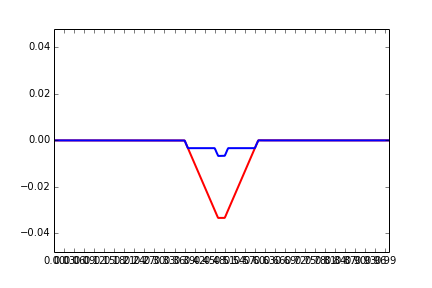
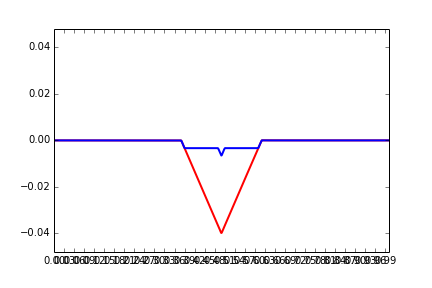
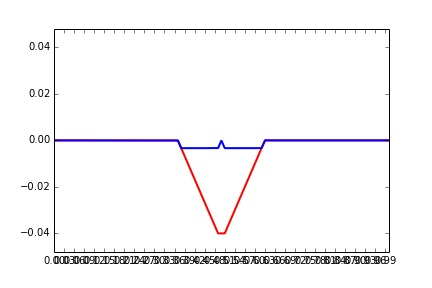
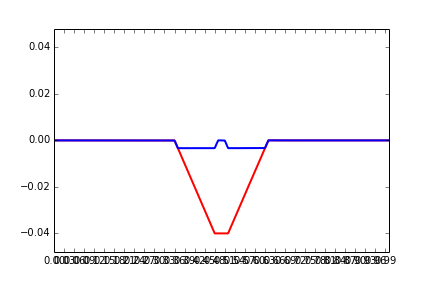
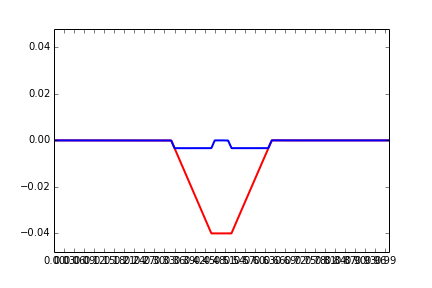
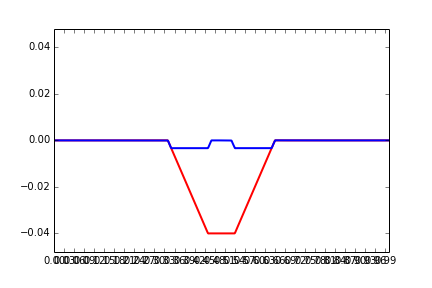
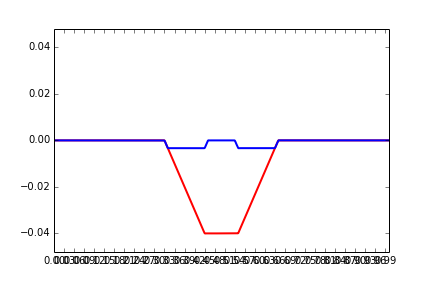
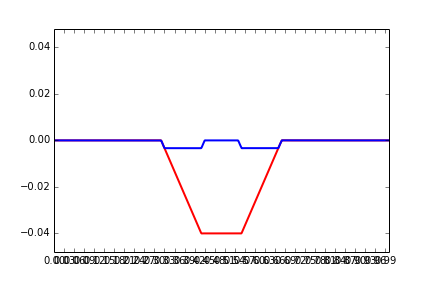
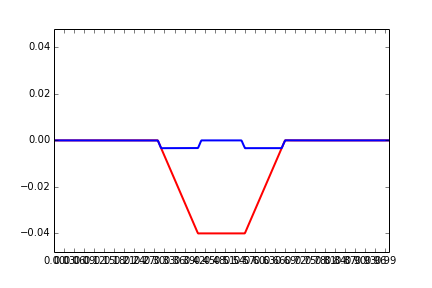
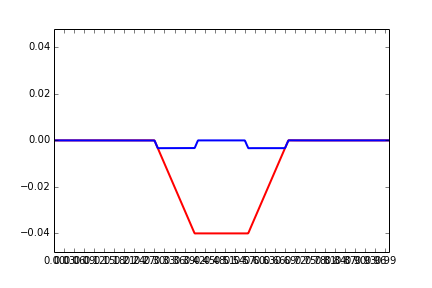
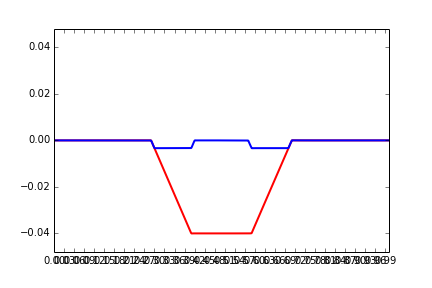
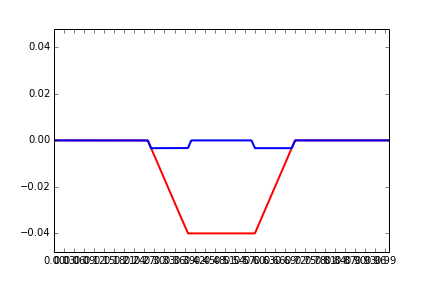
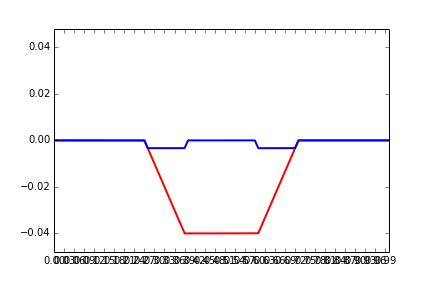
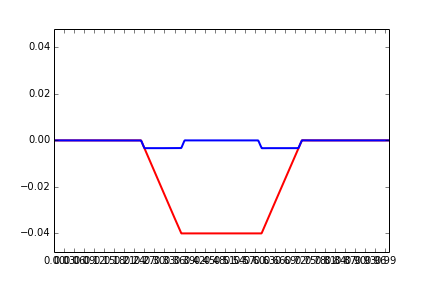
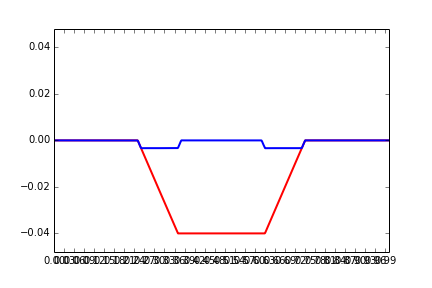
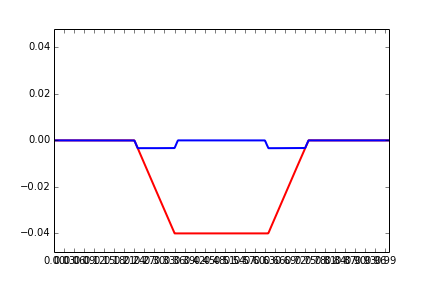
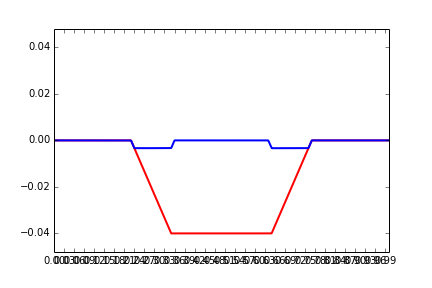
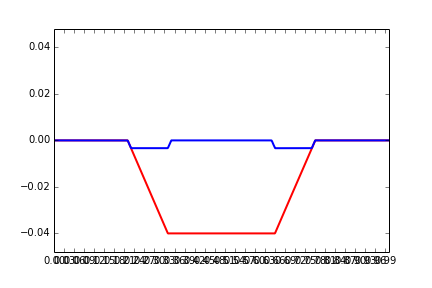
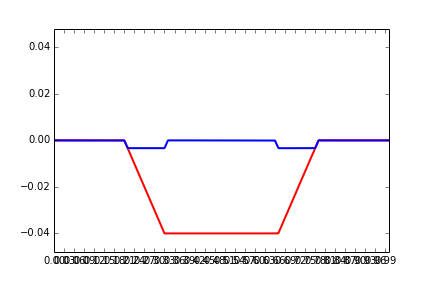
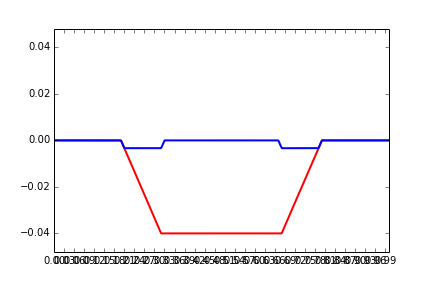
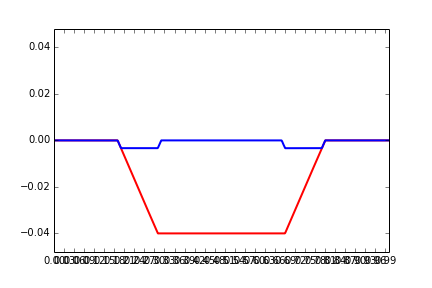
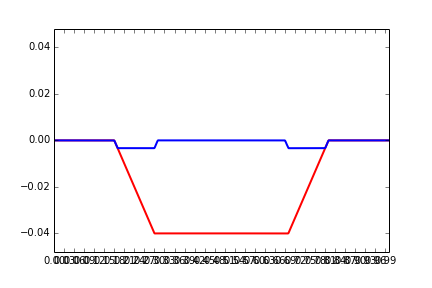
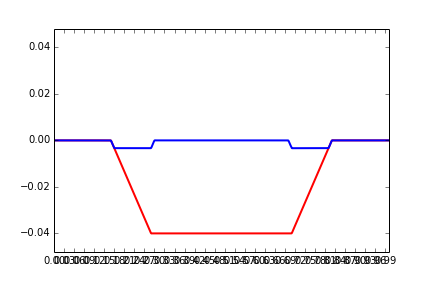
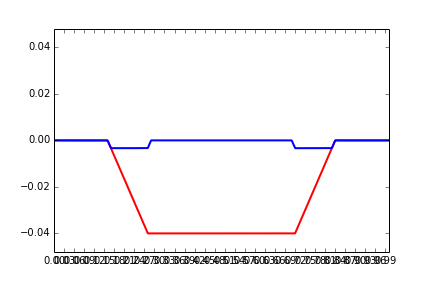
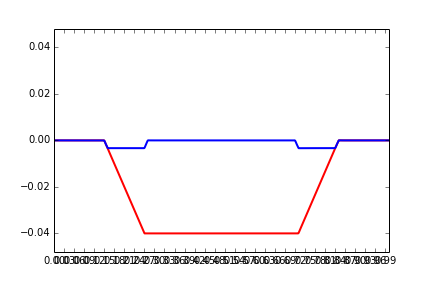
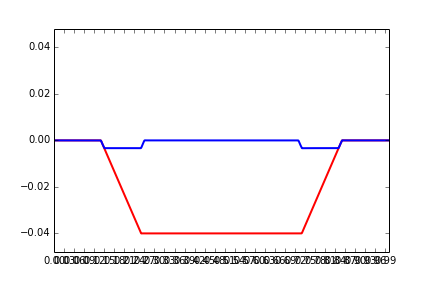
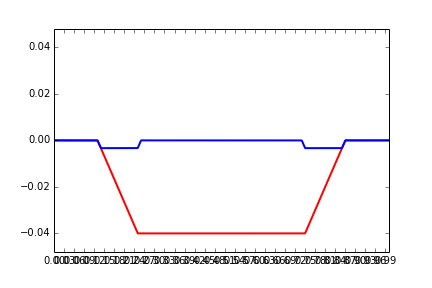
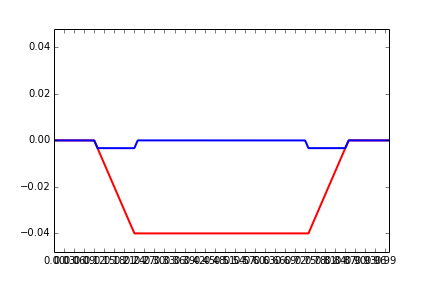
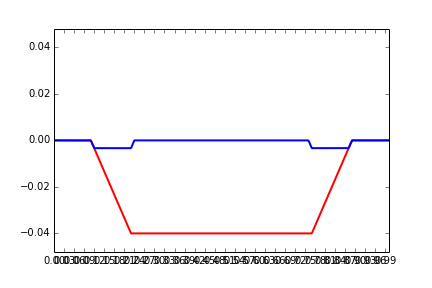
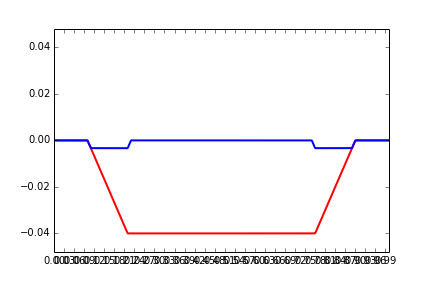
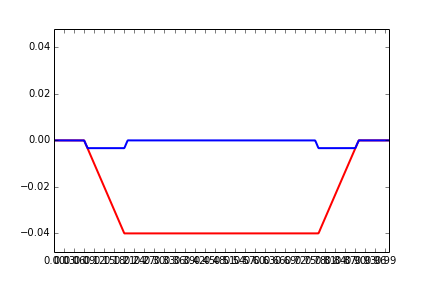
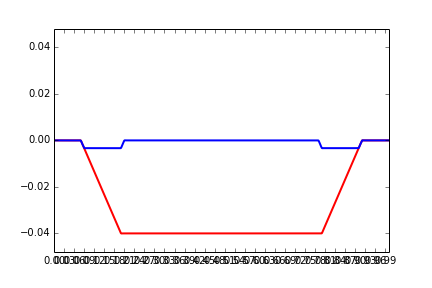
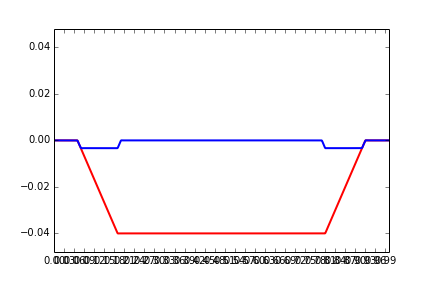
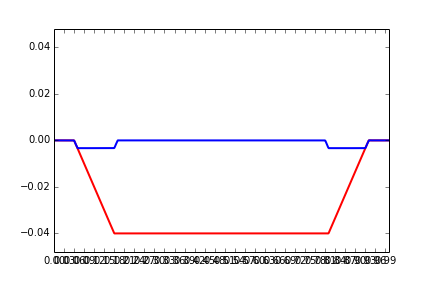
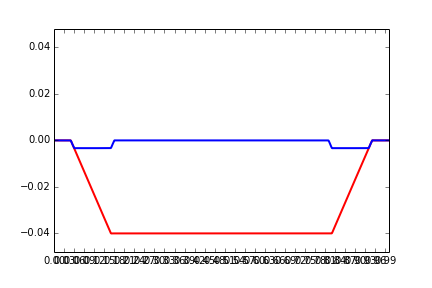
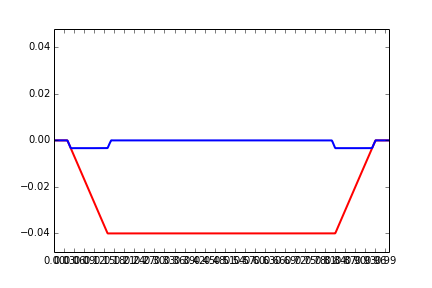
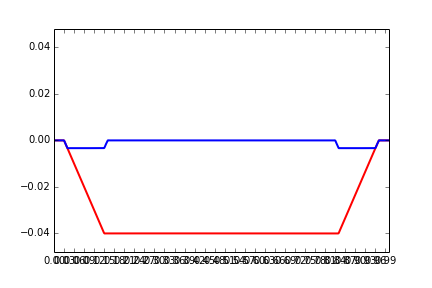
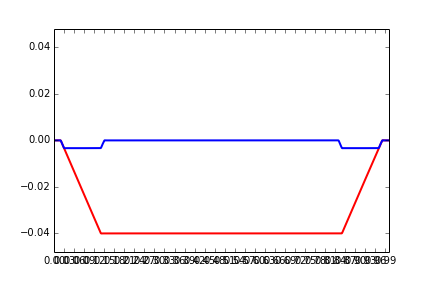
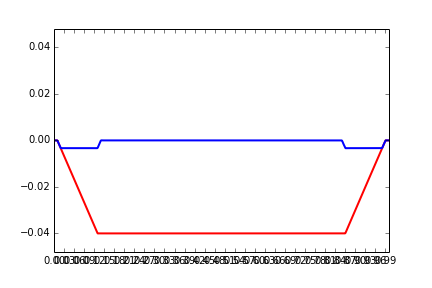
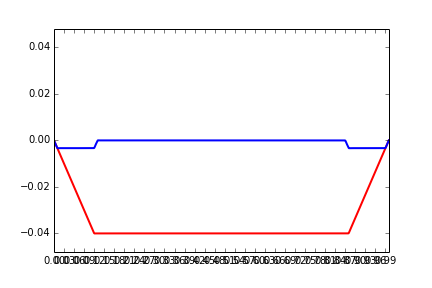
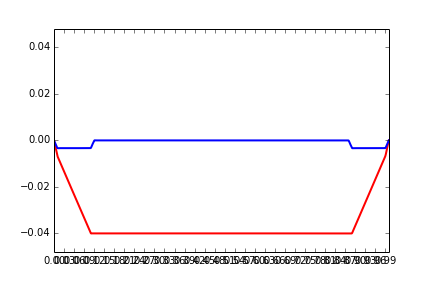
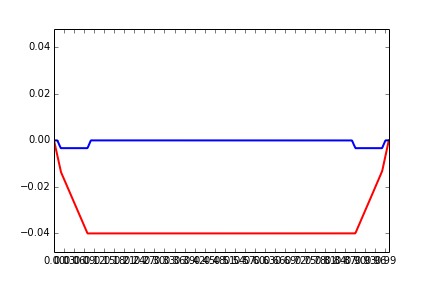
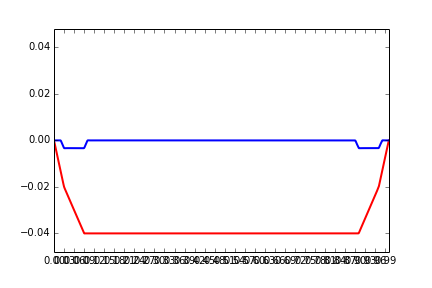
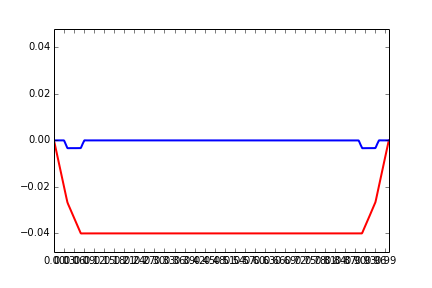
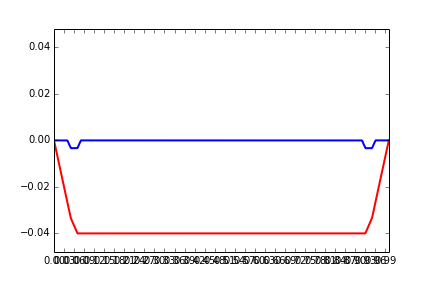
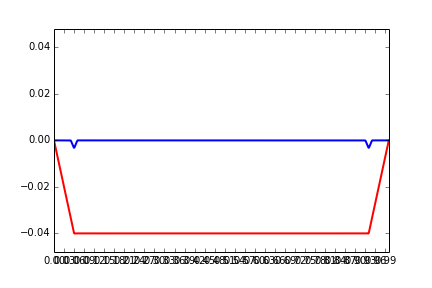
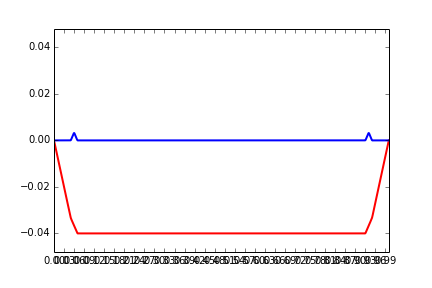
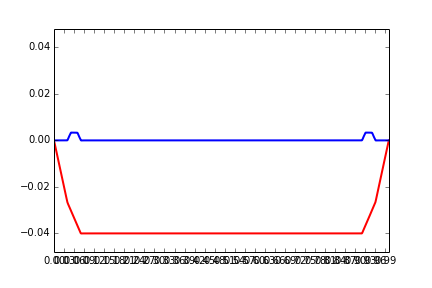
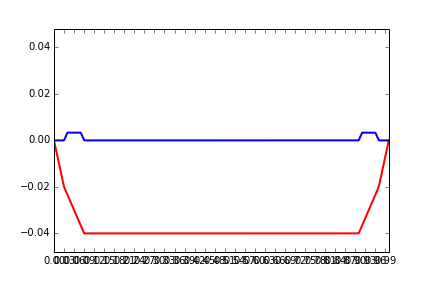
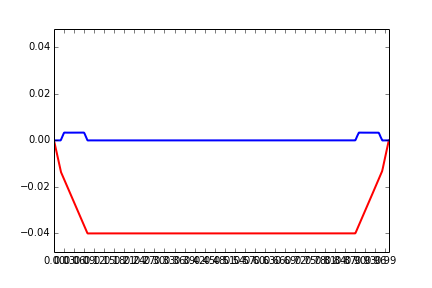
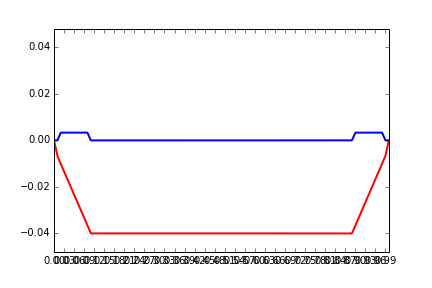
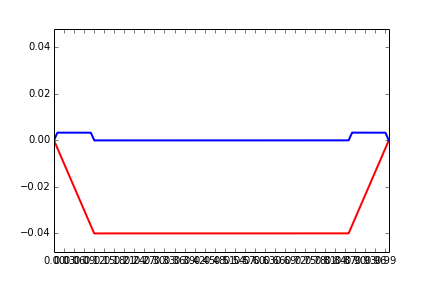
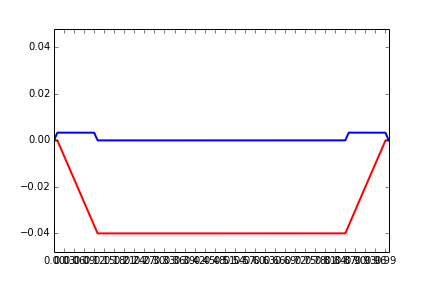
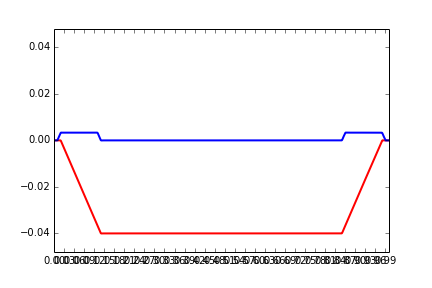
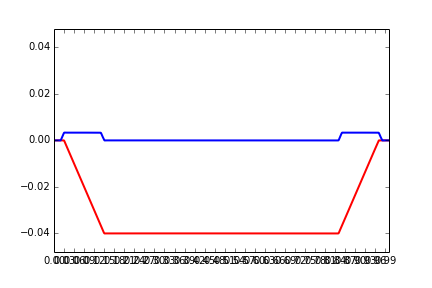
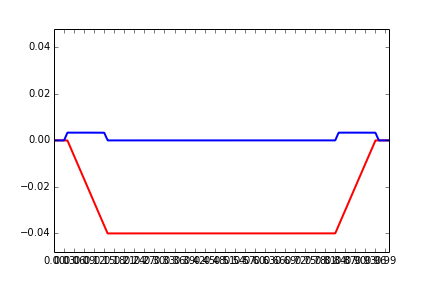
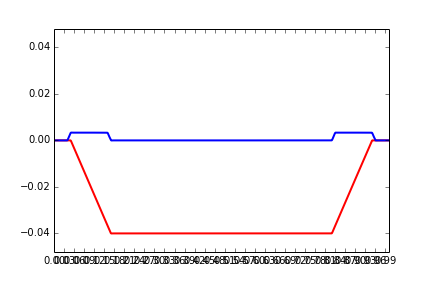
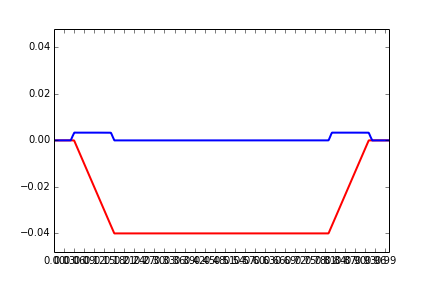
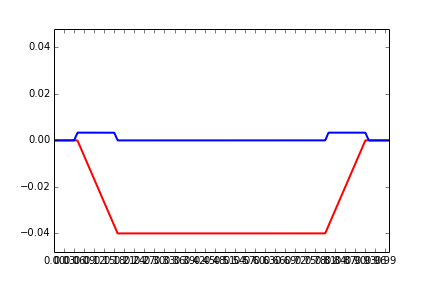
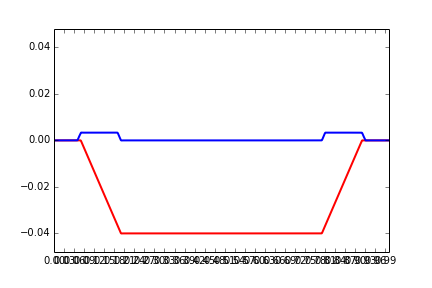
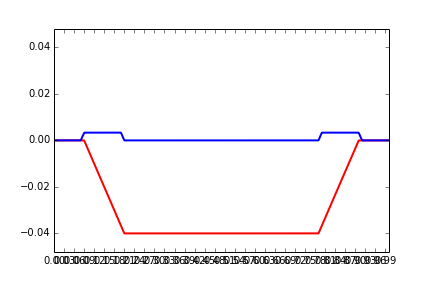
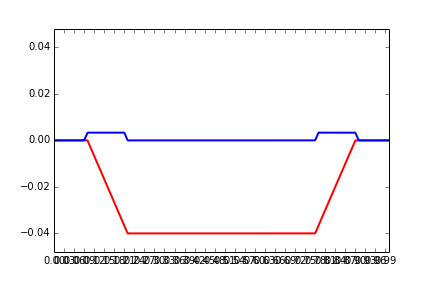
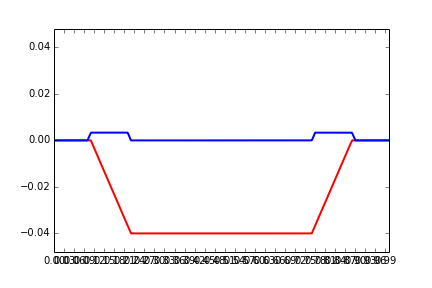
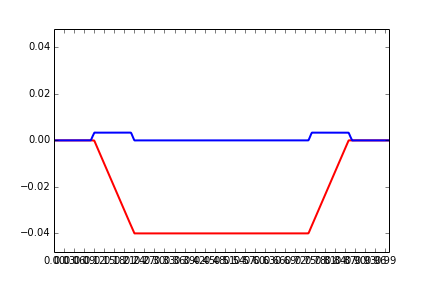
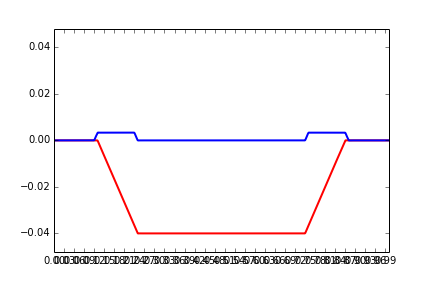
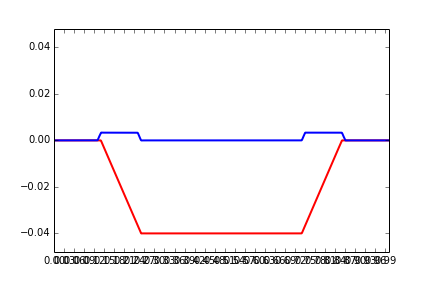
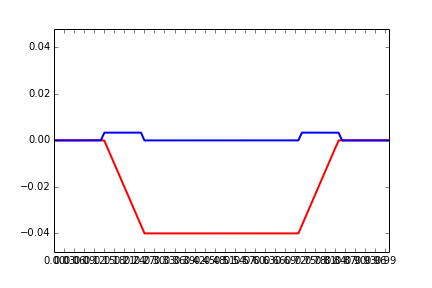
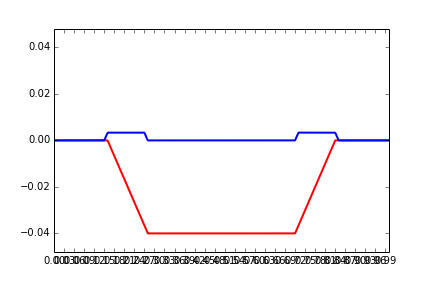
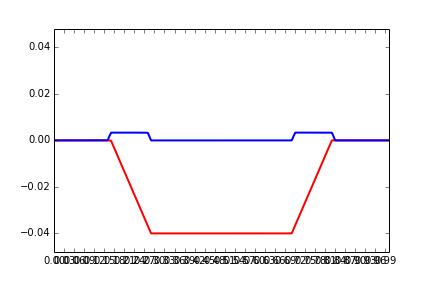
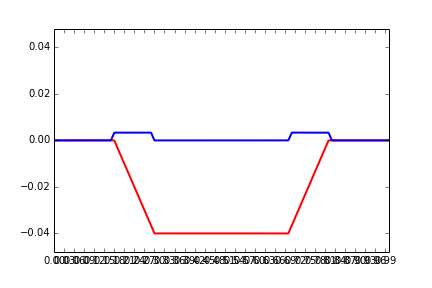
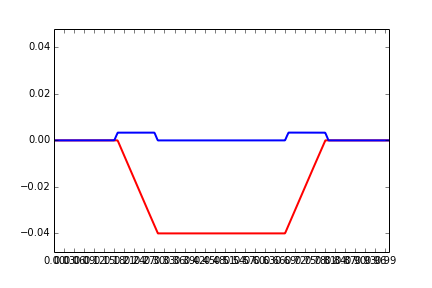
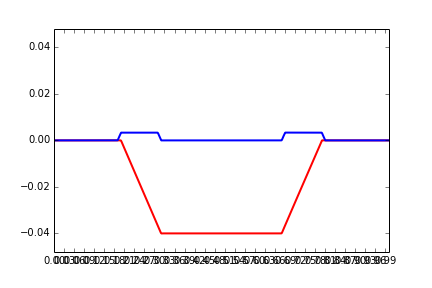
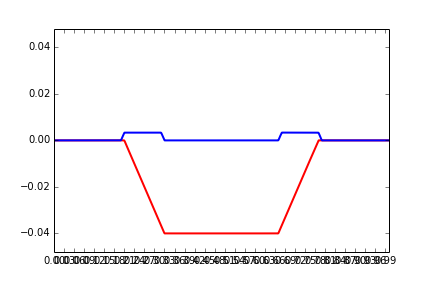
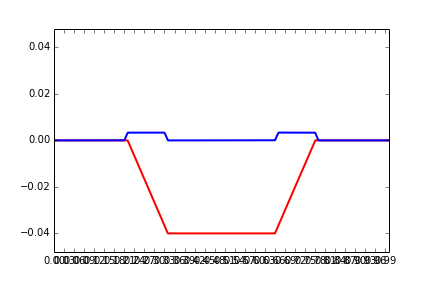
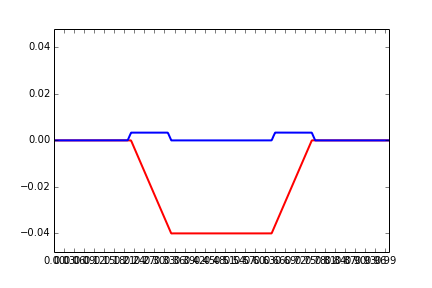
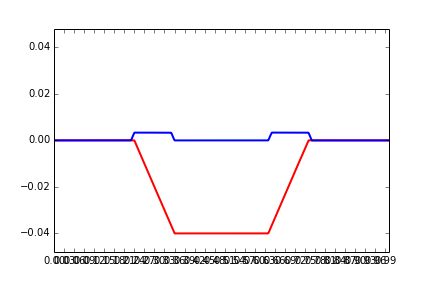
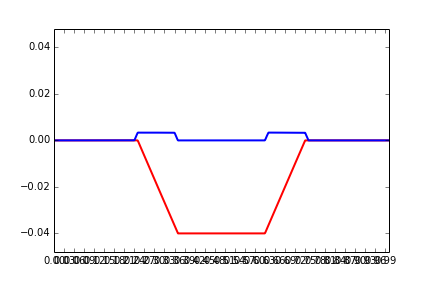
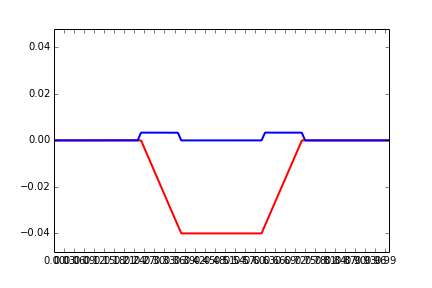
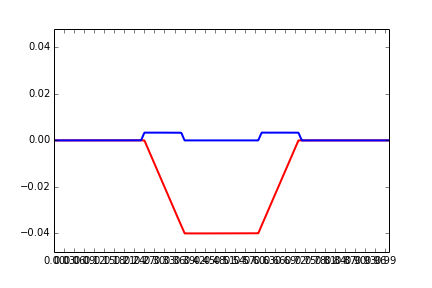
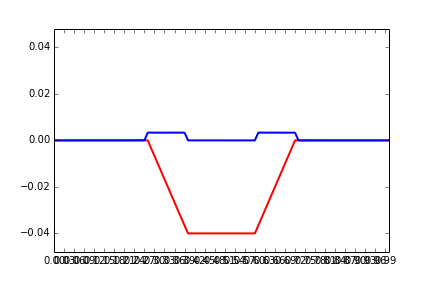
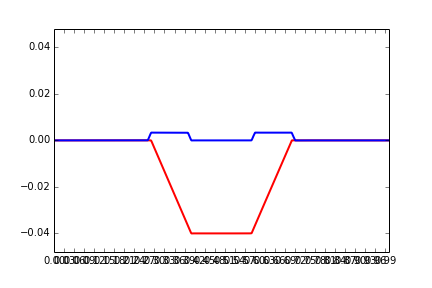
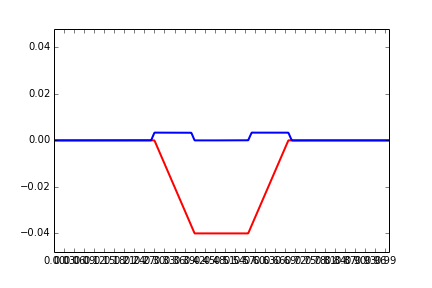
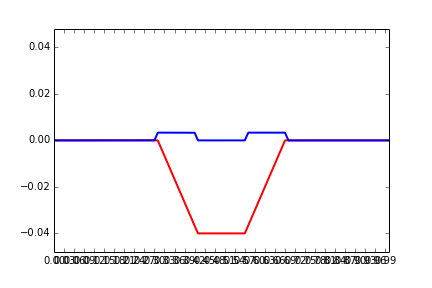
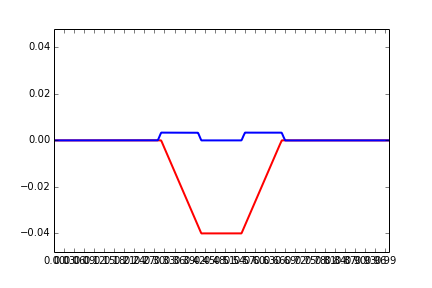
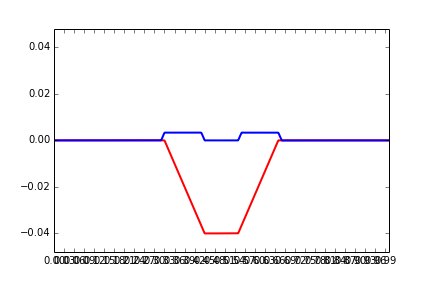
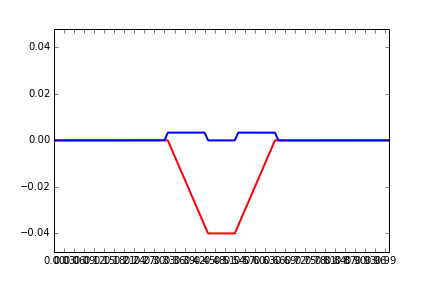
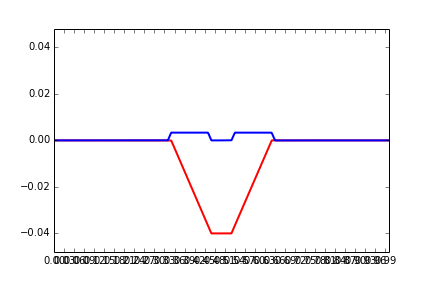
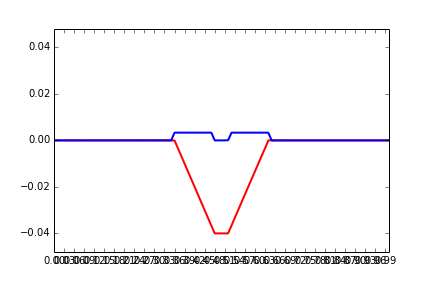
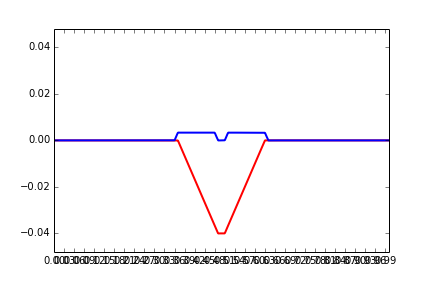
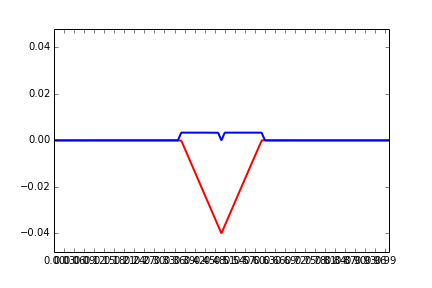
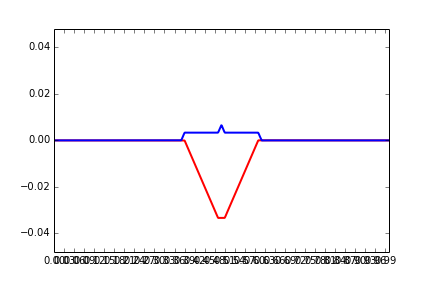
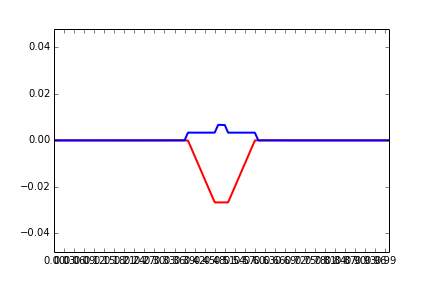
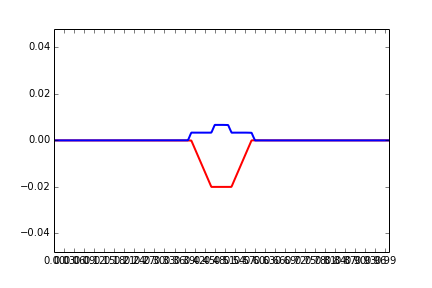
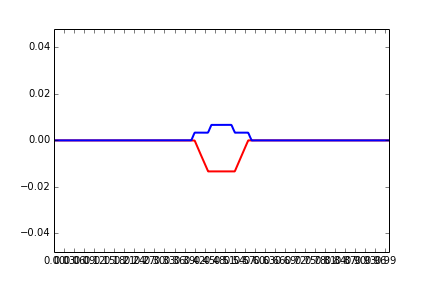
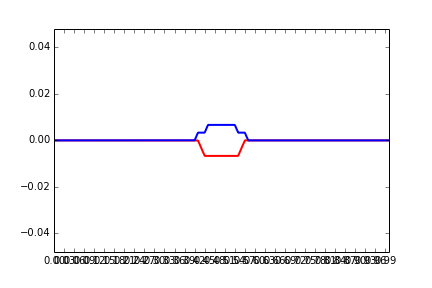

In [27]:
N=400
l, h, w = 1.0, 0.04, 0.06
v = 0.01
fig = plt.figure()
ax = plt.axes(xlim=(0, l), ylim=(-1.2*h, 1.2*h))
plt.xticks(arange(0,l,w/2))
yline, = ax.plot([], [], lw=2, color='red')
vline, = ax.plot([], [], lw=2, color='blue')

y_prev = zeros_like(x)

# initialization function: plot the background of each frame
def init():
    yline.set_data([], [])
    vline.set_data([], [])
    return yline,vline

def animate(t):
    global y_prev
    y = zeros_like(x)
    for n in range(1,N+1,2): # range starts at zero
        pre = (-1)**((n-1)/2)
        y = y +  pre * (1/n**2) * (sin(n*pi*w/l)*sin(n*pi*x/l)*sin(n*pi*v*t/l))


    #y = ( (4*h*l)/(pi*pi*v) ) * y
    y = ( (4*h*l)/(pi*pi*w) ) * y

    vline.set_data(x,y-y_prev)
    y_prev = y
    yline.set_data(x, y)
    return yline,vline
animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

Class discussion: does that make physical sense?